# Hierarchical clustering

This jupyter notebook has been made with a goal of practicing hierarchical clustering

We'll take 3 different datasets, and for each one, we'll do:
* Hierarchical clustering using different methods of clustering (Ward method, Single linkage clustering, and more) and metrics (Euclidean, Cityblock, and more)
* Interpretation of clustering results

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('dark_background')

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from scipy.spatial.distance import pdist, squareform

## Functions

In [2]:
def draw_hists(j):
  fig, axs=plt.subplots(2,2, figsize=(15, 10))
  #axs.set_title(f"Cluster {j}")
  fig.suptitle(f"Cluster {j}", fontsize=16)

  df_for_clust[df_for_clust['cluster']==j]['Age'].hist(ax=axs[0,0])
  axs[0,0].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Age'].mean(), color='r', linestyle='--', label='mean')
  axs[0,0].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Age'].median(), color='y', linestyle='--', label='median')
  axs[0,0].legend()
  axs[0,0].set_title('Age')

  df_for_clust[df_for_clust['cluster']==j]['Annual Income (k$)'].hist(ax=axs[0,1])
  axs[0,1].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Annual Income (k$)'].mean(), color='r', linestyle='--', label='mean')
  axs[0,1].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Annual Income (k$)'].median(), color='y', linestyle='--', label='median')
  axs[0,1].legend()
  axs[0,1].set_title('Annual Income (k$)')

  df_for_clust[df_for_clust['cluster']==j]['Spending Score (1-100)'].hist(ax=axs[1,0])
  axs[1,0].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Spending Score (1-100)'].mean(), color='r', linestyle='--', label='mean')
  axs[1,0].axvline(x=df_for_clust[df_for_clust['cluster']==j]['Spending Score (1-100)'].median(), color='y', linestyle='--', label='median')
  axs[1,0].legend()
  axs[1,0].set_title('Spending Score (1-100)')

  df_for_clust[df_for_clust['cluster']==j]['Gender'].hist(ax=axs[1,1], density=True)
  axs[1,1].set_title('Gender')

  fig.suptitle(f"Cluster {j}", fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

def draw_dn_el(l, d):
  fig, axs=plt.subplots(1,2, figsize=(18,8))
  dn=dendrogram(l, ax=axs[0])
  axs[0].axhline(y=d, color='r', linestyle='--')
  axs[0].set_title('dendrogram')
  axs[1].plot(range(1, len(l)+1), l[:, 2], marker='o')
  axs[1].set_title('elbow plot')
  axs[1].axhline(y=d, color='r', linestyle='--')
  plt.show()

def lkg(X, m1, m2):
  l=[]
  for j in range(len(X)):
    l.append(linkage(X[j], method=m1, metric=m2))
  return l

def lkg_w_c(X):
  l=[]
  for j in range(len(X)):
    l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))
  return l



## DF_1

In [3]:
! gdown 1aV06j-sFH9ZI8h_-FM9uUVOBQcAApB3l

Downloading...
From: https://drive.google.com/uc?id=1aV06j-sFH9ZI8h_-FM9uUVOBQcAApB3l
To: /content/Mall_Customers (1).csv
100% 3.98k/3.98k [00:00<00:00, 16.8MB/s]


In [4]:
df=pd.read_csv('/content/Mall_Customers (1).csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
df_for_clust=df.drop('CustomerID', axis=1)
df_for_clust['Gender']=df_for_clust['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
df_for_clust.describe(include='all')

Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000

As we can see our data needs to be normalized. With ```gender``` we have no choice, it's only 0 and 1 values, but with other columns we have a variety of choices. Let's try first normalize every column left on its standard deviation  

In [7]:
df_for_clust[['Age_n', 'Annual_Income_n', 'Spending_Score_n']]=df_for_clust[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].apply(lambda x: x/x.std())
df_for_clust.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)     Age_n  \
0       1   19                  15                      39  1.360154   
1       1   21                  15                      81  1.503328   
2       0   20                  16                       6  1.431741   
3       0   23                  16                      77  1.646502   
4       0   31                  17                      40  2.219198   

   Annual_Income_n  Spending_Score_n  
0         0.571108          1.510251  
1         0.571108          3.136675  
2         0.609182          0.232346  
3         0.609182          2.981778  
4         0.647256          1.548975

### W_E clustering + interpretation

In [8]:
link=linkage(df_for_clust[['Gender','Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='ward', metric='euclidean')

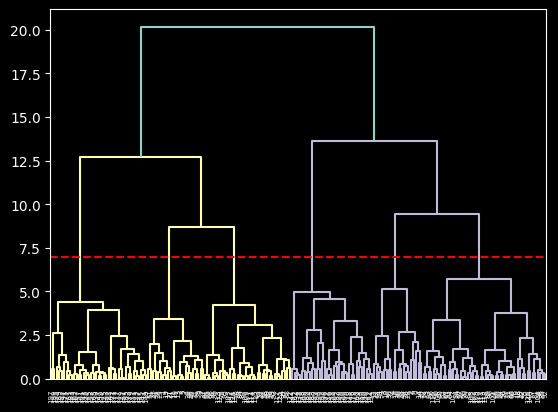

In [9]:
fig, ax=plt.subplots()
dn=dendrogram(link, ax=ax)
ax.axhline(y=7, color='r', linestyle='--')
plt.show()

It looks like 7 is a good distance to divide the clusters. Let's see it on the Elbow plot

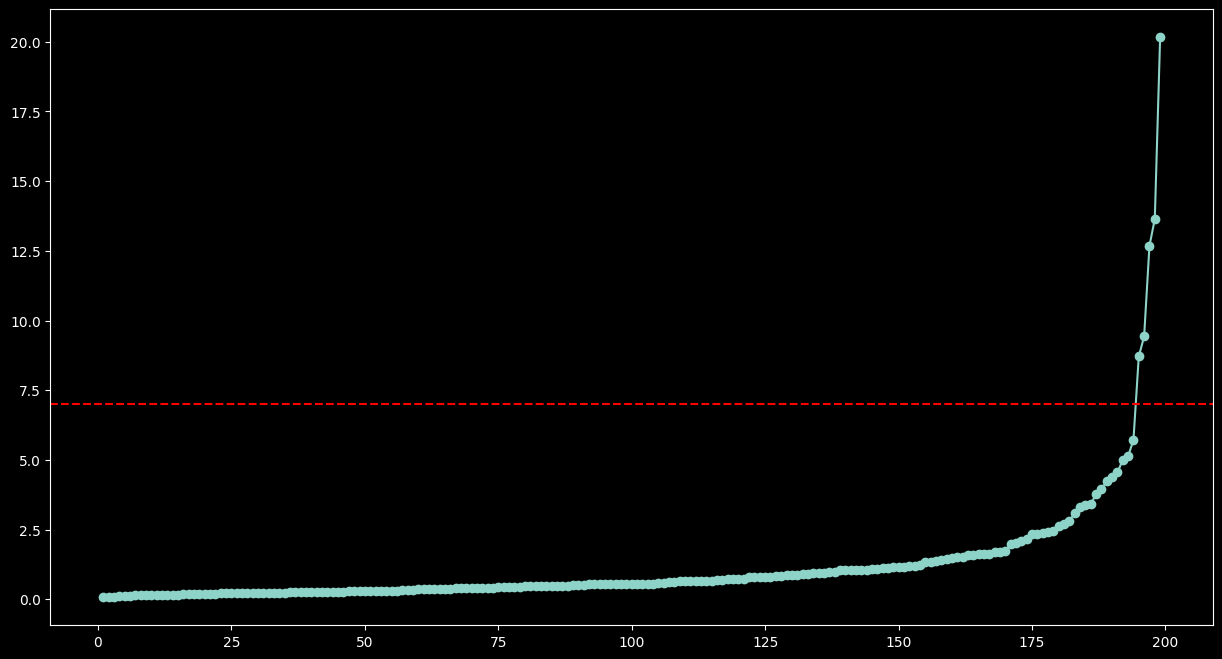

In [ ]:
fog, ax=plt.subplots(figsize=(15, 8))
ax.plot(range(1, len(link[:, 2])+1), link[:, 2], marker='o')
ax.axhline(y=7, color='r', linestyle='--')

In [11]:
df_for_clust['cluster']=fcluster(link, 7, criterion='distance')

Cool, now when we did clustering it's time to make interpretation of the results. The first step will groupby our clusters and see the mean value and median of each column

In [12]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        0.461538  32.692308           86.538462               82.128205   
2        0.434783  25.608696           26.434783               78.521739   
3        0.285714  26.142857           57.228571               48.685714   
4        0.545455  41.454545           89.090909               16.181818   
5        0.350000  43.750000           25.250000               19.050000   
6        0.500000  54.960000           53.620000               48.240000   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        2.340346         3.294856          3.180364  
2        1.833251         1.006475          3.040706  
3        1.871490         2.178914          1.885324  
4        2.967609         3.392037          0.626631  
5        3.131933         0.961366          0.737700  
6        3.934424         2.041522          1.868064

In [ ]:
df_for_clust.groupby('cluster').median()

Gender   Age  Annual Income (k$)  Spending Score (1-100)     Age_n  \
cluster                                                                       
1           0.0  32.0                79.0                    83.0  2.290786   
2           0.0  24.0                25.0                    77.0  1.718089   
3           0.0  26.0                60.0                    50.0  1.861263   
4           1.0  42.0                86.0                    15.0  3.006656   
5           0.0  43.5                24.5                    14.5  3.114037   
6           0.5  51.5                54.0                    48.0  3.686733   

         Annual_Income_n  Spending_Score_n  
cluster                                     
1               3.007837          3.214124  
2               0.951847          2.981778  
3               2.284433          1.936219  
4               3.274354          0.580866  
5               0.932810          0.561504  
6               2.055990          1.858770

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    39
2    23
3    35
4    33
5    20
6    50
dtype: int64

Let's make our first impression of clusters.
* First: the second richest group here,  and it spends the most. Average age is 32, so we can assume that it is just a good middle class. They likely have kids(or at least one), probably pay a mortgage and travel a lot or other reasons of big spending score. But also they have enough money for that. This cluster is the second-largest. So it must be the group we wanna sell our product the most. This cluster is big enough, can purchase,  and does it often. Because of a big difference between the mean of ```Annual Income (k$)``` and the median, it can mean that we have a deal with outliers, which we will call rich people. But median and mean of ```Spending Score (1-100)``` are close enough, so we can say they spend alike.
* Second: Spending is 3 times bigger than income, young average age, so we deal with students. They spend a lot, the second score here, probably because they spend parents money, not their own. It's the reason we want to sell to this group a lot, advertising can be easier, because they spend money with the lowest level of regret. Size of cluster is not big, but age is close to the age of first cluster, so sometimes we can do an advertising campaign at one time for first and second clusters.
* Third cluster has a similar age to second. But difference is, people from this cluster has bigger income than spending. They can be students or may be not, but the fact is that they have job to be fully or almost independent from their parents. Because they spend their money maybe that the reason they spend less than second cluster. If we wanna sell something to cluster 2 we probably can sell it to cluster 3 as well, but we must remember that product has to be really needed or be not so expensive.
* I have two hypotheses about fourth cluster. First, that it's middle class or rich people that don't like to live a luxurious life. Or they already bought what they wanted (a house, a car, etc.) and now don't need to spend a lot. Second, that it is the middle class fathers/husbands who spend enough but don't purchase a lot by themselves. Instead of that they give most of their sallary to their wifes/partners, which make most of decisions about buying stuff. It's a common thing in patriarchal societies (like in Ukraine, where I am from). The hint that can point to that hypothesis is the biggest share of men in that cluster among all clusters. Anyway, it looks like this group is not good for advertising campaigns because they don't buy a lot.
* Fifth cluster looks like a cluster of lower-middle class or below. They don't have big income and because of that they don't buy much. Average age of 42-44 is confusing, we have to look at the histogram to see why that is so.
* Sixth cluster and that is pensioners. They don't have high or low incomes, with values close to or slightly below those of cluster 3. But they also purchase similary to cluster 3. The difference may be that cluster 6 more likely to spend money on medicine, when cluster 3 on some young stuff like music festivals.  

Ok, it was only first impression, let's look at histograms of every predictor in every cluster

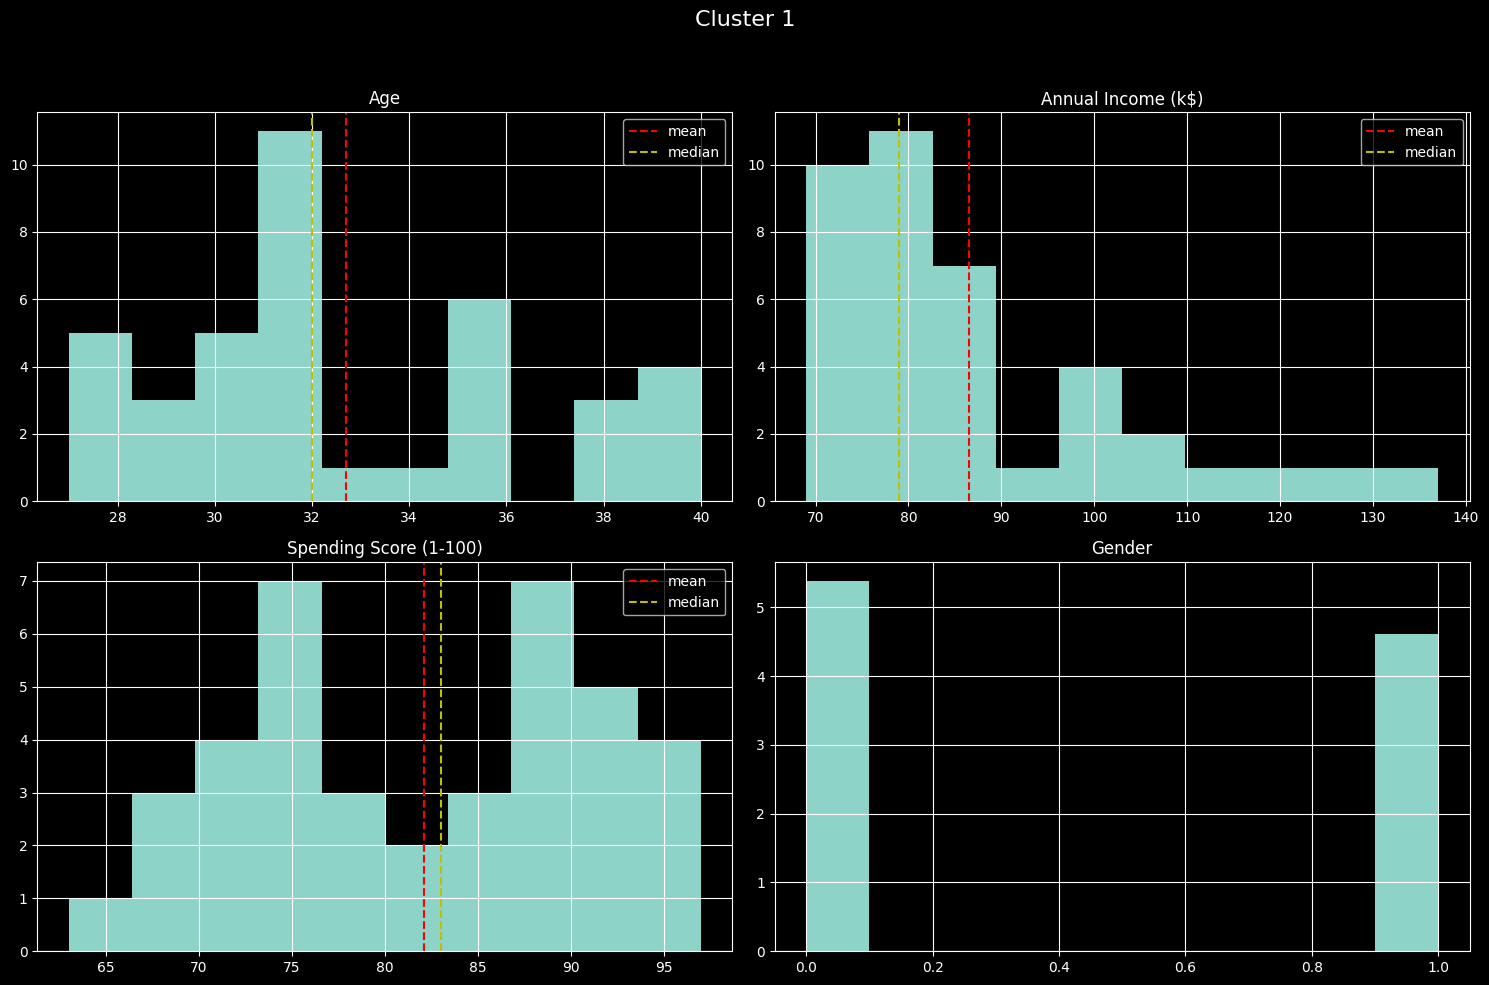

In [13]:
draw_hists(1)

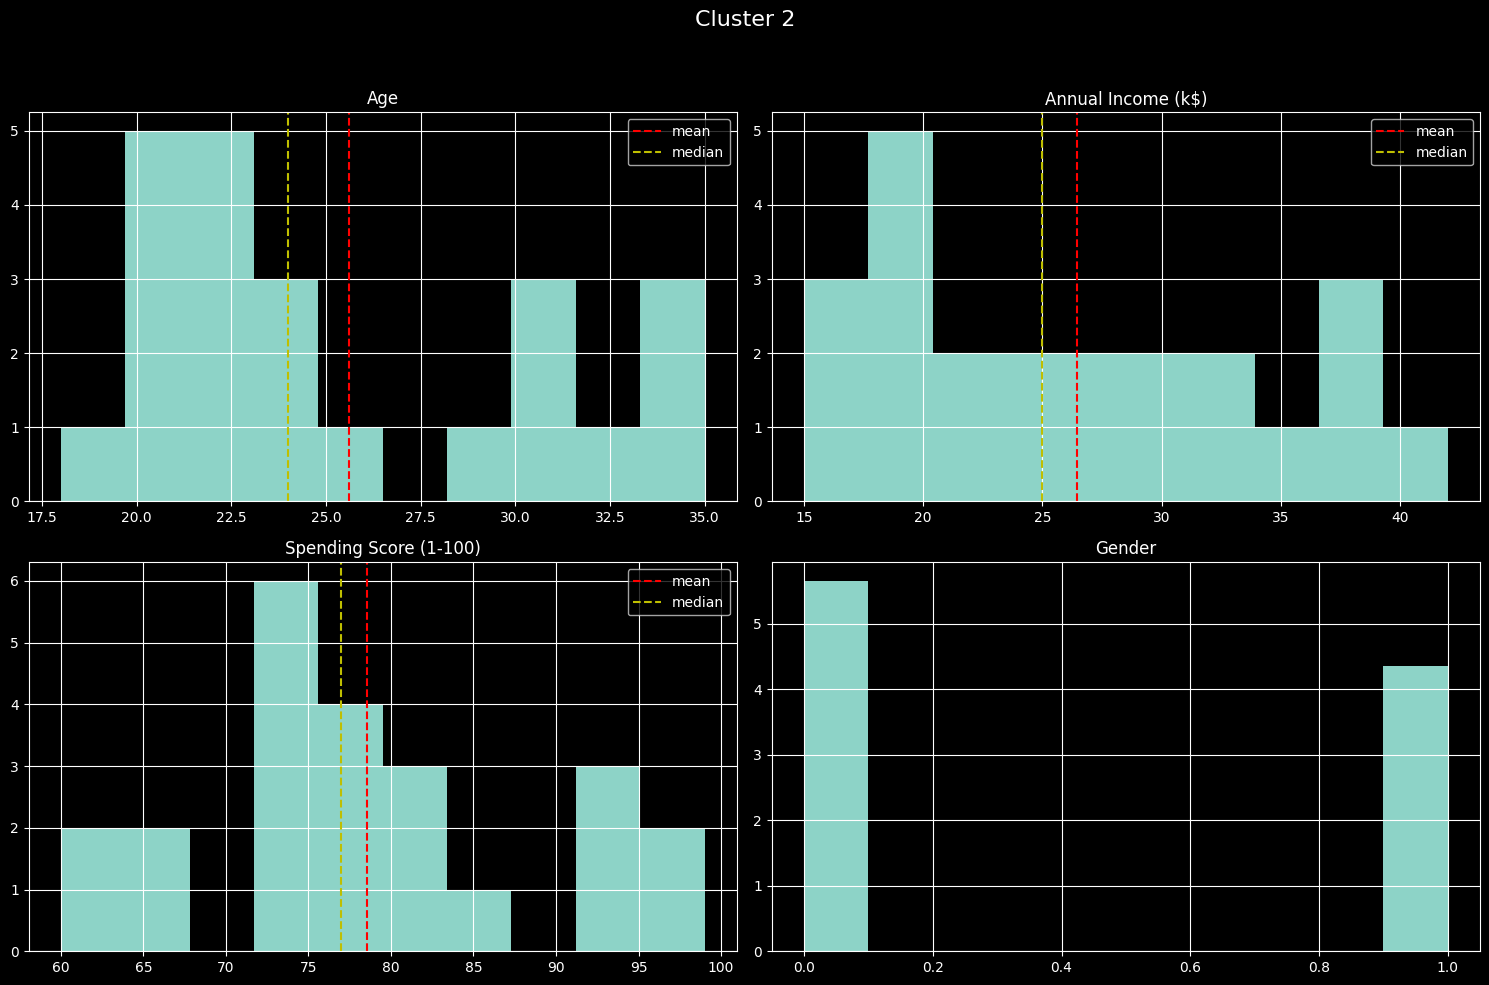

In [14]:
draw_hists(2)

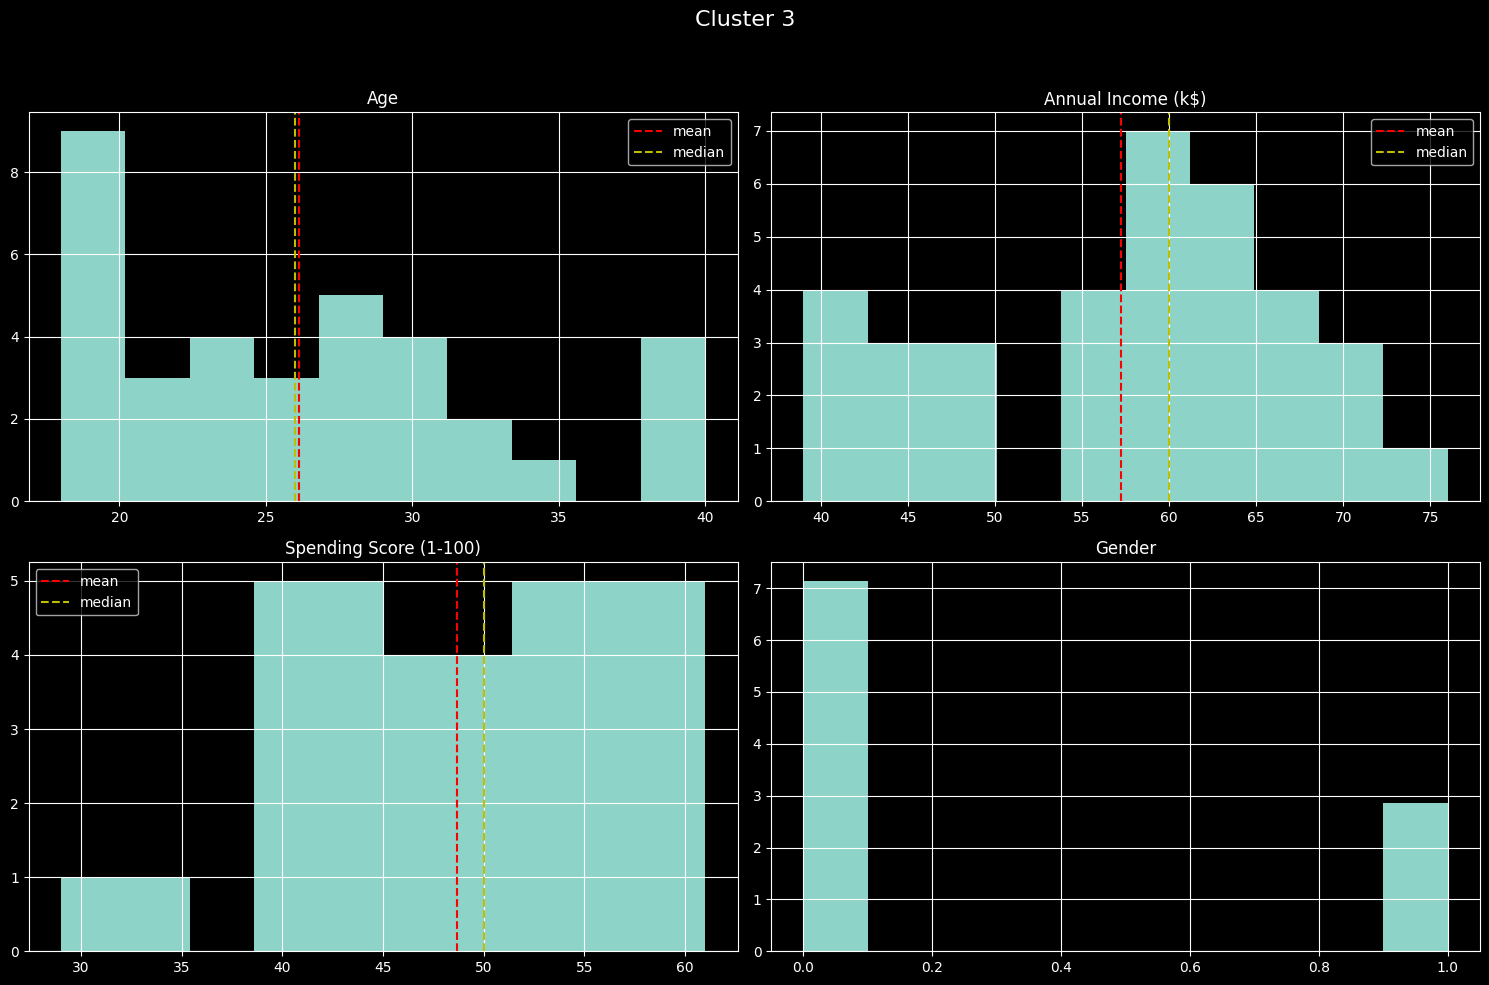

In [15]:
draw_hists(3)

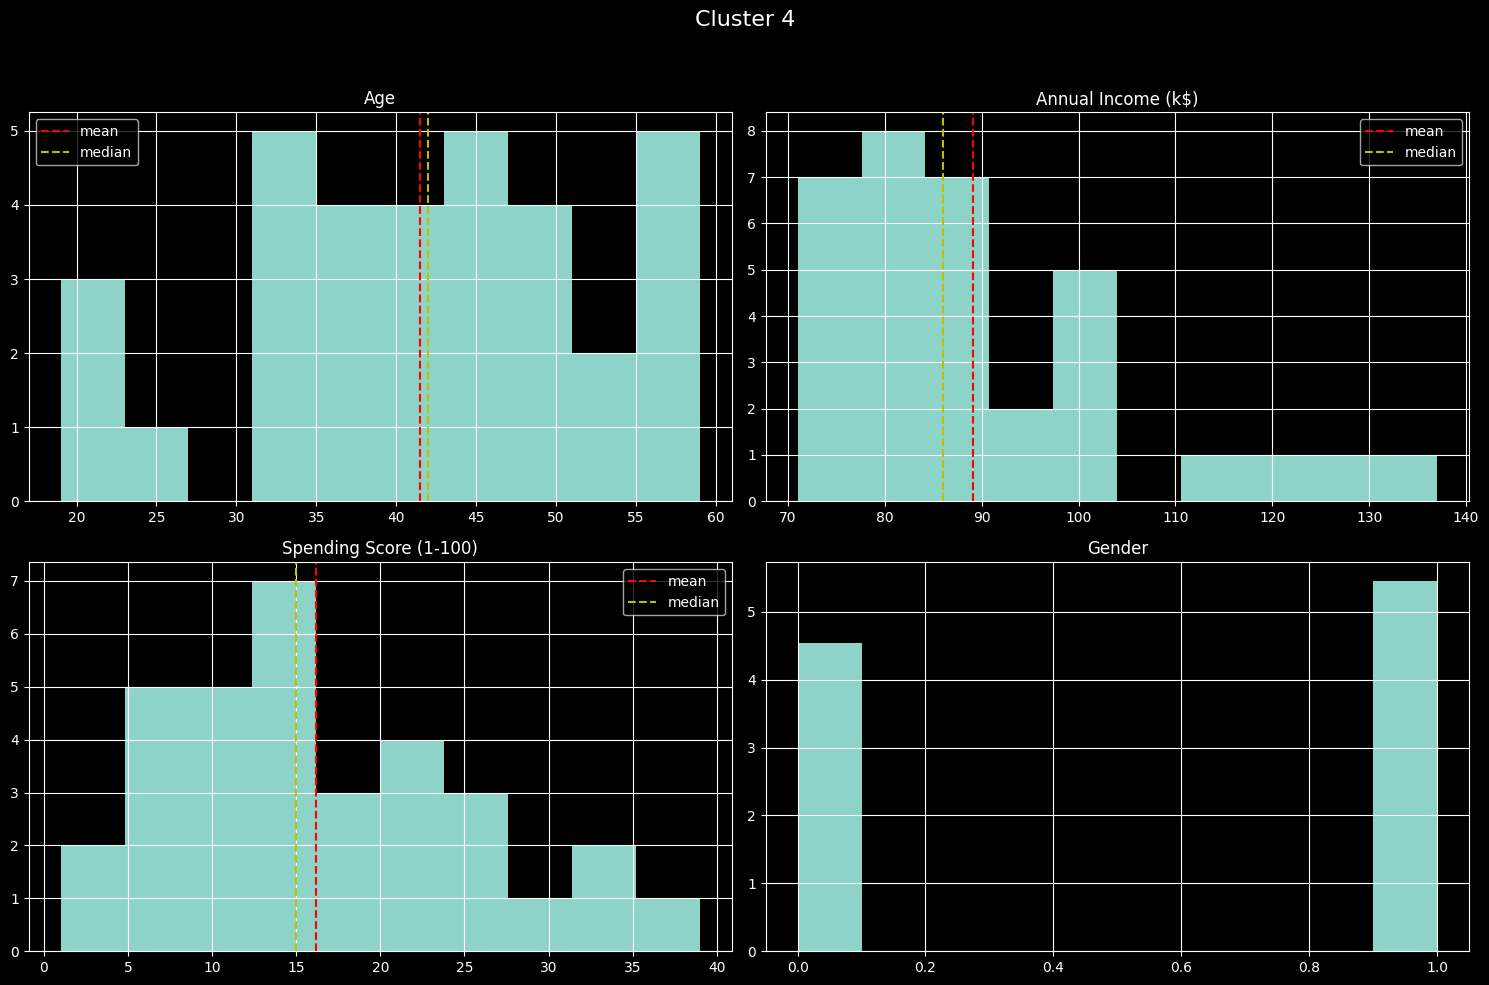

In [16]:
draw_hists(4)

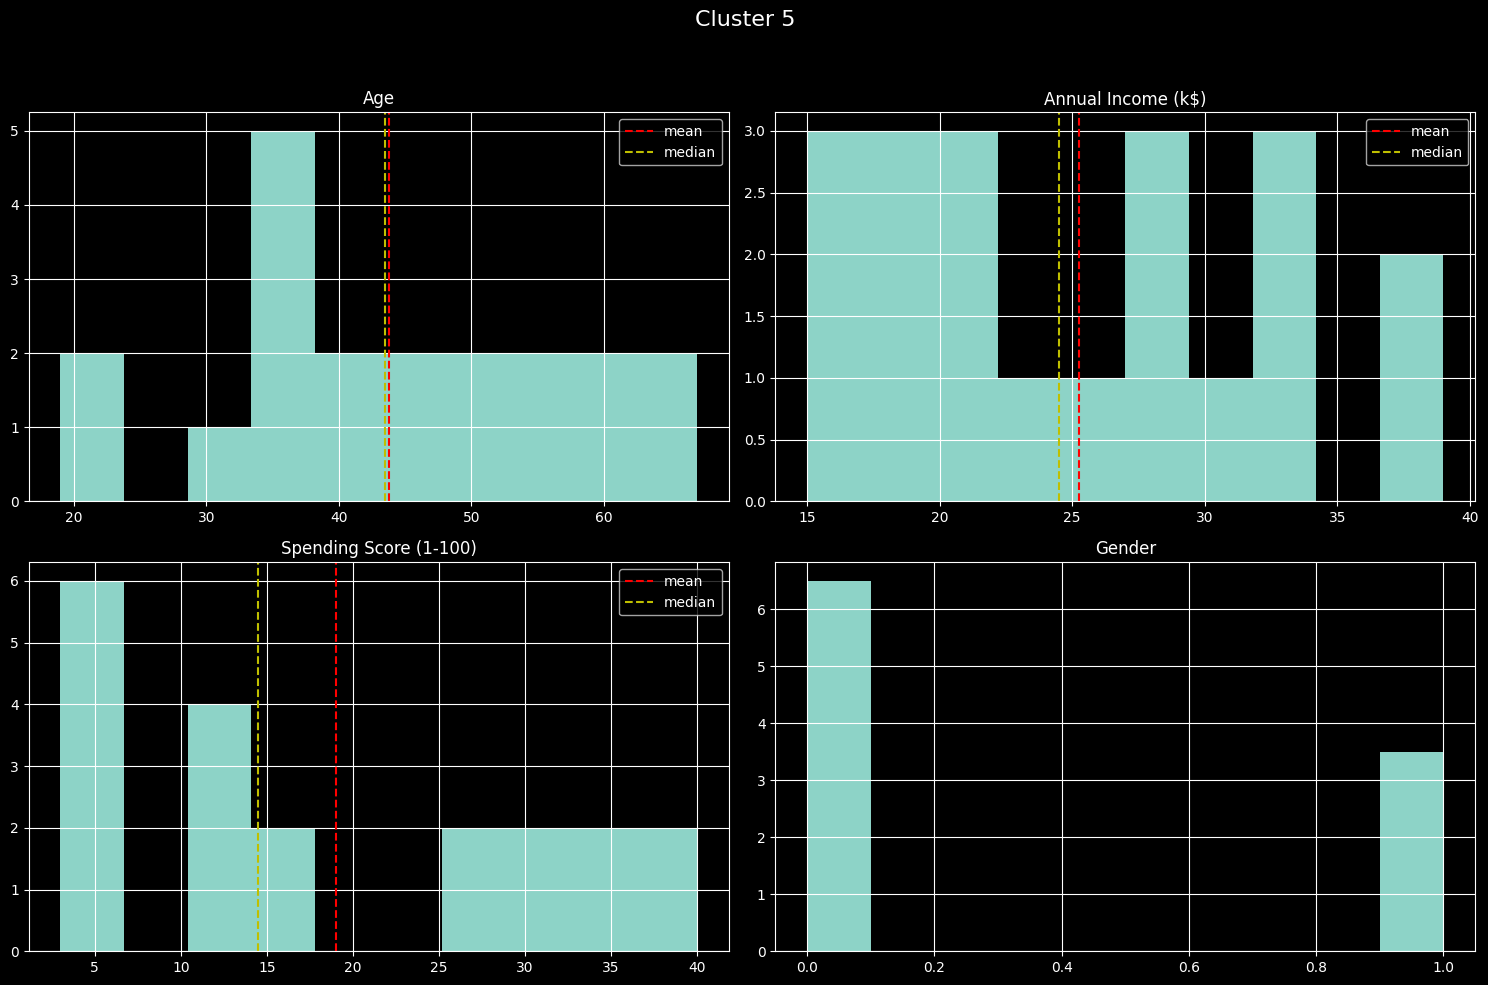

In [17]:
draw_hists(5)

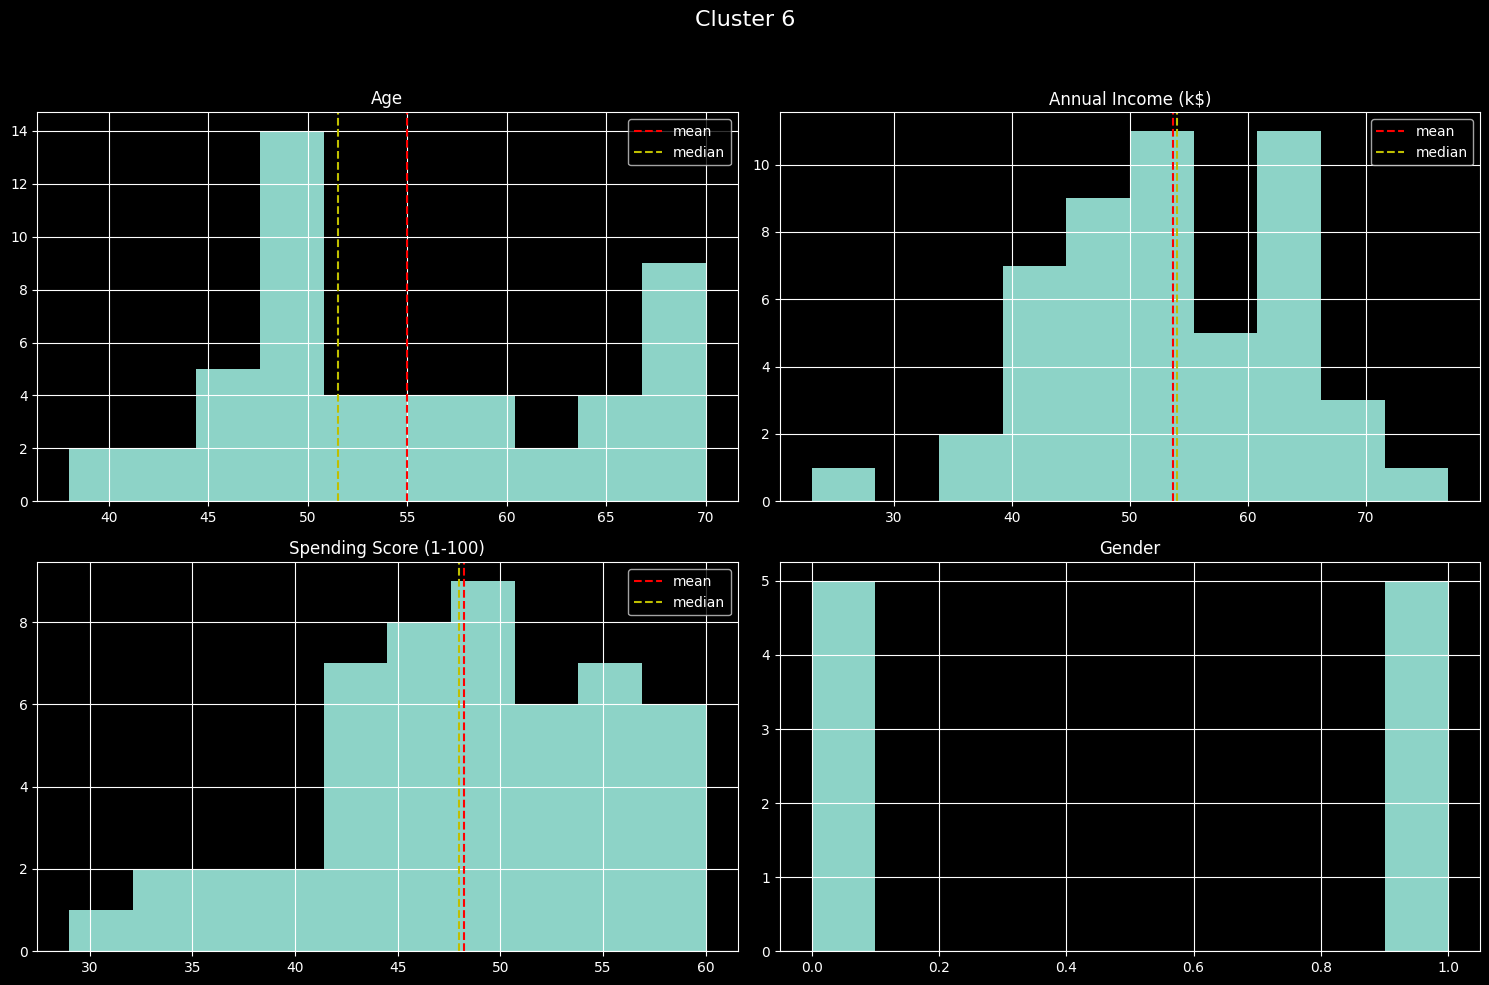

In [18]:
draw_hists(6)

Let's make notes what we've noted interesting on hists:
* Cluster 1 spending score hist is bimodal. One mode is $\approx 75$ and second $\approx 87.5$. Even the lower mode represents a relatively high score, but maybe here we have two clusters in one. And one of that clusters has bigger spending score and we are interested in them more.
* Cluster 5 age hist looks ok.
* In cluster 6 can be bimodal as well, but we don't have a lot objects in this cluster to say that

Ok, now it's time to create scatter plots to test some of our hypotheses

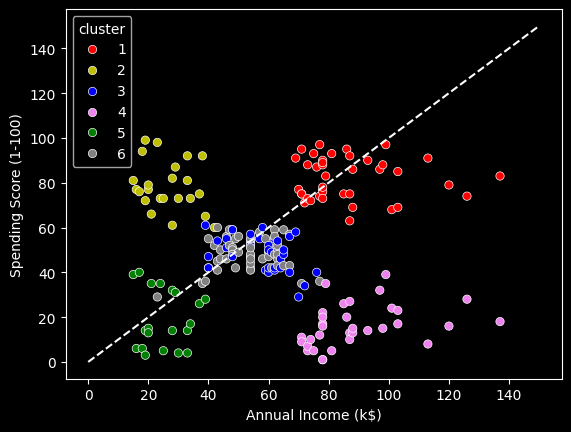

In [ ]:
fig, ax=plt.subplots()
color={1: 'r', 2: 'y', 3: 'b', 4: 'violet', 5: 'g', 6: 'gray'}
sns.scatterplot(data=df_for_clust, x='Annual Income (k$)', y='Spending Score (1-100)', ax=ax, hue='cluster', palette=color)
ax.plot(np.linspace(0, 140, 1000), np.linspace(0, 140, 1000), color='w', linestyle='--')
plt.show()

We can see that not only in cluster 2 there are objects that have spending score bigger than incomes. In cluster 6 we can explain that saying that kids are probably are helping their parents from that cluster. In other clusters (excluding 2 & 6) we can explain that saying they live with their partners. If that's true, I wanna see the share of males and females in that case:

In [ ]:
df_for_clust[(df_for_clust['Annual Income (k$)']<df_for_clust['Spending Score (1-100)'])&(~df_for_clust['cluster'].isin([2,6]))].groupby('Gender').size()

Gender
0    19
1    14
dtype: int64

No, there are more females than males, but still pretty even.

### W_C clustering

Now trying to do new clustering using Ward method but with Citybloсk metric. In ```scipy.cluster.hierarchy``` the Ward method uses Euclidean metric by default. So in order to implement this we'll need to sweat a little.

In [19]:
dis_matrix=pdist(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], 'cityblock')
link=linkage(squareform(dis_matrix), method='ward')

<ipython-input-19-19703ce33368>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link=linkage(squareform(dis_matrix), method='ward')


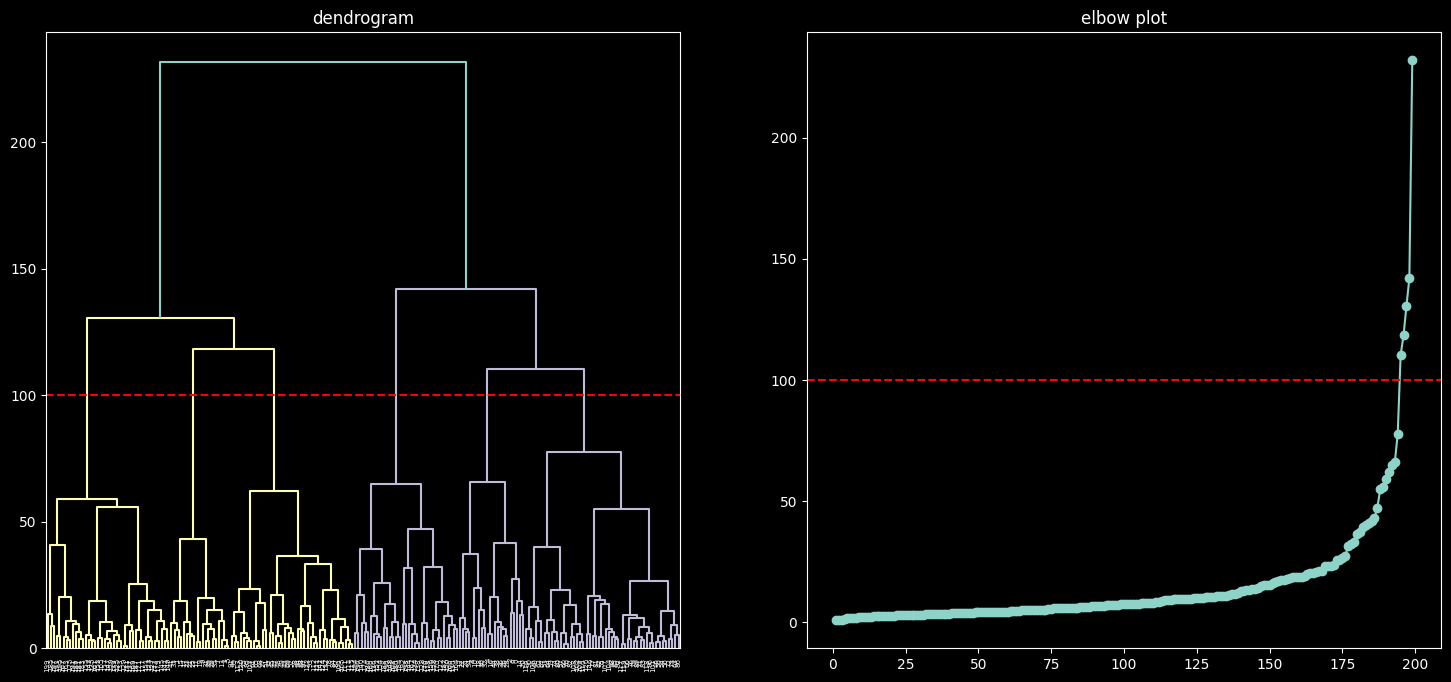

In [20]:
draw_dn_el(link, 100)

In [ ]:
df_for_clust['cluster']=fcluster(link, 100, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        0.461538  32.692308           86.538462               82.128205   
2        0.421053  24.578947           24.473684               81.421053   
3        0.307692  26.589744           55.025641               50.333333   
4        0.545455  41.454545           89.090909               16.181818   
5        0.380952  44.142857           25.142857               19.523810   
6        0.489796  55.020408           54.244898               48.632653   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        2.340346         3.294856          3.180364  
2        1.759534         0.931808          3.152980  
3        1.903481         2.095040          1.949127  
4        2.967609         3.392037          0.626631  
5        3.160057         0.957286          0.756048  
6        3.938749         2.065314          1.883270

Preaty the same we had before. Interpretation wull be the same.

### S_E clustering

In [21]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='single', metric='euclidean')

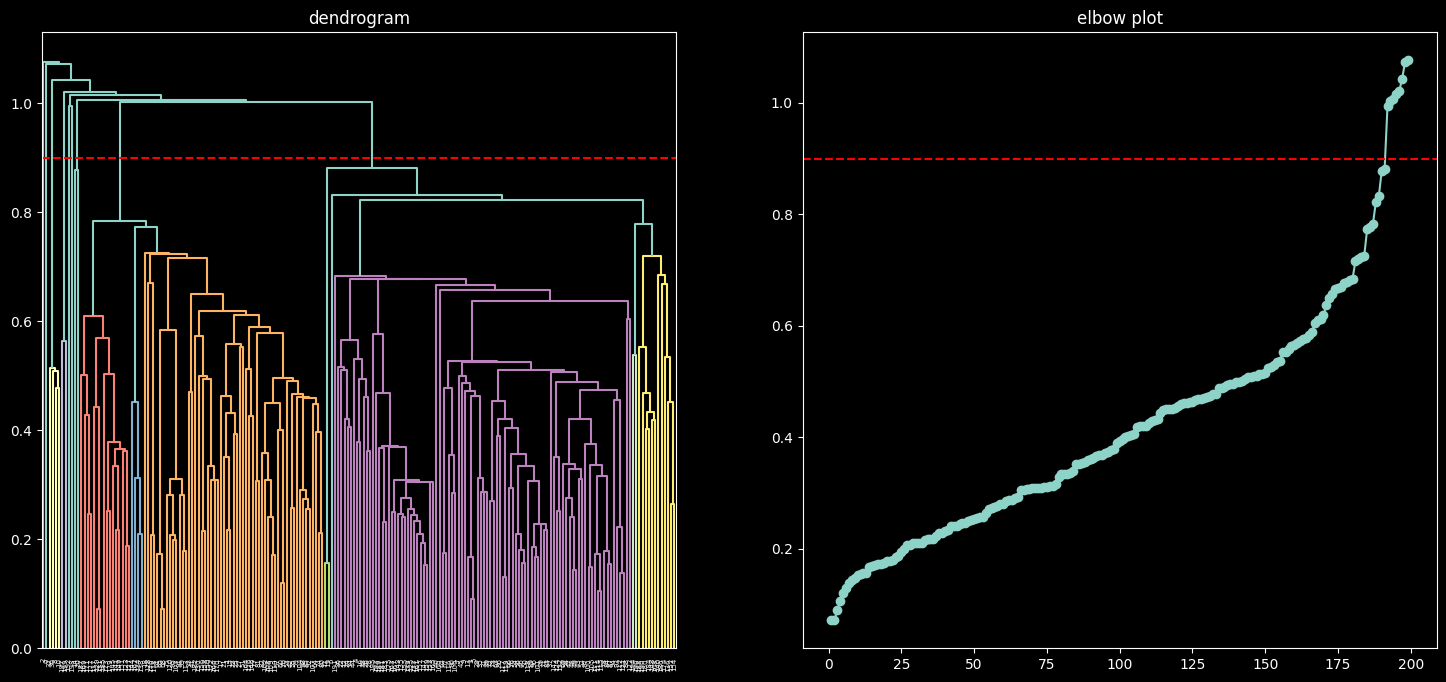

In [22]:
 draw_dn_el(link, 0.9)

In [ ]:
df_for_clust['cluster']=fcluster(link, 0.9, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                  
1           1.0  61.000000           25.250000                6.250000   
2           1.0  31.000000          131.500000               78.500000   
3           1.0  33.000000          113.000000                8.000000   
4           1.0  32.000000          137.000000               18.000000   
5           1.0  36.000000           22.000000               24.000000   
6           1.0  39.493506           62.376623               51.610390   
7           0.0  38.261261           59.639640               51.936937   
8           1.0  19.000000           15.000000               39.000000   
9           0.0  20.000000           16.000000                6.000000   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        4.366810         0.961366          0.242027  
2        2.219198         5.006716          3.039864  
3        2.362373         4.302349          0.309795  
4        2.290786         5.216122          0.697039  
5        2.577134         0.837625          0.929385  
6        2.827224         2.374920          1.998581  
7        2.739011         2.270713          2.011226  
8        1.360154         0.571108          1.510251  
9        1.431741         0.609182          0.232346

In [ ]:
df_for_clust.groupby('cluster').median()

Gender   Age  Annual Income (k$)  Spending Score (1-100)     Age_n  \
cluster                                                                       
1           1.0  62.0                24.5                     4.0  4.438397   
2           1.0  31.0               131.5                    78.5  2.219198   
3           1.0  33.0               113.0                     8.0  2.362373   
4           1.0  32.0               137.0                    18.0  2.290786   
5           1.0  36.0                22.0                    24.0  2.577134   
6           1.0  38.0                63.0                    52.0  2.720308   
7           0.0  35.0                60.0                    50.0  2.505547   
8           1.0  19.0                15.0                    39.0  1.360154   
9           0.0  20.0                16.0                     6.0  1.431741   

         Annual_Income_n  Spending_Score_n  
cluster                                     
1               0.932810          0.154898  
2               5.006716          3.039864  
3               4.302349          0.309795  
4               5.216122          0.697039  
5               0.837625          0.929385  
6               2.398655          2.013668  
7               2.284433          1.936219  
8               0.571108          1.510251  
9               0.609182          0.232346

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1      4
2      2
3      1
4      1
5      2
6     77
7    111
8      1
9      1
dtype: int64

How we can see this clustering is awful. We have only two clusters from nine which contain more than 5 objects, clusters 6 and 7. And the only difference between them is gender. One of reasons why everything went wrong was the predictor ```Gender```. Difference in that column can be only 0 or 1, so single clustering never will create a cluster where males and females will be together.

### S_C clustering

Let's try single clustering on more time but with cityblock metric

In [23]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='single', metric='cityblock')

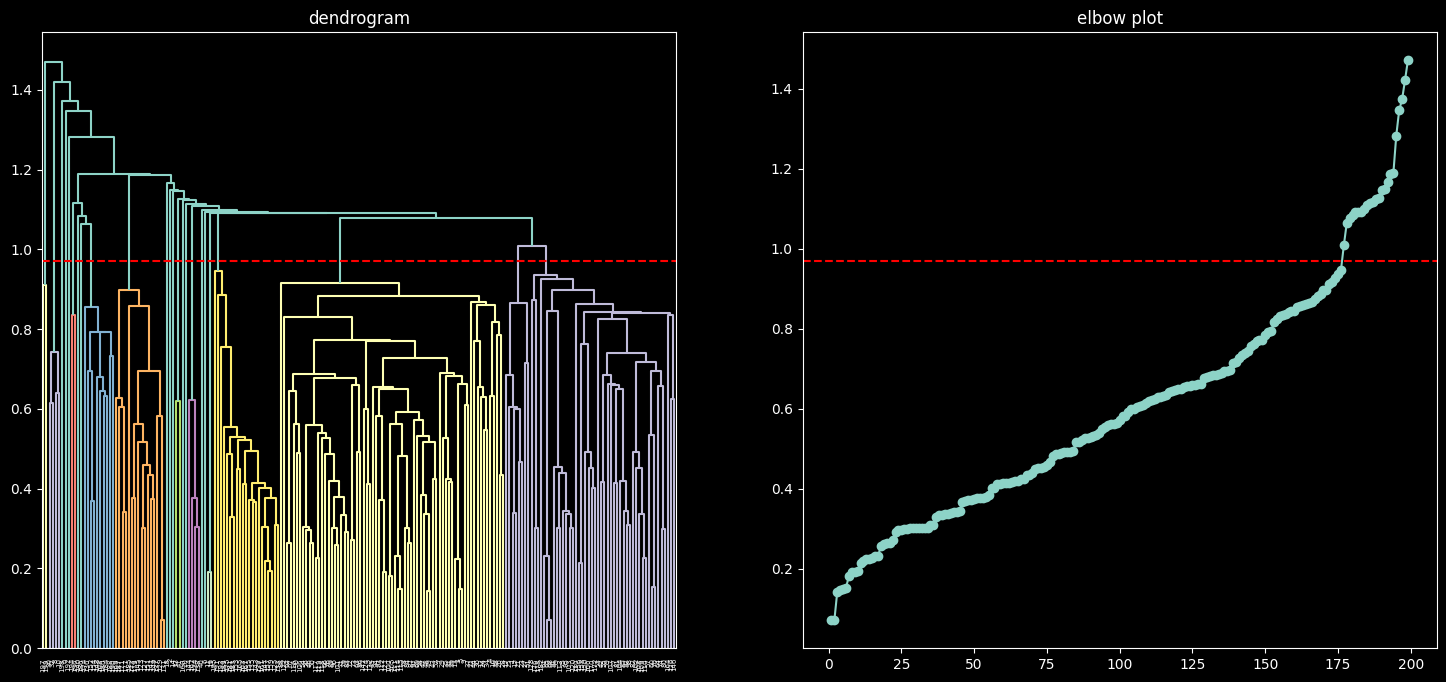

In [24]:
 draw_dn_el(link, 0.97)

In [ ]:
df_for_clust['cluster']=fcluster(link, 0.97, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1      2
2      4
3      2
4     10
5      1
6      1
7     16
8      2
9      4
10     2
11    21
12    71
13     8
14    46
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
dtype: int64

In [ ]:
df_for_clust[df_for_clust['cluster'].isin([4, 7, 11, 12, 13, 14])].groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                  
4           0.0  41.000000           88.400000               21.600000   
7           1.0  33.562500           81.562500               83.187500   
11          0.0  32.190476           86.047619               81.666667   
12          0.0  38.478873           46.901408               49.126761   
13          1.0  27.000000           25.375000               71.875000   
14          1.0  45.891304           62.956522               39.630435   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
4        2.935069         3.365732          0.836447  
7        2.402640         3.105401          3.221385  
11       2.304421         3.276167          3.162491  
12       2.754589         1.785719          1.902404  
13       1.932850         0.966125          2.783315  
14       3.285223         2.396999          1.534664

We see very alike picture we had in Ward method but much worse, we lost some clusters from there

### A_E clustering

In [25]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='average', metric='euclidean')

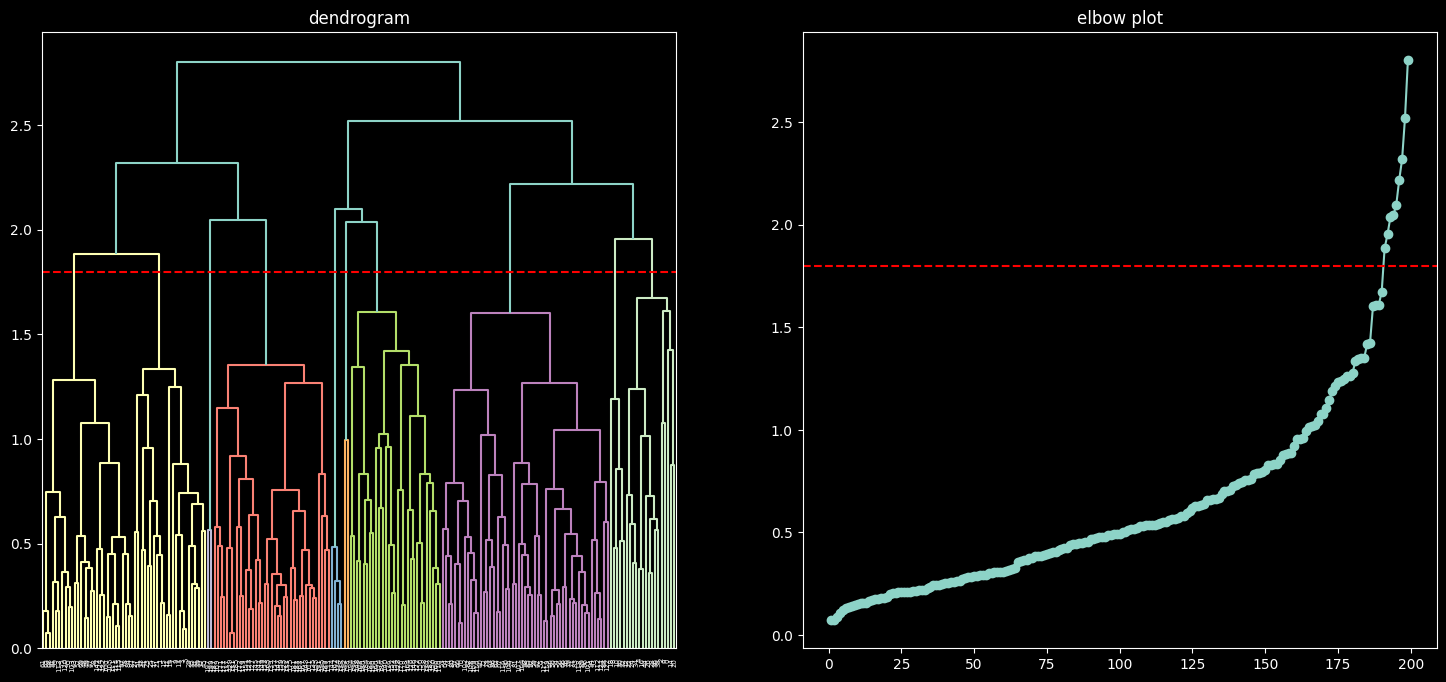

In [26]:
draw_dn_el(link, 1.8)

In [ ]:
df_for_clust['cluster']=fcluster(link, 1.8, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1     29
2     23
3      2
4     37
5      4
6      2
7     29
8     53
9      5
10    16
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        0.344828  23.896552           56.034483               49.034483   
2        0.434783  25.608696           26.434783               78.521739   
3        1.000000  31.000000          131.500000               78.500000   
4        0.432432  32.783784           84.108108               82.324324   
5        1.000000  20.750000           76.250000                8.000000   
6        1.000000  32.500000          125.000000               13.000000   
7        0.482759  45.206897           87.344828               18.862069   
8        0.415094  53.339623           54.490566               48.943396   
9        1.000000  59.200000           24.800000               10.800000   
10       0.187500  39.437500           25.250000               22.250000   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        1.710684         2.133451          1.898830  
2        1.833251         1.006475          3.040706  
3        2.219198         5.006716          3.039864  
4        2.346894         3.202323          3.187959  
5        1.485431         2.903134          0.309795  
6        2.326579         4.759236          0.503417  
7        3.236228         3.325557          0.730422  
8        3.818426         2.074668          1.895303  
9        4.237953         0.944232          0.418223  
10       2.823214         0.961366          0.861618

Again nothing new

### A_C clustering

In [27]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='average', metric='cityblock')

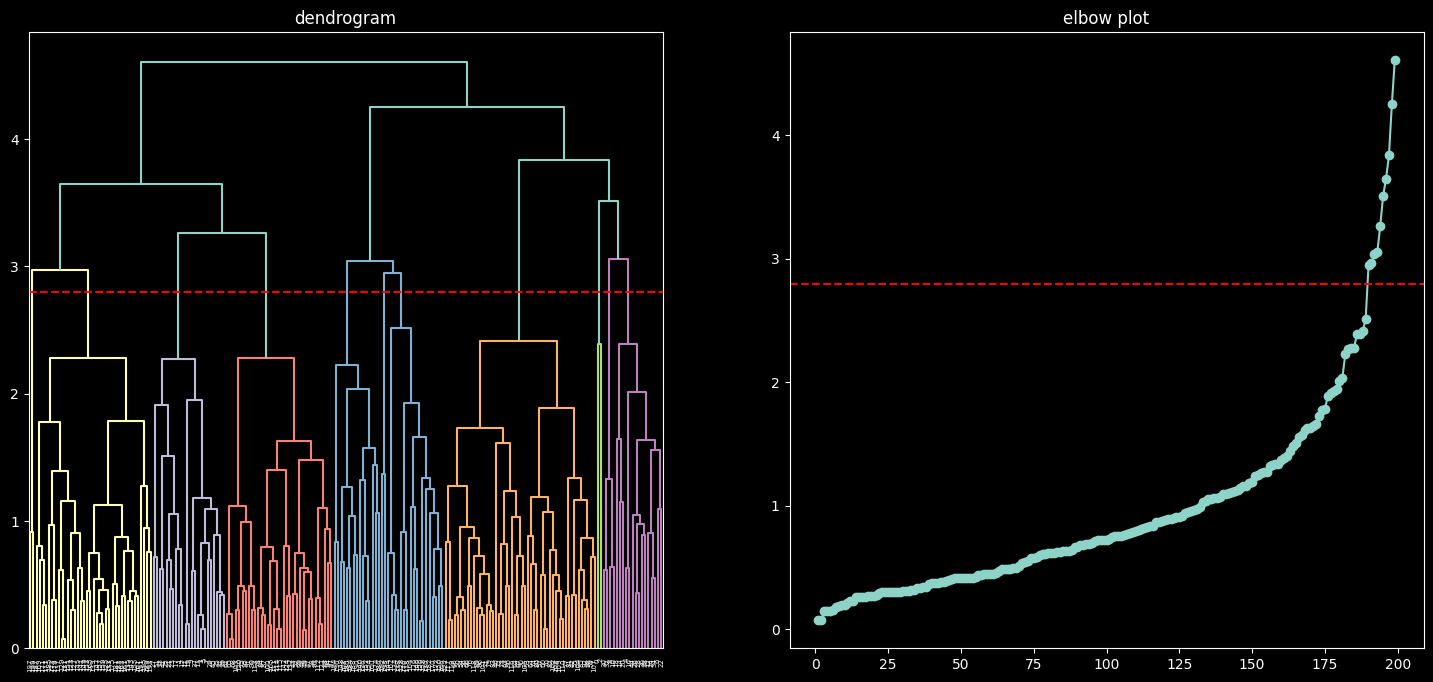

In [28]:
draw_dn_el(link, 2.8)

In [ ]:
df_for_clust['cluster']=fcluster(link, 2.8, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1      2
2     37
3     23
4     34
5     15
6      2
7     18
8     48
9      2
10     4
11    15
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        1.000000  31.000000          131.500000               78.500000   
2        0.432432  32.783784           84.108108               82.324324   
3        0.434783  25.608696           26.434783               78.521739   
4        0.294118  25.735294           56.882353               48.411765   
5        0.000000  44.600000           92.333333               21.600000   
6        1.000000  32.500000          125.000000               13.000000   
7        1.000000  40.277778           80.722222               14.166667   
8        0.458333  55.104167           53.729167               49.375000   
9        0.500000  19.500000           15.500000               22.500000   
10       1.000000  61.000000           25.250000                6.250000   
11       0.200000  42.933333           26.400000               22.666667   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        2.219198         5.006716          3.039864  
2        2.346894         3.202323          3.187959  
3        1.833251         1.006475          3.040706  
4        1.842314         2.165732          1.874716  
5        3.192782         3.515489          0.836447  
6        2.326579         4.759236          0.503417  
7        2.883367         3.073409          0.548595  
8        3.944745         2.045678          1.912017  
9        1.395947         0.590145          0.871299  
10       4.366810         0.961366          0.242027  
11       3.073471         1.005151          0.877753

Again nothing new

### C_E clustering

In [29]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='complete', metric='euclidean')

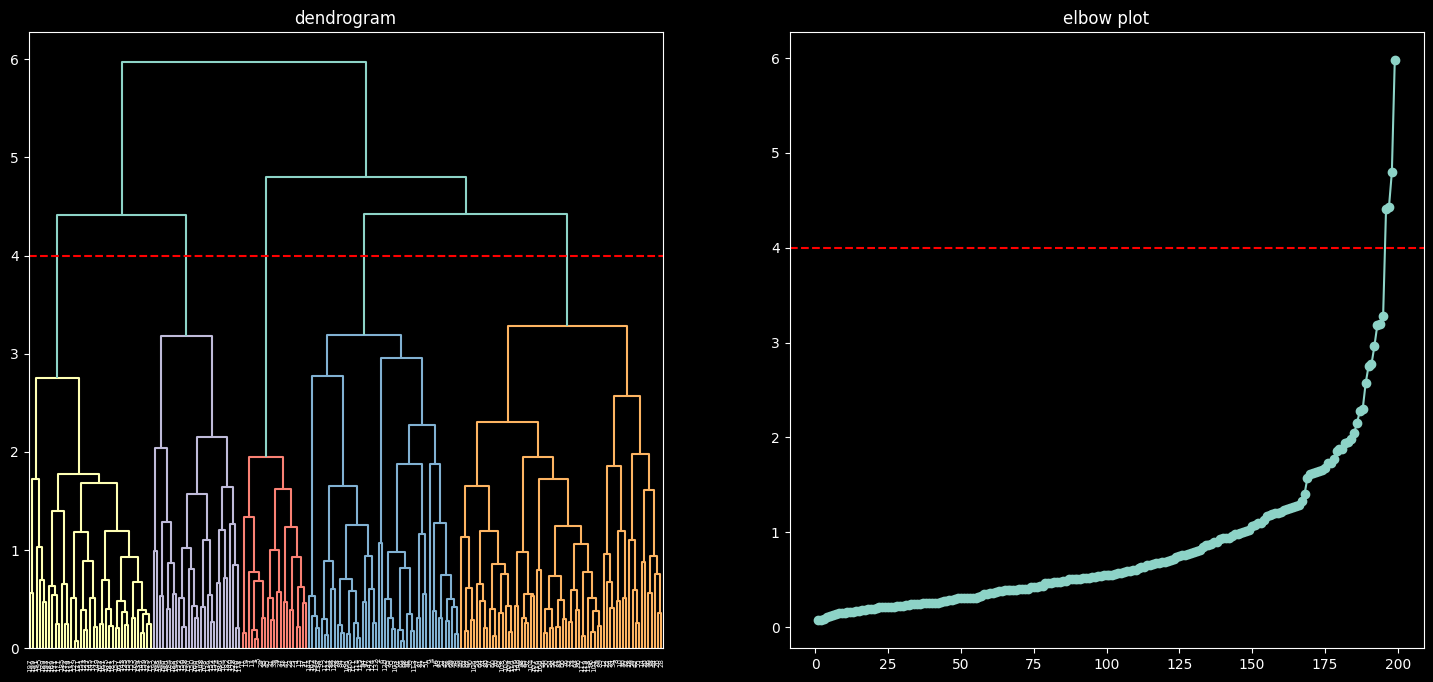

In [30]:
draw_dn_el(link, 4)

In [ ]:
df_for_clust['cluster']=fcluster(link, 4, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    39
2    28
3    21
4    48
5    64
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        0.461538  32.692308           86.538462               82.128205   
2        0.500000  43.892857           91.285714               16.678571   
3        0.380952  24.809524           25.619048               80.238095   
4        0.395833  26.750000           53.604167               43.458333   
5        0.453125  54.078125           47.968750               40.609375   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        2.340346         3.294856          3.180364  
2        3.142160         3.475602          0.645867  
3        1.776041         0.975417          3.107171  
4        1.914954         2.040919          1.682897  
5        3.871293         1.826357          1.572573

Nothing new but we forgot poor people.

### C_C clustering

In [31]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='complete', metric='cityblock')

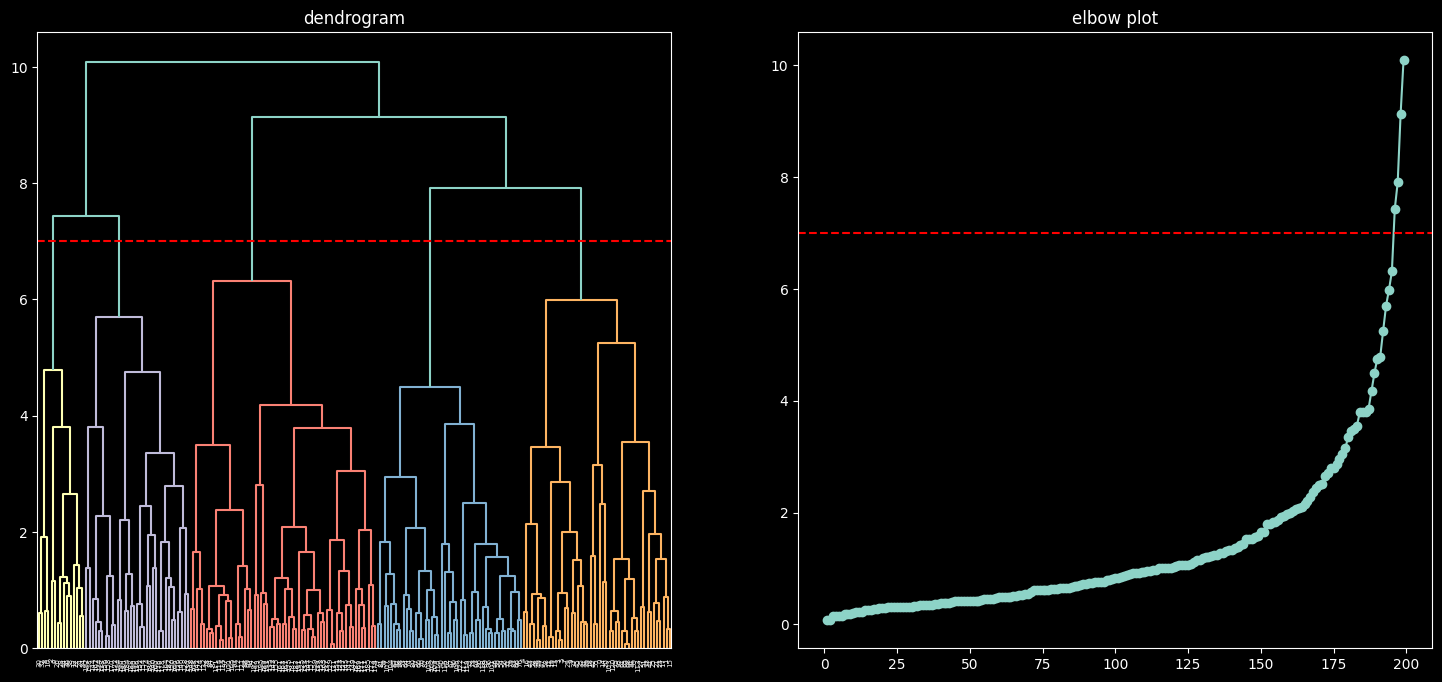

In [32]:
draw_dn_el(link, 7)

In [ ]:
df_for_clust['cluster']=fcluster(link, 7, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    15
2    33
3    59
4    46
5    47
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                    
1        0.266667  47.866667           27.200000               14.600000   
2        0.606061  42.090909           88.575758               16.848485   
3        0.305085  30.983051           78.932203               69.067797   
4        0.434783  55.434783           54.282609               49.847826   
5        0.553191  27.340426           34.617021               61.638298   

            Age_n  Annual_Income_n  Spending_Score_n  
cluster                                               
1        3.426633         1.035610          0.565376  
2        3.013164         3.372423          0.652447  
3        2.217985         3.005256          2.674608  
4        3.968412         2.066750          1.930326  
5        1.957220         1.318005          2.386905

Nothing new but all young people in one cluster.

### Conclusion

The best clustering was made by Ward method and Euclidean metric, the closest was Complete linkage method. The interpretations of results:
* Cluster 1

  Middle class and more which consume the most. They are young, average age is 32, but we have younger clusters. The group we want to sell our product the most, because cluster is big enough in size, ready to pay and has money to pay

* Cluster 2

  Students which live off their parents. Their size is not the biggest but not small. The second group we wanna sell the most, they consume a lot, pay not with their money and not regret a lot, becouse of purchase. They have money to buy our product

*  Cluster 3

  Young people which have a job. Similar to cluster 2 by age, but consume less. Thet's becouse they spend their own money. If we sell product fro young people they are probably our customers, but if product really needed or cheap. In that case we can combine our advertising camaigns with cluster 2 and maybe 1.

* Cluster 4

  Middle class and more but which consume little. They have money, but don't want to purchase lot of things. If we wanna sell them something it must be really somthing needed like food or clothes. average age 42

* Cluster 5

  Low middle class and lower. They don't a lot of money and consume little. like cluster 4 only ready ti buy realy neaded stuff. Average age 44

* Cluster 6

  Pensioners, average age is 50-55. This group is the biggest by size, ready to cosume more than cluster 4&5, less then 1&2 and alike as 3. If your product is for people this age, be ready to sell the product. They probably buy it, if it has minimum level of quality.

In [ ]:
link=linkage(df_for_clust[['Gender', 'Age_n', 'Annual_Income_n', 'Spending_Score_n']], method='ward', metric='euclidean')
df['cluster']=fcluster(link, 7, criterion='distance')

## DF_2

In [33]:
! gdown --id 1HDm0yjEDOBtqJ0fY2GCxwmexSDNmgyqO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HDm0yjEDOBtqJ0fY2GCxwmexSDNmgyqO
To: /content/EastWestAirlines.csv
100% 157k/157k [00:00<00:00, 95.7MB/s]


The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program.
For each passenger the data include information on their mileage history and on different ways they accrued or
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics
for the purpose of targeting different segments for different types of mileage offers.

* Balance -- Number of miles eligible for award travel
* Qual_miles -- Number of miles counted as qualifying for Topflight status
* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles-- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
* Bonus_miles -- Number of miles earned from non-flight bonus transactions in the past 12 months
* Bonus_trans -- Number of non-flight bonus transactions in the past 12 months
* Flight_miles_12mo -- Number of flight miles in the past 12 months
* Flight_trans_12 -- Number of flight transactions in the past 12 months
* Days_since_enrolled--Number of days since enrolled in flier program
* Award?--whether that person had award flight (free flight) or not

In [34]:
df=pd.read_csv('/content/EastWestAirlines.csv')
df

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 12 columns]

In [ ]:
df.describe(include='all')

ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll        Award  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

Before we start clustering of course we must normalize our data. But there are different ways how to do it:
* n_1 -- we divided by standard deviation
* n_2 -- we divided by difference between max and min
* n_3 -- we divided by difference betwwen quantile 0.75 and 0.25

There is a logic in normalizing different columns in different ways. Values of column ```Qual_miles``` are real numbers so the most logical choice can be to divide by std. But values of column ```cc1_miles``` are integers, like score of some test in school. In that case what might we want is divide by difference between the maximum score we can possibly score and the lowest one. Or if we have a deal with outliers more useful can be distance between quantile of 0.75 and quantile of 0.25.

Let's use different combinations of them and look at dendrograms. We'll leave that normalization which has the best dendrogram


In [35]:
df_for_clust=df.drop('ID', axis=1)
orig_cols=df_for_clust.columns
df_for_clust[['Balance_n_1',
              'Qual_miles_n_1',
              'cc1_miles_n_1',
              'cc2_miles_n_1',
              'cc3_miles_n_1',
              'Bonus_miles_n_1',
              'Bonus_trans_n_1',
              'Flight_miles_12mo_n_1',
              'Flight_trans_12_n_1',
              'Days_since_enroll_n_1',
              'Award_n_1']]=df_for_clust[orig_cols].apply(lambda x: x/x.std())
df_for_clust[['Balance_n_2',
              'Qual_miles_n_2',
              'cc1_miles_n_2',
              'cc2_miles_n_2',
              'cc3_miles_n_2',
              'Bonus_miles_n_2',
              'Bonus_trans_n_2',
              'Flight_miles_12mo_n_2',
              'Flight_trans_12_n_2',
              'Days_since_enroll_n_2',
              'Award_n_2']]=df_for_clust[orig_cols].apply(lambda x: x/(x.max()-x.min()))
df_for_clust[['Balance_n_3',
              'Qual_miles_n_3',
              'cc1_miles_n_3',
              'cc2_miles_n_3',
              'cc3_miles_n_3',
              'Bonus_miles_n_3',
              'Bonus_trans_n_3',
              'Flight_miles_12mo_n_3',
              'Flight_trans_12_n_3',
              'Days_since_enroll_n_3',
              'Award_n_1']]=df_for_clust[orig_cols].apply(lambda x: x/(x.quantile(0.75)-x.quantile(0.25)))
df_for_clust.head(3)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  ...  \
0            1                  0                0               7000  ...   
1            2                  0                0               6968  ...   
2            4                  0                0               7034  ...   

   Balance_n_3  Qual_miles_n_3  cc1_miles_n_3  cc2_miles_n_3  cc3_miles_n_3  \
0     0.380947             NaN            0.5            inf            inf   
1     0.260489             NaN            0.5            inf            inf   
2     0.559772             NaN            0.5            inf            inf   

   Bonus_miles_n_3  Bonus_trans_n_3  Flight_miles_12mo_n_3  \
0         0.007716         0.071429                    0.0   
1         0.009534         0.142857                    0.0   
2         0.182834         0.285714                    0.0   

   Flight_trans_12_n_3  Days_since_enroll_n_3  
0                  0.0               2.022829  
1                  0.0               2.013582  
2                  0.0               2.032654  

[3 rows x 43 columns]

In [36]:
d_all=df_for_clust.describe(include='all').T.reset_index()
d_all[d_all['max']==float('inf')]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


index   count  mean  std  min  25%  50%  75%  max
34  Qual_miles_n_3   226.0   inf  NaN  inf  NaN  NaN  NaN  inf
36   cc2_miles_n_3  3999.0   inf  NaN  inf  NaN  NaN  NaN  inf
37   cc3_miles_n_3  3999.0   inf  NaN  inf  NaN  NaN  NaN  inf

In [37]:
X=[]
X.append(df_for_clust[['Balance_n_1',
              'Qual_miles_n_1',
              'cc1_miles_n_1',
              'cc2_miles_n_1',
              'cc3_miles_n_1',
              'Bonus_miles_n_1',
              'Bonus_trans_n_1',
              'Flight_miles_12mo_n_1',
              'Flight_trans_12_n_1',
              'Days_since_enroll_n_1',
              'Award_n_1']])
X.append(df_for_clust[['Balance_n_1',
              'Qual_miles_n_1',
              'cc1_miles_n_2',
              'cc2_miles_n_2',
              'cc3_miles_n_2',
              'Bonus_miles_n_1',
              'Bonus_trans_n_1',
              'Flight_miles_12mo_n_1',
              'Flight_trans_12_n_1',
              'Days_since_enroll_n_1',
              'Award_n_2']])
X.append(df_for_clust[['Balance_n_3',
              'Qual_miles_n_1',
              'cc1_miles_n_2',
              'cc2_miles_n_2',
              'cc3_miles_n_2',
              'Bonus_miles_n_3',
              'Bonus_trans_n_3',
              'Flight_miles_12mo_n_3',
              'Flight_trans_12_n_3',
              'Days_since_enroll_n_3',
              'Award_n_2']])

### W_E clustering

In [38]:
links=lkg(X,'ward', 'euclidean')

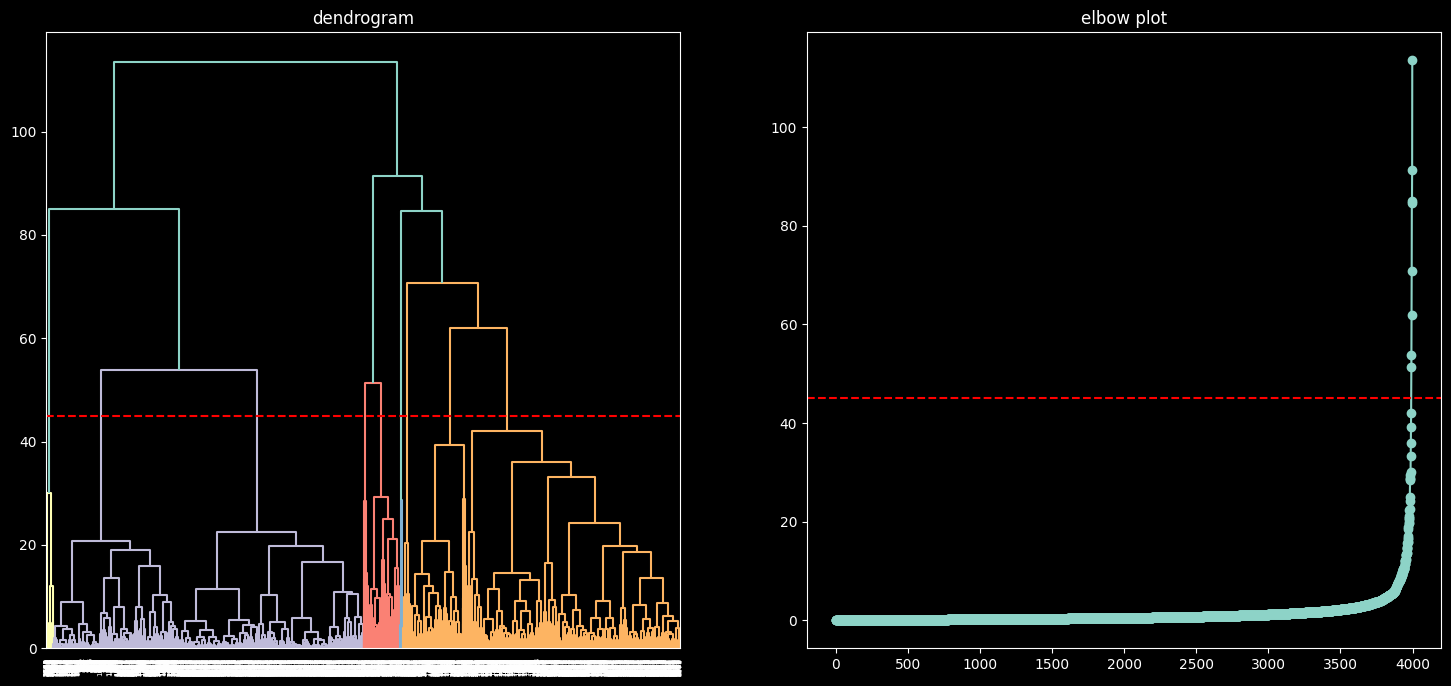

In [39]:
draw_dn_el(links[0], 45)

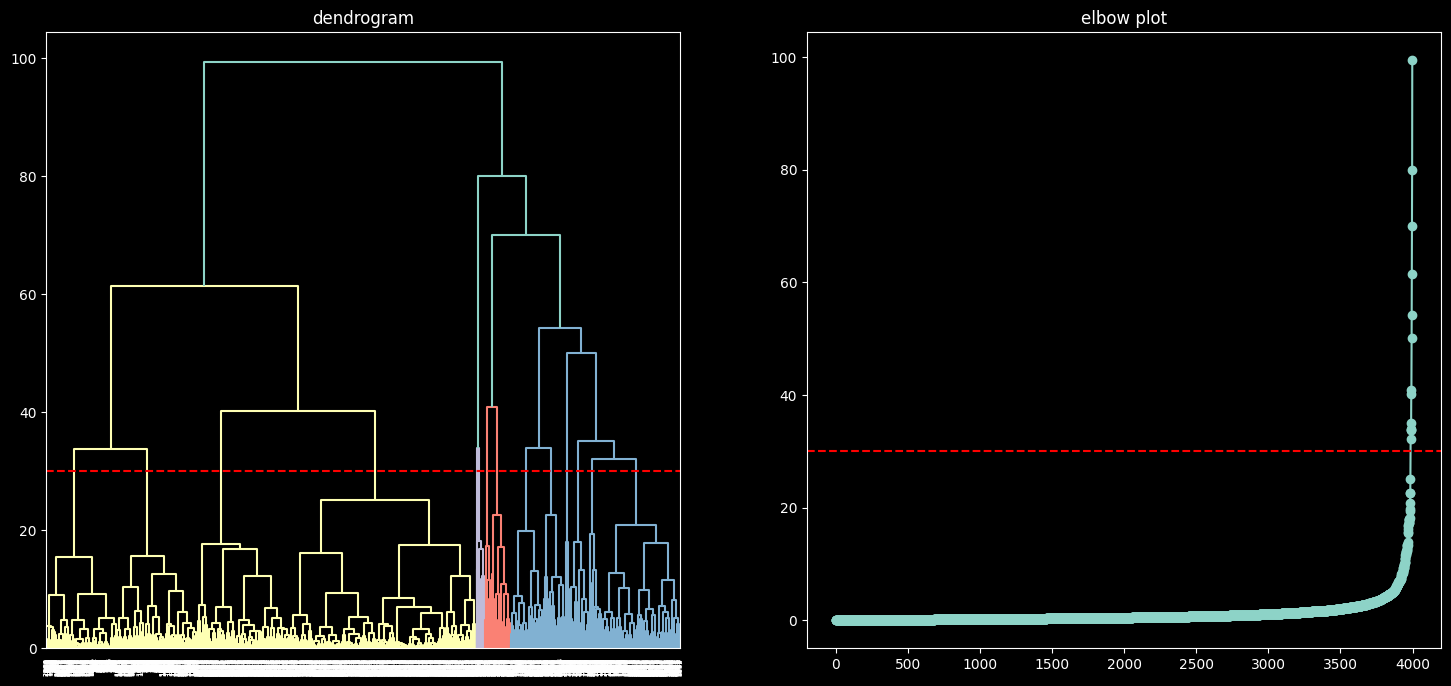

In [40]:
draw_dn_el(links[1], 30)

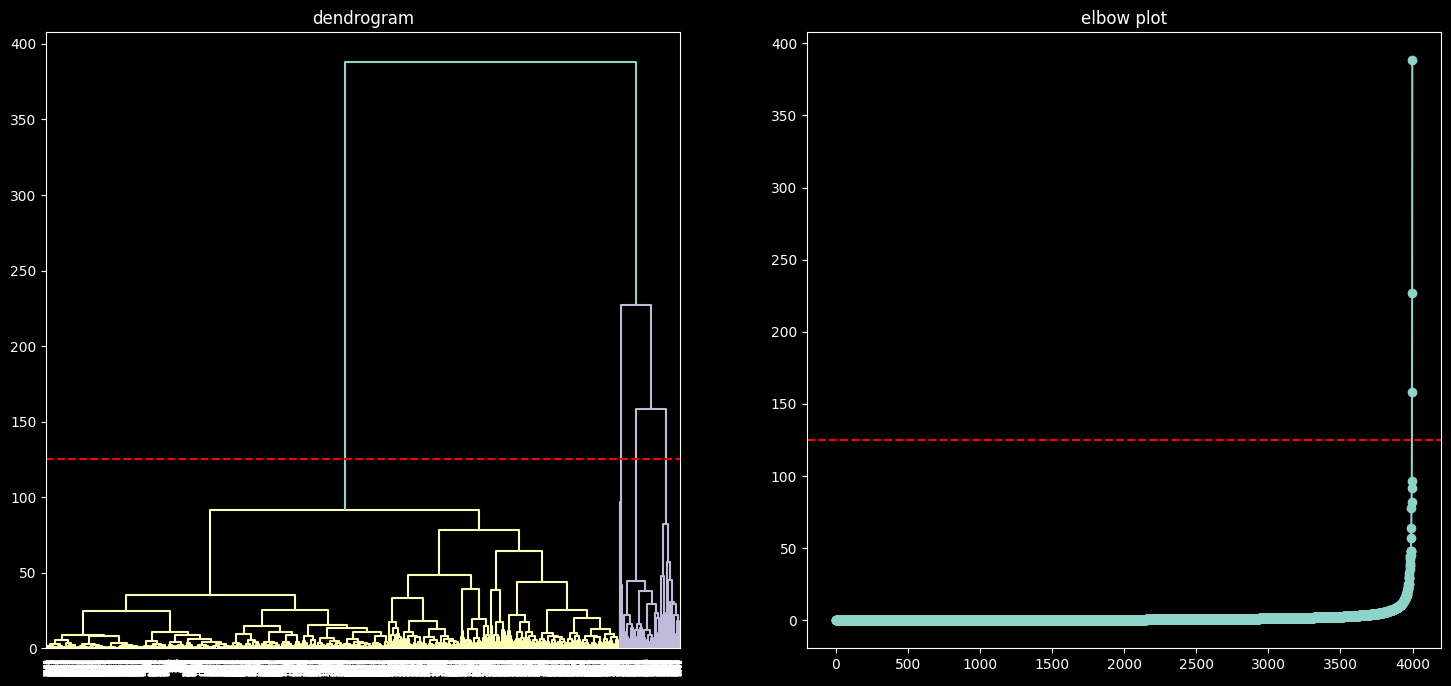

In [ ]:
draw_dn_el(links[2], 125)

In [ ]:
link=links[0]
df_for_clust['cluster']=fcluster(link, 45, criterion='distance')
df_for_clust.groupby('cluster').size()

cluster
1      43
2     800
3    1160
4      30
5     201
6      18
7      44
8     356
9    1347
dtype: int64

### W_C clustering

In [42]:
links=lkg_w_c(X)

<ipython-input-2-0ead550951f2>:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))


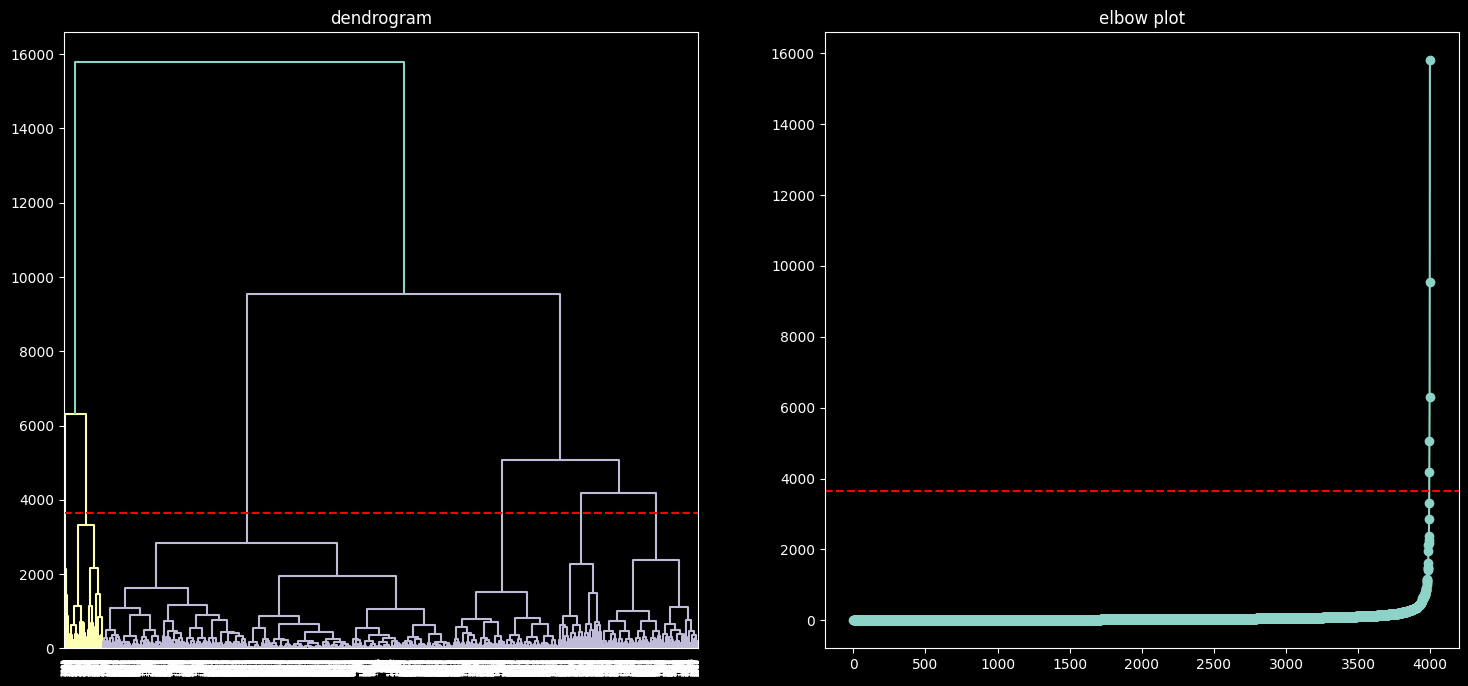

In [43]:
draw_dn_el(links[0], 3650)

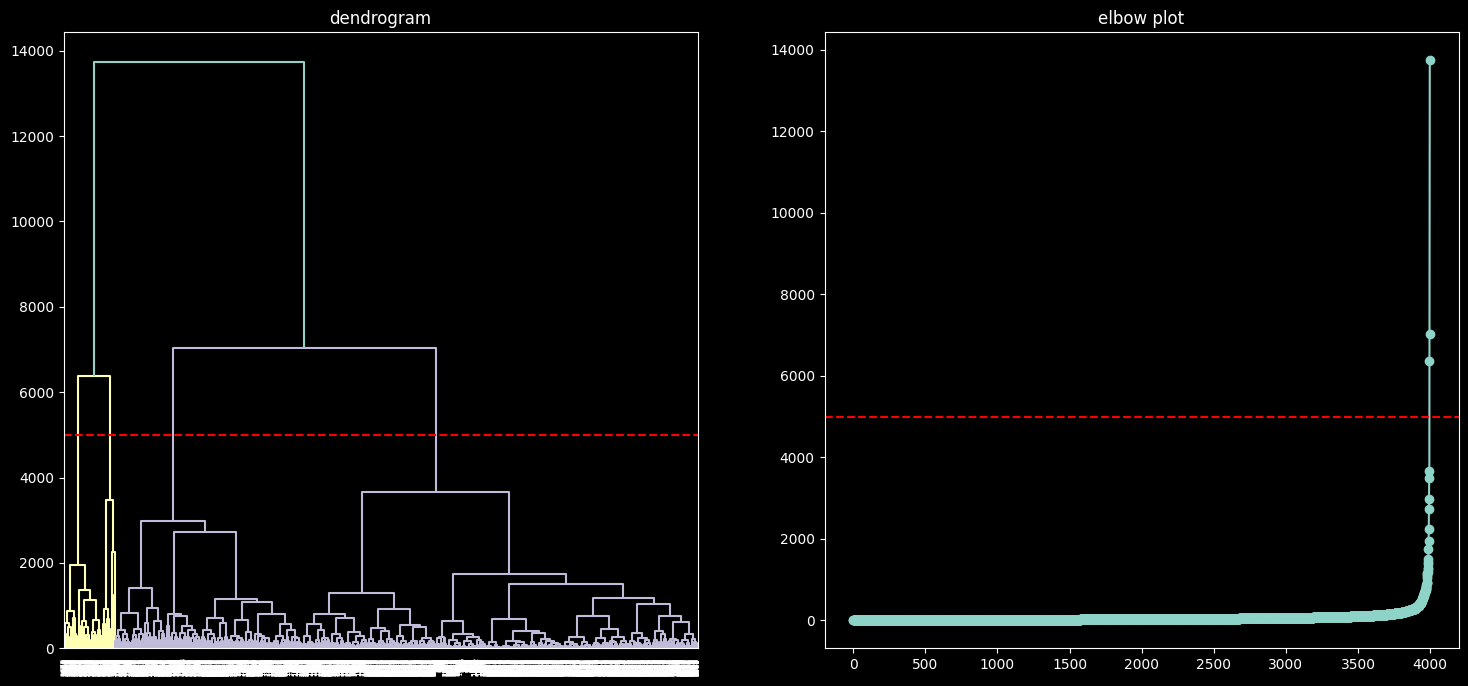

In [ ]:
draw_dn_el(links[1], 5000)

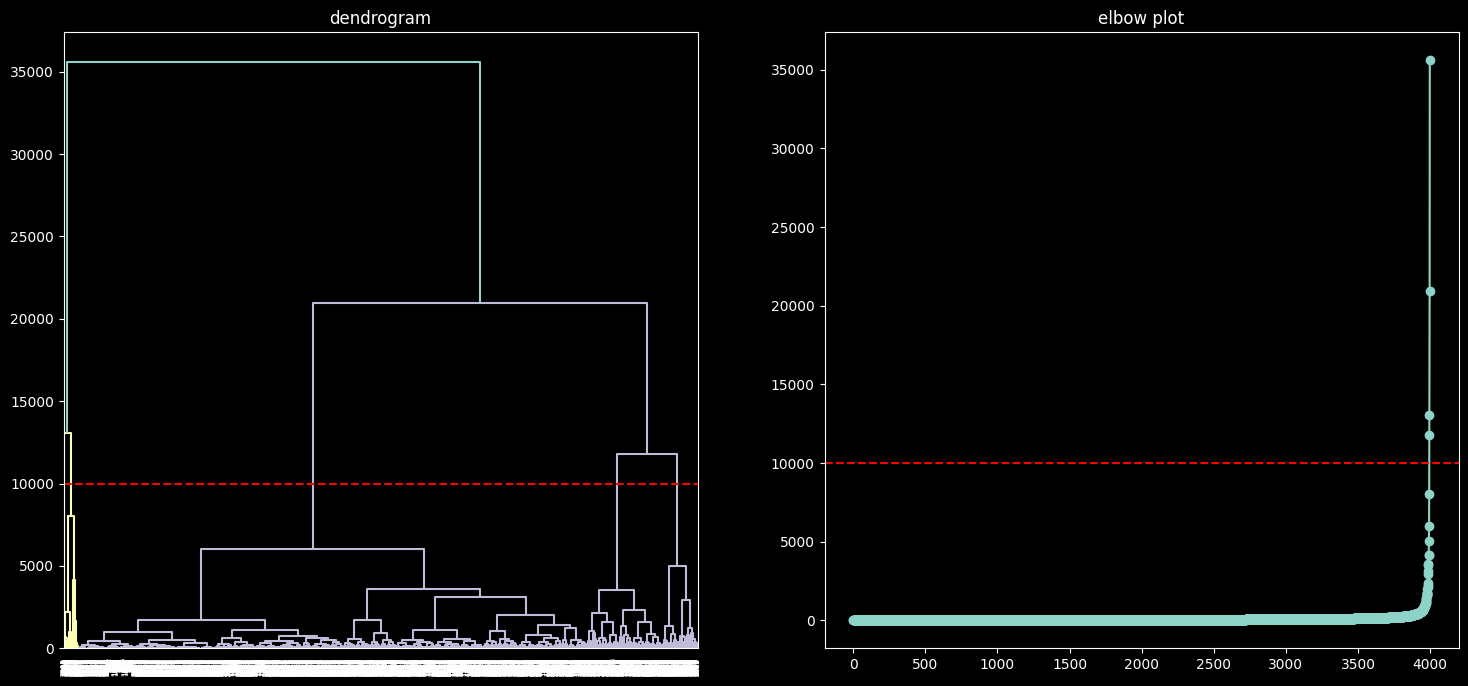

In [ ]:
draw_dn_el(links[2], 10000)

In [ ]:
link=links[1]
df_for_clust['cluster']=fcluster(link, 5000, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1     242
2      83
3    1182
4    2492
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                                
1        185230.665289  1101.830579   2.909091   1.020661   1.090909   
2        308647.638554  1728.963855   2.927711   1.036145   1.036145   
3        106121.385787   127.529611   3.066836   1.012690   1.019459   
4         39507.486356     6.190610   1.470305   1.014045   1.000401   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
1        44885.342975    22.516529        2125.500000         6.619835   
2        58179.975904    32.927711        6310.783133        17.879518   
3        31193.662437    16.119289         548.483080         1.573604   
4         6420.601926     7.689005          61.512841         0.219502   

         Days_since_enroll  ...  Balance_n_3  Qual_miles_n_3  cc1_miles_n_3  \
cluster                     ...                                               
1              4704.475207  ...     2.507302             inf       1.454545   
2              5468.722892  ...     4.177887             inf       1.463855   
3              4848.906937  ...     1.436470             inf       1.533418   
4              3670.274478  ...     0.534777             inf       0.735152   

         cc2_miles_n_3  cc3_miles_n_3  Bonus_miles_n_3  Bonus_trans_n_3  \
cluster                                                                   
1                  inf            inf         1.990437         1.608323   
2                  inf            inf         2.579986         2.351979   
3                  inf            inf         1.383280         1.151378   
4                  inf            inf         0.284721         0.549215   

         Flight_miles_12mo_n_3  Flight_trans_12_n_3  Days_since_enroll_n_3  
cluster                                                                     
1                     6.834405             6.619835               1.359478  
2                    20.291907            17.879518               1.580327  
3                     1.763611             1.573604               1.401216  
4                     0.197790             0.219502               1.060620  

[4 rows x 43 columns]

In [ ]:
df_for_clust.groupby('cluster').median()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
cluster                                                                       
1        125424.0         0.0        3.0        1.0        1.0      30475.5   
2        189054.0         0.0        3.0        1.0        1.0      34318.0   
3         86279.0         0.0        4.0        1.0        1.0      29964.0   
4         28135.0         0.0        1.0        1.0        1.0       2750.0   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
cluster                                                                       
1               21.5             1781.0              6.0             4923.0   
2               32.0             5500.0             17.0             6234.0   
3               16.0              100.0              1.0             4973.0   
4                6.0                0.0              0.0             3528.0   

         ...  Balance_n_3  Qual_miles_n_3  cc1_miles_n_3  cc2_miles_n_3  \
cluster  ...                                                              
1        ...     1.697752             inf            1.5            inf   
2        ...     2.559055             inf            1.5            inf   
3        ...     1.167882             inf            2.0            inf   
4        ...     0.380838             inf            0.5            inf   

         cc3_miles_n_3  Bonus_miles_n_3  Bonus_trans_n_3  \
cluster                                                    
1                  inf         1.351433         1.535714   
2                  inf         1.521829         2.285714   
3                  inf         1.328751         1.142857   
4                  inf         0.121949         0.428571   

         Flight_miles_12mo_n_3  Flight_trans_12_n_3  Days_since_enroll_n_3  
cluster                                                                     
1                     5.726688                  6.0               1.422627  
2                    17.684887                 17.0               1.801474  
3                     0.321543                  1.0               1.437076  
4                     0.000000                  0.0               1.019506  

[4 rows x 43 columns]

### A_E clustering

In [44]:
links=lkg(X, 'average', 'euclidean')

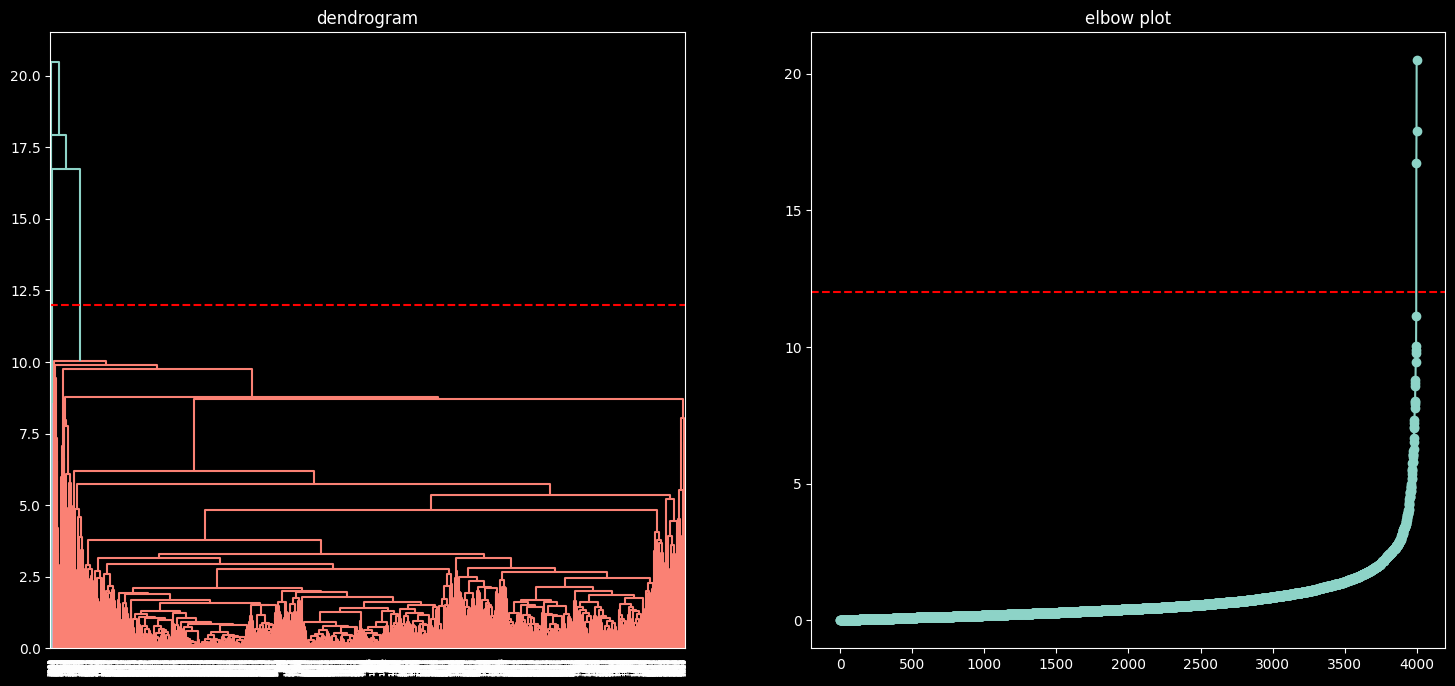

In [45]:
draw_dn_el(links[0], 12)

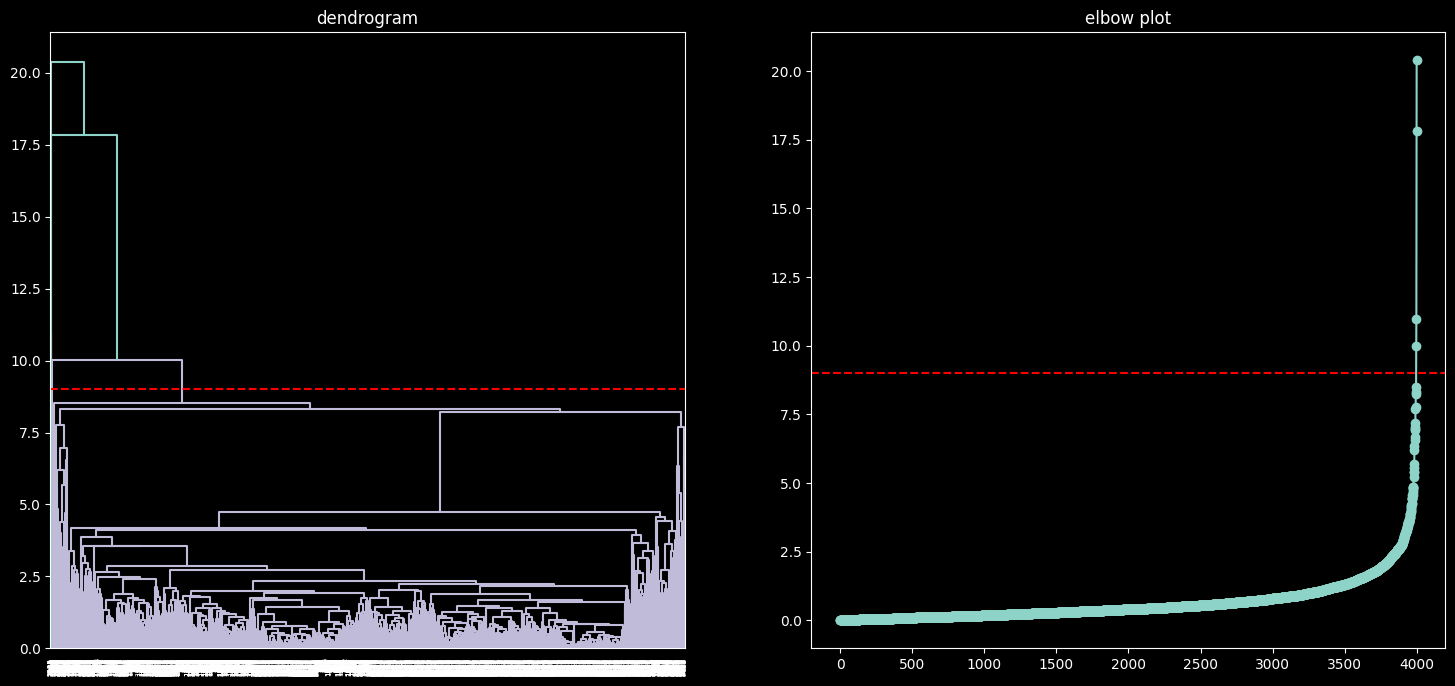

In [ ]:
draw_dn_el(links[1], 9)

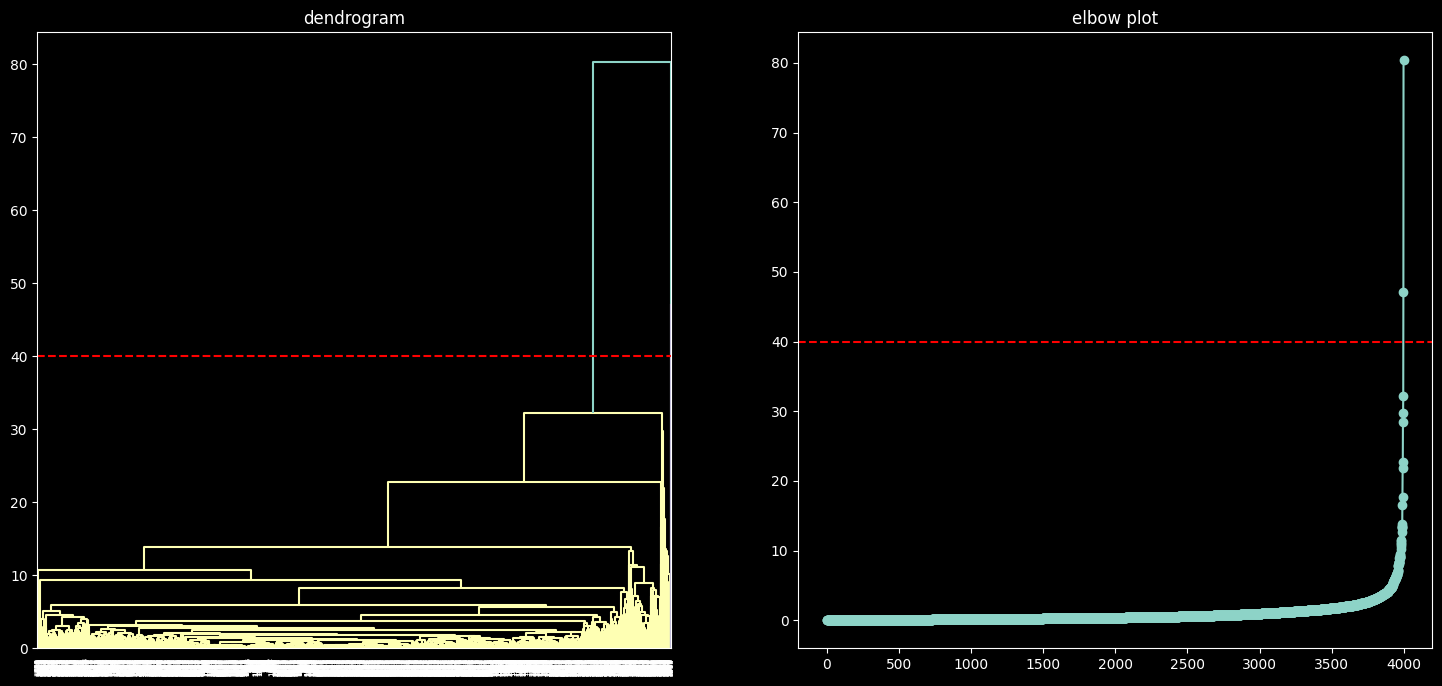

In [ ]:
draw_dn_el(links[2], 40)

In [ ]:
link=links[1]
df_for_clust['cluster']=fcluster(link, 9, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1       3
2       1
3       8
4    3986
5       1
dtype: int64

### A_C clustering

In [ ]:
links=lkg(X, 'average', 'cityblock')

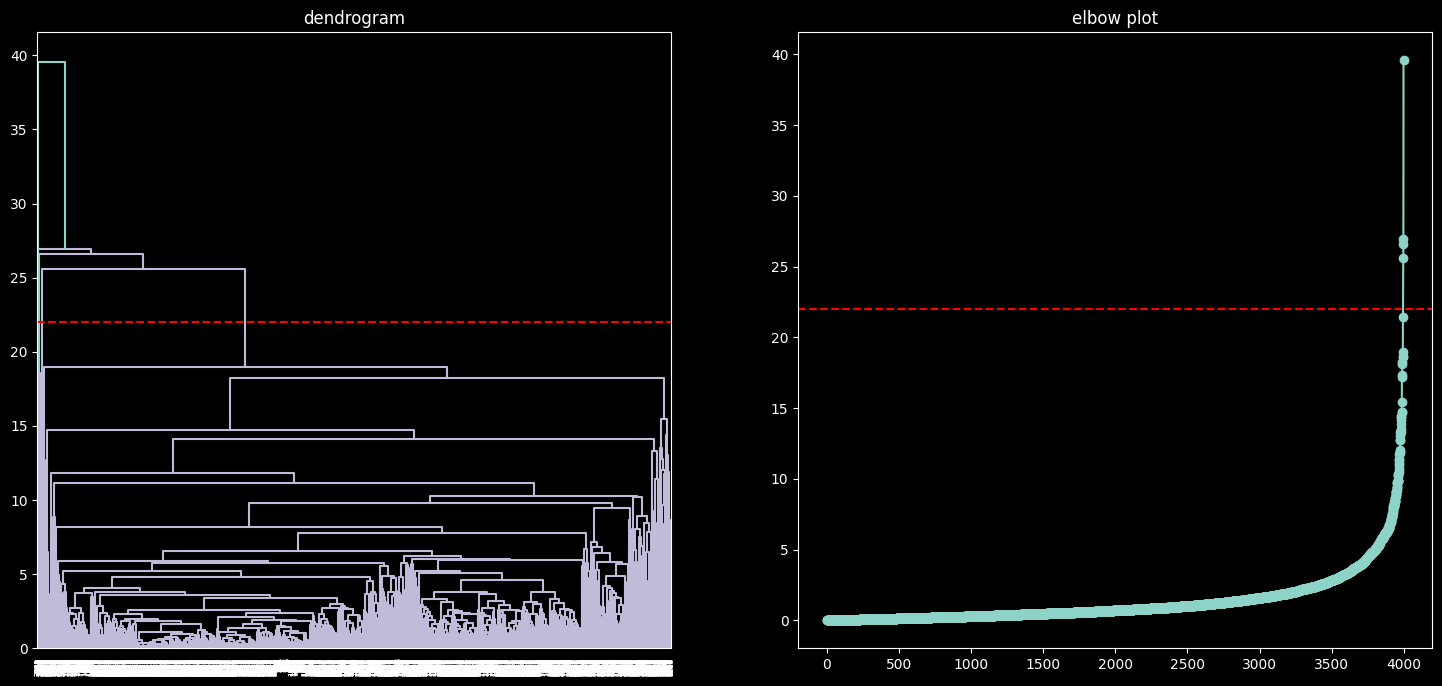

In [ ]:
draw_dn_el(links[0], 22)

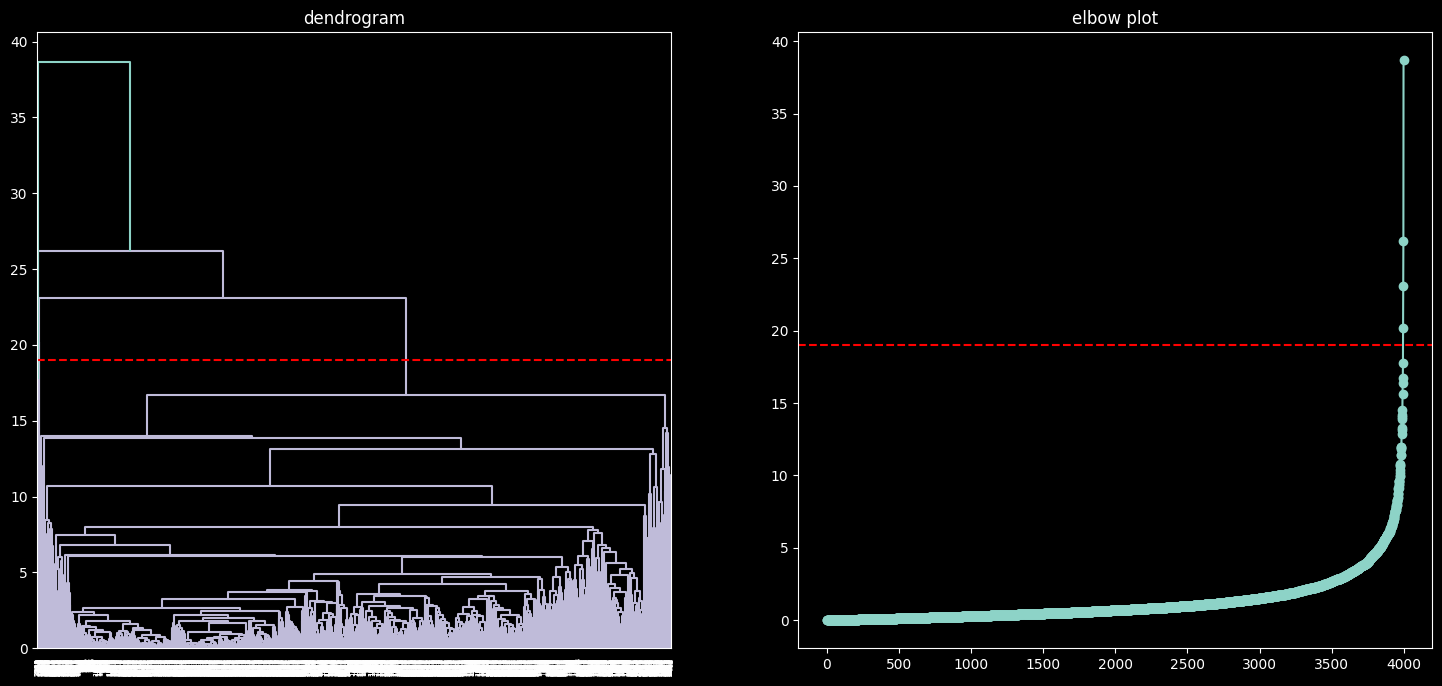

In [ ]:
draw_dn_el(links[1], 19)

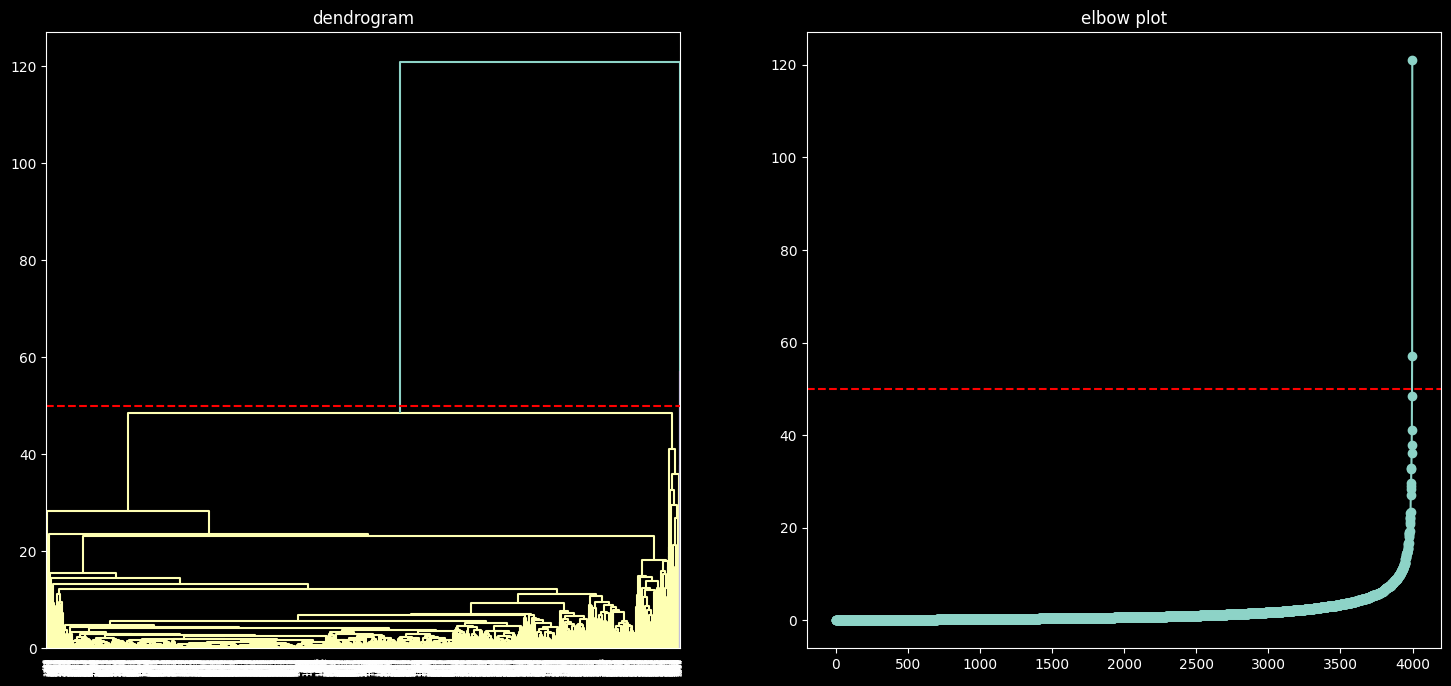

In [ ]:
draw_dn_el(links[2], 50)

In [ ]:
link=links[2]
df_for_clust['cluster']=fcluster(link, 4, criterion='maxclust')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    3927
2      68
3       3
4       1
dtype: int64

### C_E clustering

In [46]:
links=lkg(X, 'complete', 'euclidean')

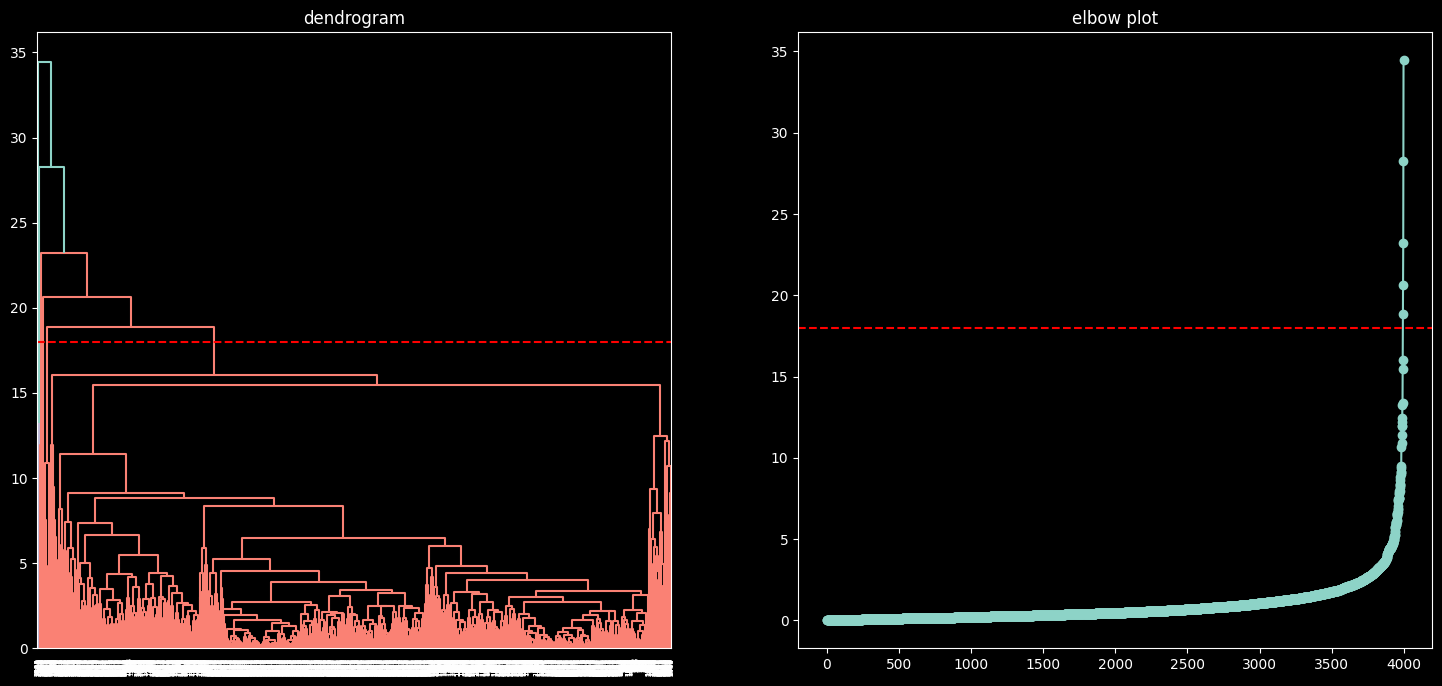

In [47]:
draw_dn_el(links[0], 18)

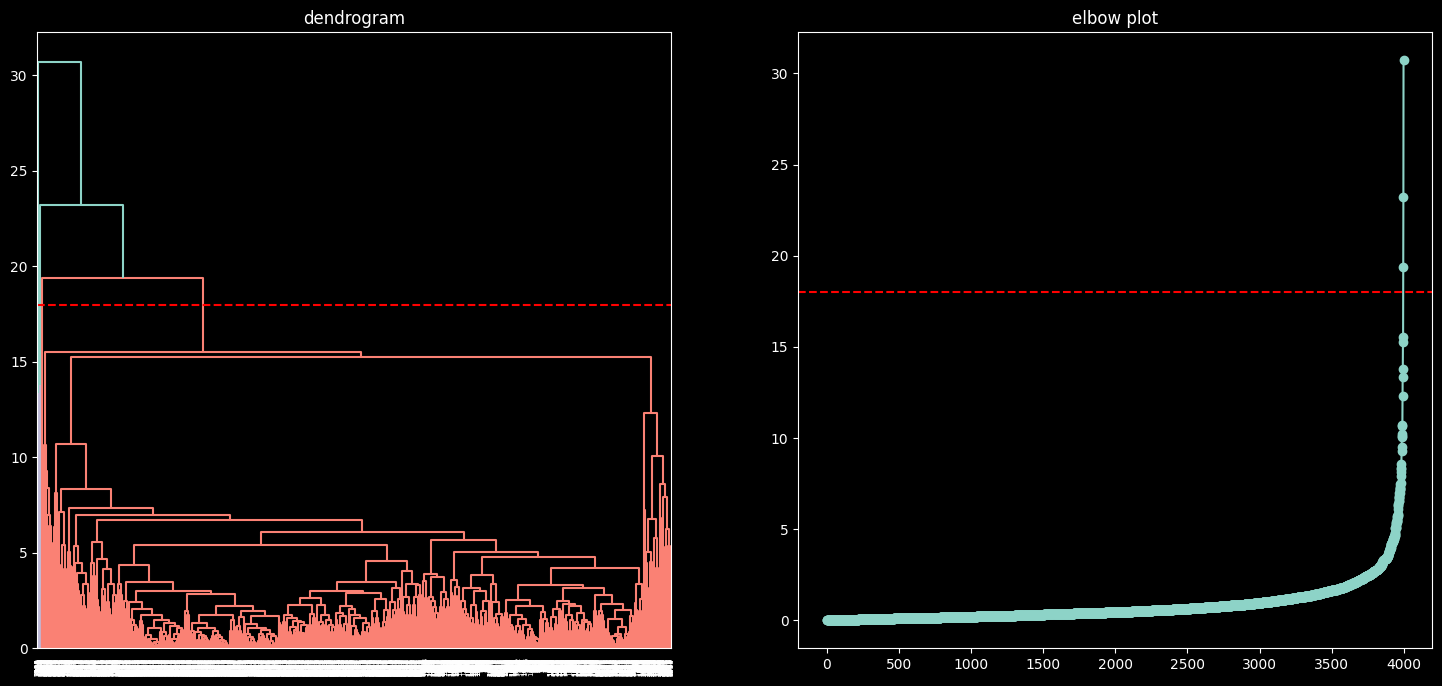

In [ ]:
draw_dn_el(links[1], 18)

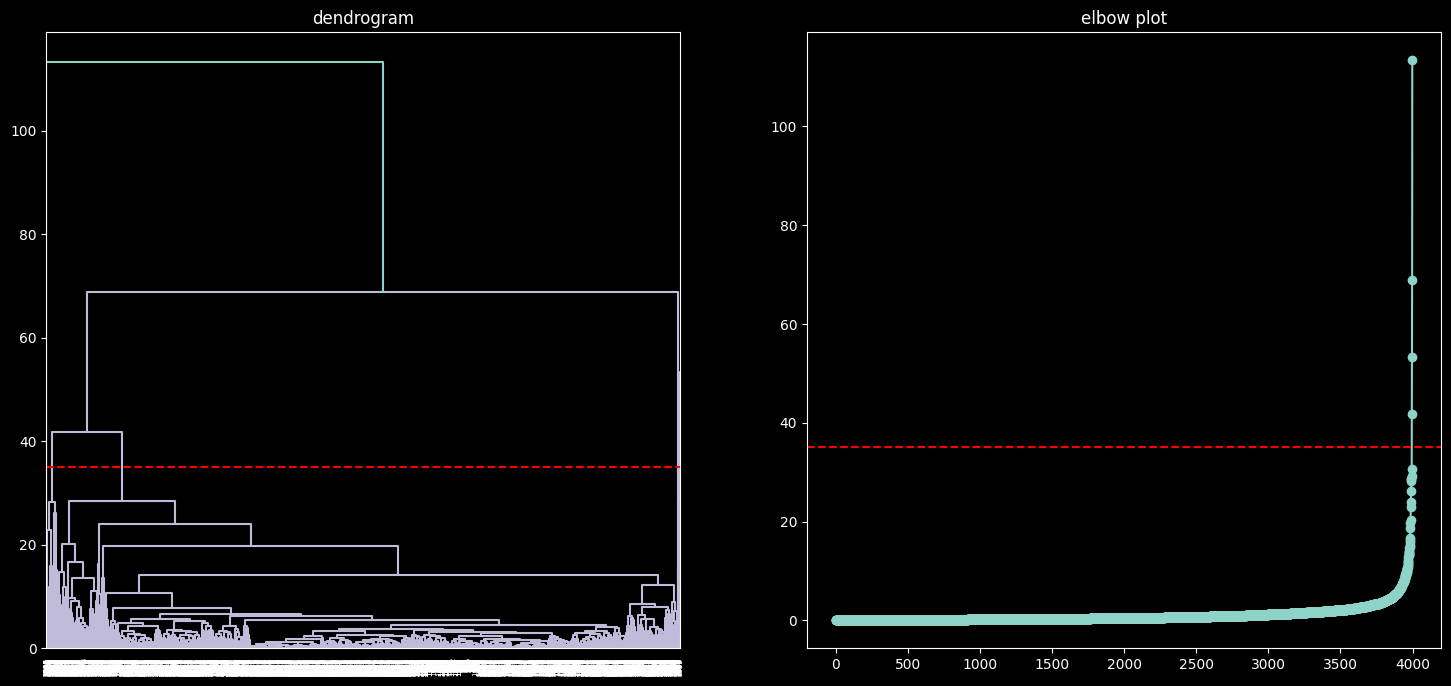

In [ ]:
draw_dn_el(links[2], 35)

In [ ]:
link=links[2]
df_for_clust['cluster']=fcluster(link, 5, criterion='maxclust')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1       2
2      75
3    3905
4       6
5      11
dtype: int64

### C_C clustering

In [48]:
links=lkg(X, 'complete', 'cityblock')

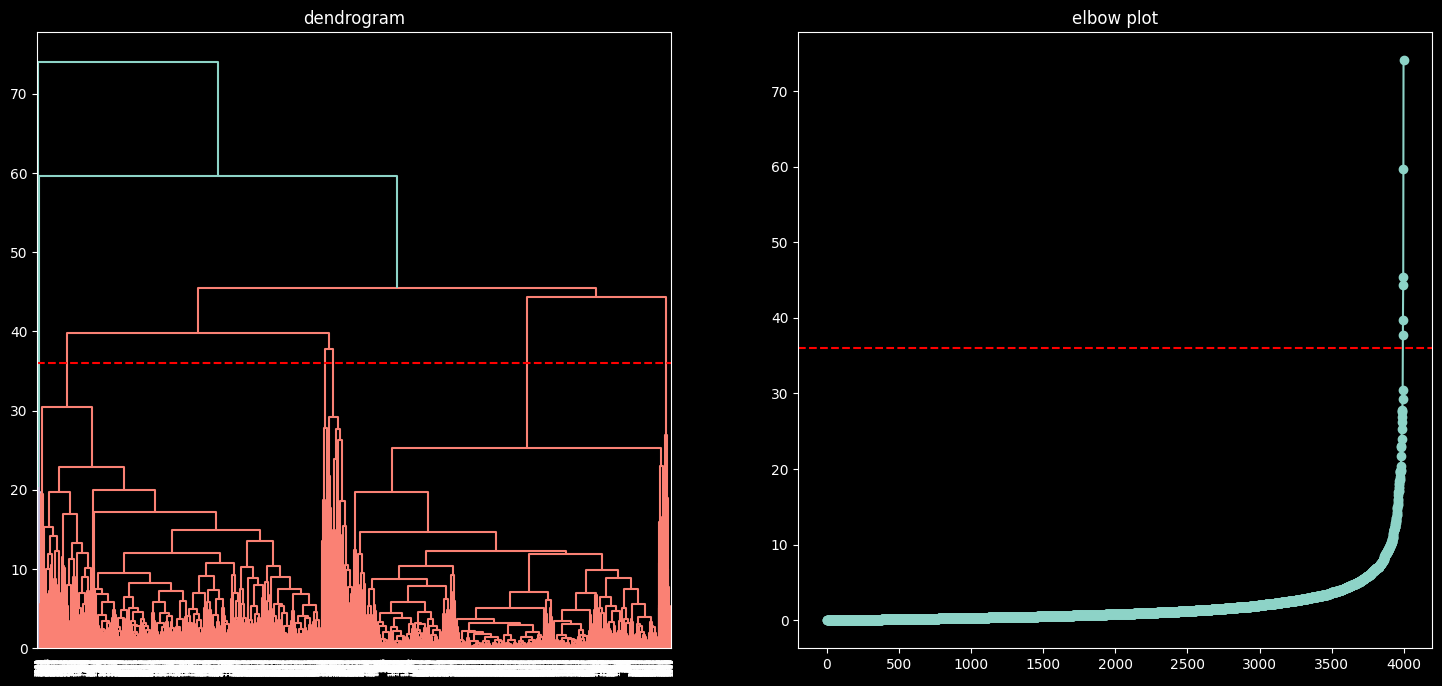

In [49]:
draw_dn_el(links[0], 36)

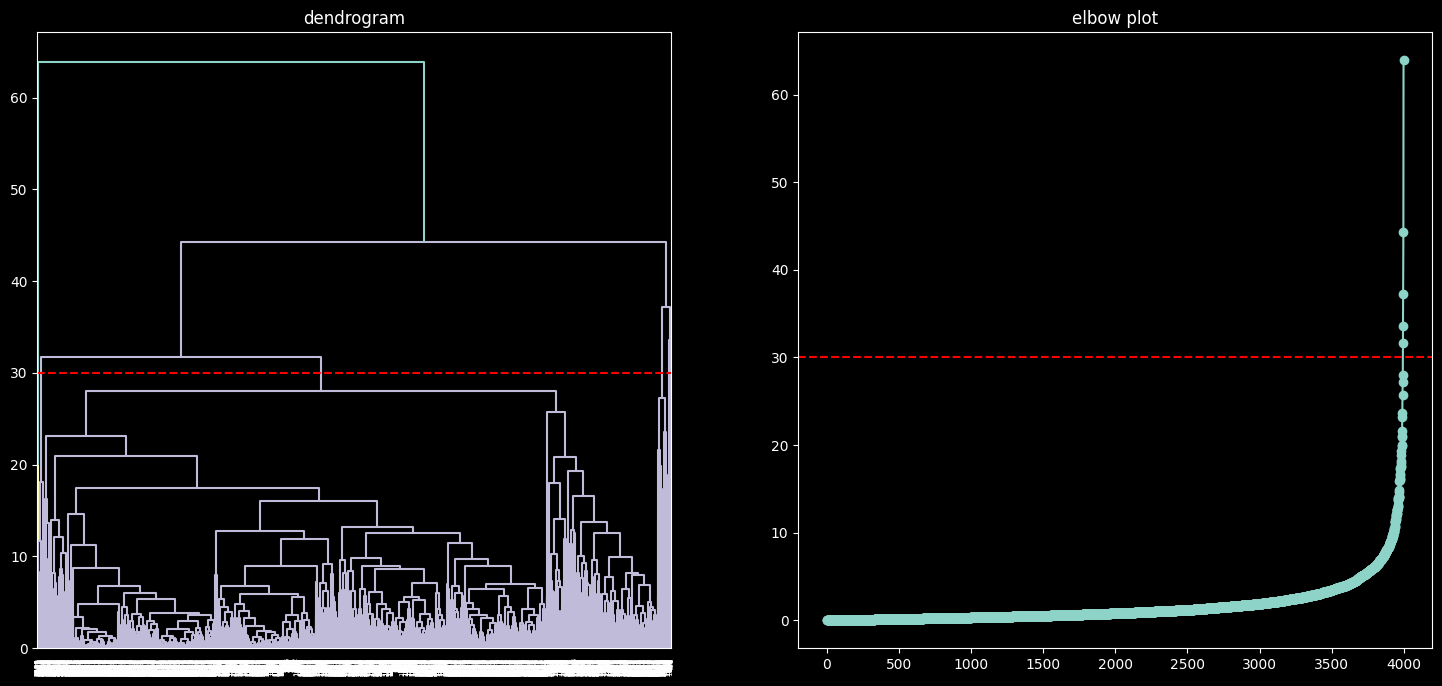

In [ ]:
draw_dn_el(links[1], 30)

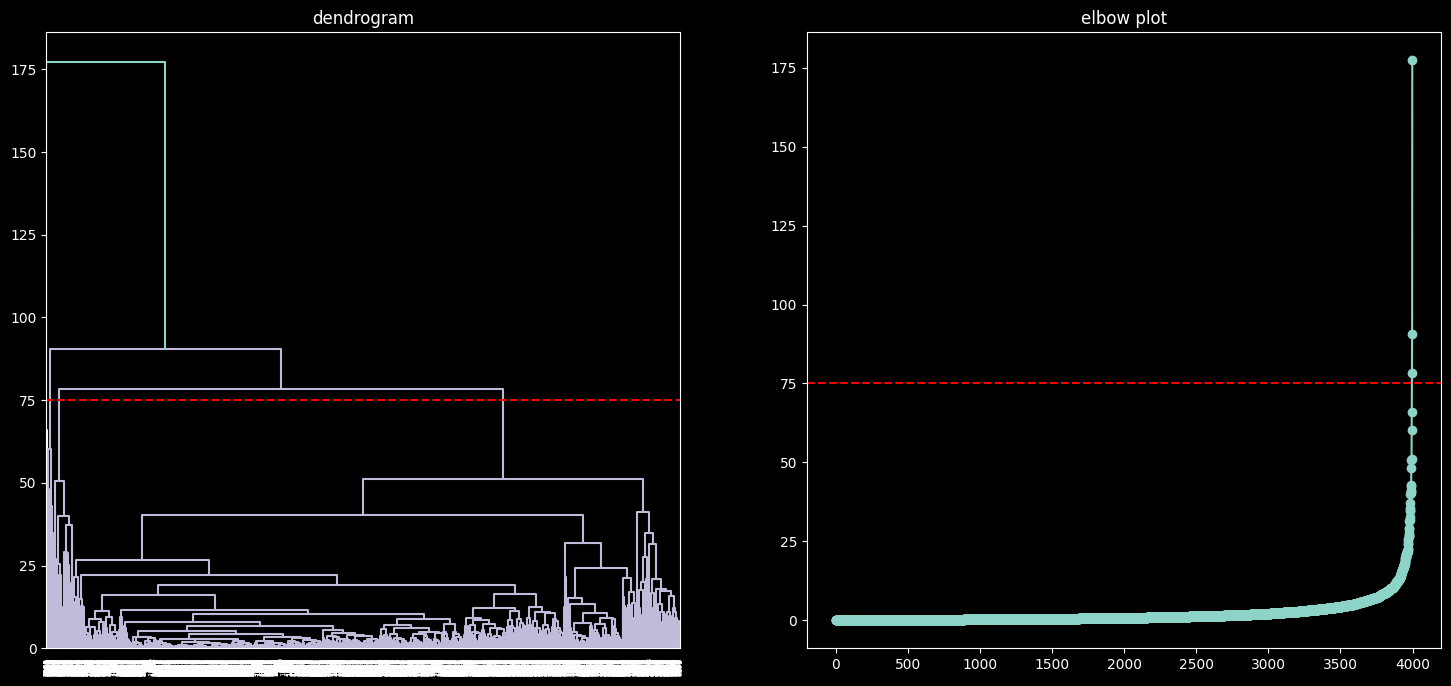

In [ ]:
draw_dn_el(links[2], 75)

In [ ]:
link=links[0]
df_for_clust['cluster']=fcluster(link, 6, criterion='maxclust')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1       4
2      15
3    1776
4     198
5    1963
6      43
dtype: int64

### Conclusion

Among all ways of how to normalize the data and to cluster it I like the result from w_c clustering the most

In [ ]:
df_for_clust['cluster']=fcluster(lkg_w_c(X)[1], 4, criterion='maxclust')
df_for_clust.groupby('cluster').size()

<ipython-input-2-3b3b4c9e741a>:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))


cluster
1     242
2      83
3    1182
4    2492
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                                
1        185230.665289  1101.830579   2.909091   1.020661   1.090909   
2        308647.638554  1728.963855   2.927711   1.036145   1.036145   
3        106121.385787   127.529611   3.066836   1.012690   1.019459   
4         39507.486356     6.190610   1.470305   1.014045   1.000401   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
1        44885.342975    22.516529        2125.500000         6.619835   
2        58179.975904    32.927711        6310.783133        17.879518   
3        31193.662437    16.119289         548.483080         1.573604   
4         6420.601926     7.689005          61.512841         0.219502   

         Days_since_enroll  ...  Balance_n_3  Qual_miles_n_3  cc1_miles_n_3  \
cluster                     ...                                               
1              4704.475207  ...     2.507302             inf       1.454545   
2              5468.722892  ...     4.177887             inf       1.463855   
3              4848.906937  ...     1.436470             inf       1.533418   
4              3670.274478  ...     0.534777             inf       0.735152   

         cc2_miles_n_3  cc3_miles_n_3  Bonus_miles_n_3  Bonus_trans_n_3  \
cluster                                                                   
1                  inf            inf         1.990437         1.608323   
2                  inf            inf         2.579986         2.351979   
3                  inf            inf         1.383280         1.151378   
4                  inf            inf         0.284721         0.549215   

         Flight_miles_12mo_n_3  Flight_trans_12_n_3  Days_since_enroll_n_3  
cluster                                                                     
1                     6.834405             6.619835               1.359478  
2                    20.291907            17.879518               1.580327  
3                     1.763611             1.573604               1.401216  
4                     0.197790             0.219502               1.060620  

[4 rows x 43 columns]

In [ ]:
df_for_clust.groupby('cluster').median()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
cluster                                                                       
1        125424.0         0.0        3.0        1.0        1.0      30475.5   
2        189054.0         0.0        3.0        1.0        1.0      34318.0   
3         86279.0         0.0        4.0        1.0        1.0      29964.0   
4         28135.0         0.0        1.0        1.0        1.0       2750.0   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
cluster                                                                       
1               21.5             1781.0              6.0             4923.0   
2               32.0             5500.0             17.0             6234.0   
3               16.0              100.0              1.0             4973.0   
4                6.0                0.0              0.0             3528.0   

         ...  Balance_n_3  Qual_miles_n_3  cc1_miles_n_3  cc2_miles_n_3  \
cluster  ...                                                              
1        ...     1.697752             inf            1.5            inf   
2        ...     2.559055             inf            1.5            inf   
3        ...     1.167882             inf            2.0            inf   
4        ...     0.380838             inf            0.5            inf   

         cc3_miles_n_3  Bonus_miles_n_3  Bonus_trans_n_3  \
cluster                                                    
1                  inf         1.351433         1.535714   
2                  inf         1.521829         2.285714   
3                  inf         1.328751         1.142857   
4                  inf         0.121949         0.428571   

         Flight_miles_12mo_n_3  Flight_trans_12_n_3  Days_since_enroll_n_3  
cluster                                                                     
1                     5.726688                  6.0               1.422627  
2                    17.684887                 17.0               1.801474  
3                     0.321543                  1.0               1.437076  
4                     0.000000                  0.0               1.019506  

[4 rows x 43 columns]

So we have taken 4 clusters of passengers and interpretation is very easy: the ones who fly the most with next clusters showing gradual decrease in flying frequency. Cluster 2 is at the top(that's the reason why it contains the lowest number of persons in it), Cluster 1 is second, than Cluster 3, and than Cluster 4. It will be a good idea if we modify numbers of clusters.

In [ ]:
df['cluster']=fcluster(lkg_w_c(X)[1], 4, criterion='maxclust')
df['cluster']=df['cluster'].map({1: 2, 2: 1, 3: 3, 4: 4})

<ipython-input-2-3b3b4c9e741a>:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))


## DF_3

In [50]:
! gdown --id 1C8qlG3-ceCzLeRBh5rJmZMxaQxUbArQB

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1C8qlG3-ceCzLeRBh5rJmZMxaQxUbArQB
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 19.8MB/s]


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [51]:
df=pd.read_csv('/content/Country-data.csv', index_col='country')
df

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  
...                         ...        ...    ...  
Vanuatu                    63.0       3.50   2970  
Venezuela                  75.4       2.47  13500  
Vietnam                    73.1       1.95   1310  
Yemen                      67.5       4.67   1310  
Zambia                     52.0       5.40   1460  

[167 rows x 9 columns]

In [ ]:
df.describe(include='all')

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [52]:
df_for_clust=df.copy()
cols=df_for_clust.columns
df_for_clust[['child_mort_n_1',
              'exports_n_1',
              'health_n_1',
              'imports_n_1',
              'income_n_1',
              'inflation_n_1',
              'life_expec_n_1',
              'total_fer_n_1',
              'gdpp_n_1']]=df_for_clust[cols].apply(lambda x: x/x.std())
df_for_clust[['child_mort_n_2',
              'exports_n_2',
              'health_n_2',
              'imports_n_2',
              'income_n_2',
              'inflation_n_2',
              'life_expec_n_2',
              'total_fer_n_2',
              'gdpp_n_2']]=df_for_clust[cols].apply(lambda x: x/(x.max()-x.min()))
df_for_clust[['child_mort_n_3',
              'exports_n_3',
              'health_n_3',
              'imports_n_3',
              'income_n_3',
              'inflation_n_3',
              'life_expec_n_3',
              'total_fer_n_3',
              'gdpp_n_3']]=df_for_clust[cols].apply(lambda x: x/(x.quantile(0.75)-x.quantile(0.25)))
df_for_clust[['child_mort_n_4',
              'exports_n_4',
              'health_n_4',
              'imports_n_4',
              'income_n_4',
              'inflation_n_4',
              'life_expec_n_4',
              'total_fer_n_4',
              'gdpp_n_4']]=df_for_clust[cols].apply(lambda x: x/(x.quantile(0.975)-x.quantile(0.025)))

In [53]:
d_all=df_for_clust.describe(include='all').T.reset_index()
d_all[d_all['max']==float('inf')]

Empty DataFrame
Columns: [index, count, mean, std, min, 25%, 50%, 75%, max]
Index: []

Again we normalize our data like we did in DF_2, but now add new way to normalize the data -- n_4. In trimmed mean we have a deal with a data which value is between quantile(0.025) and quantile(0.975), so I want to see what happens if we normalize our data on distance between quantile(0.025) and quantile(0.975).

In [54]:
X=[]
X.append(df_for_clust[['child_mort_n_1',
              'exports_n_1',
              'health_n_1',
              'imports_n_1',
              'income_n_1',
              'inflation_n_1',
              'life_expec_n_1',
              'total_fer_n_1',
              'gdpp_n_1']])
X.append(df_for_clust[['child_mort_n_2',
              'exports_n_2',
              'health_n_2',
              'imports_n_2',
              'income_n_2',
              'inflation_n_2',
              'life_expec_n_2',
              'total_fer_n_2',
              'gdpp_n_2']])
X.append(df_for_clust[['child_mort_n_3',
              'exports_n_3',
              'health_n_3',
              'imports_n_3',
              'income_n_3',
              'inflation_n_3',
              'life_expec_n_3',
              'total_fer_n_3',
              'gdpp_n_3']])
X.append(df_for_clust[['child_mort_n_4',
              'exports_n_4',
              'health_n_4',
              'imports_n_4',
              'income_n_4',
              'inflation_n_4',
              'life_expec_n_4',
              'total_fer_n_4',
              'gdpp_n_4']])

### W_E clustering

In [55]:
links=lkg(X, 'ward', 'euclidean')

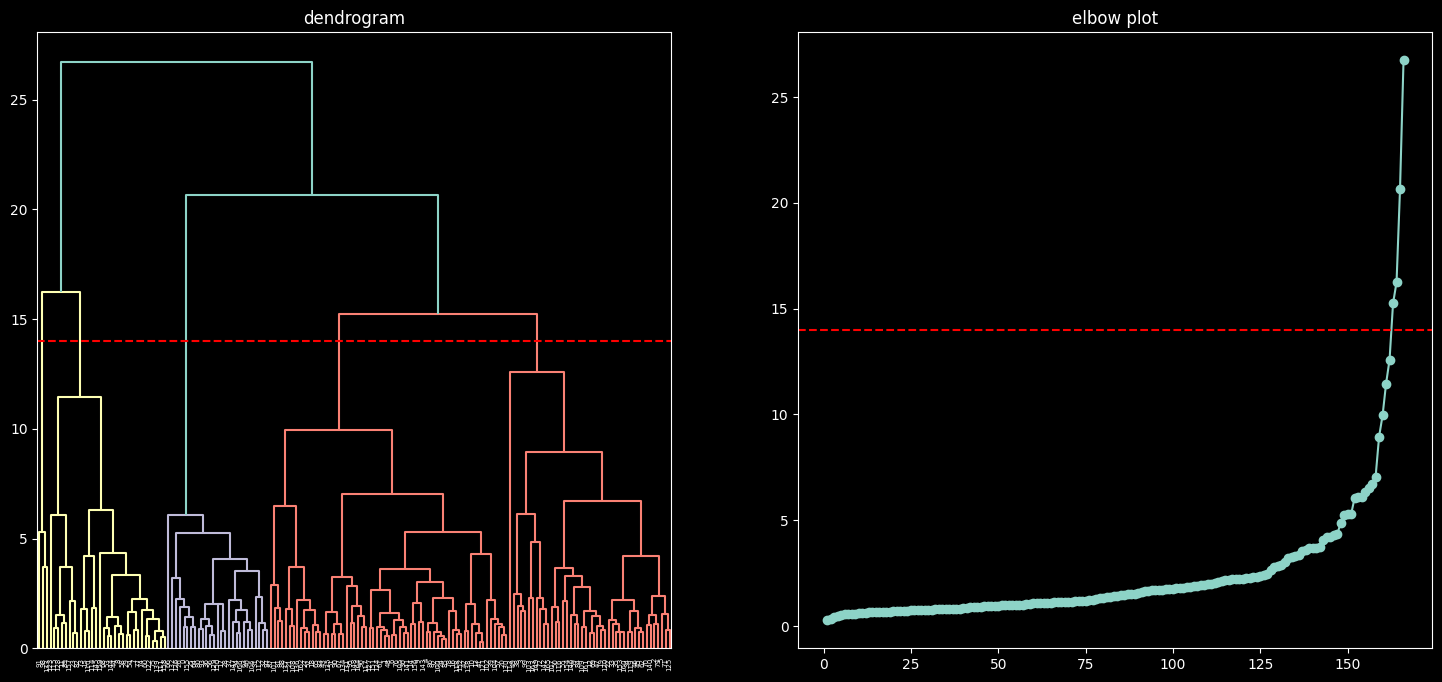

In [56]:
draw_dn_el(links[0], 14)

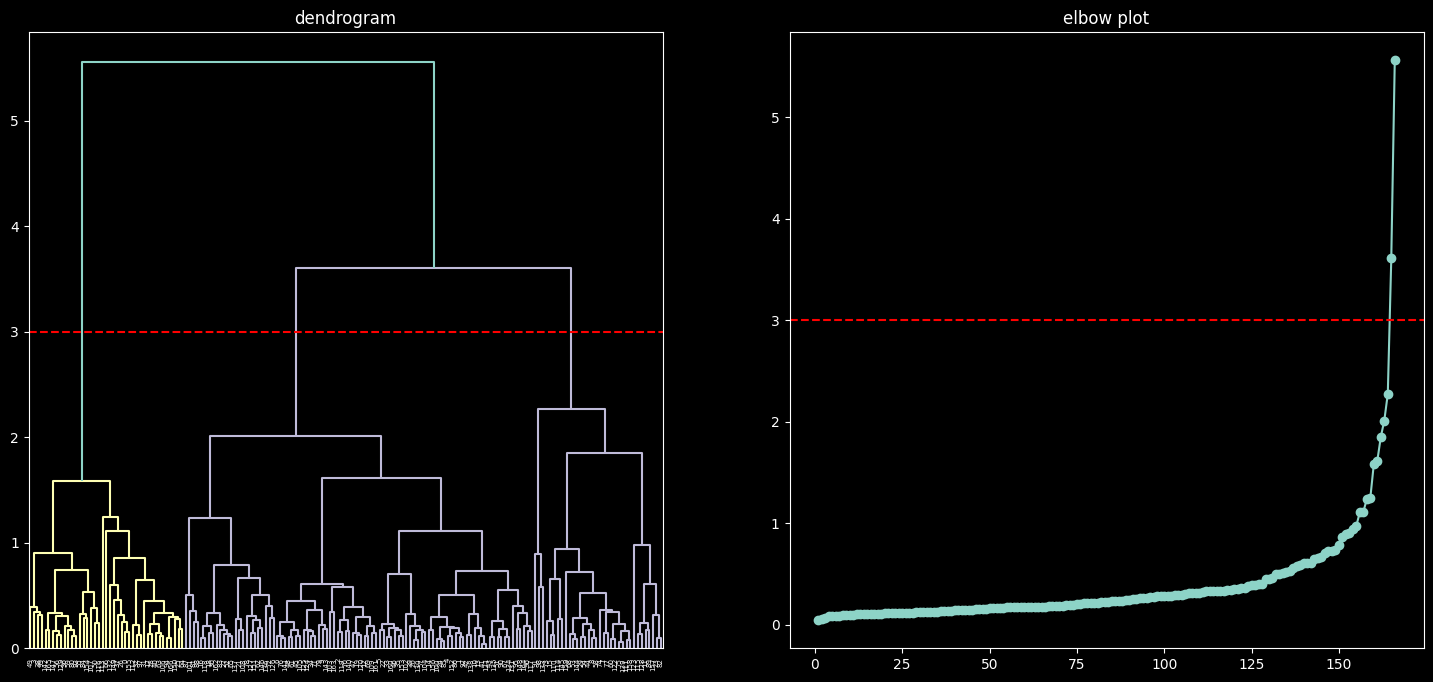

In [57]:
draw_dn_el(links[1], 3)

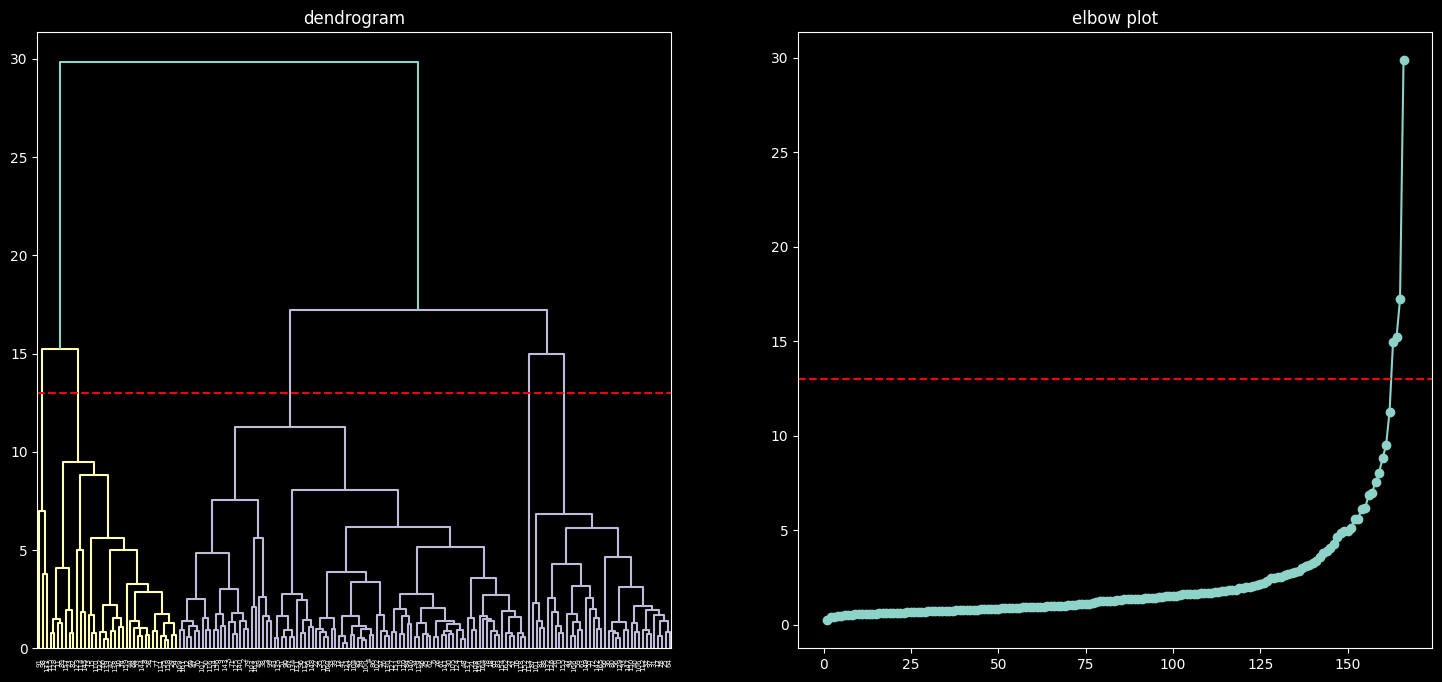

In [ ]:
draw_dn_el(links[2], 13)

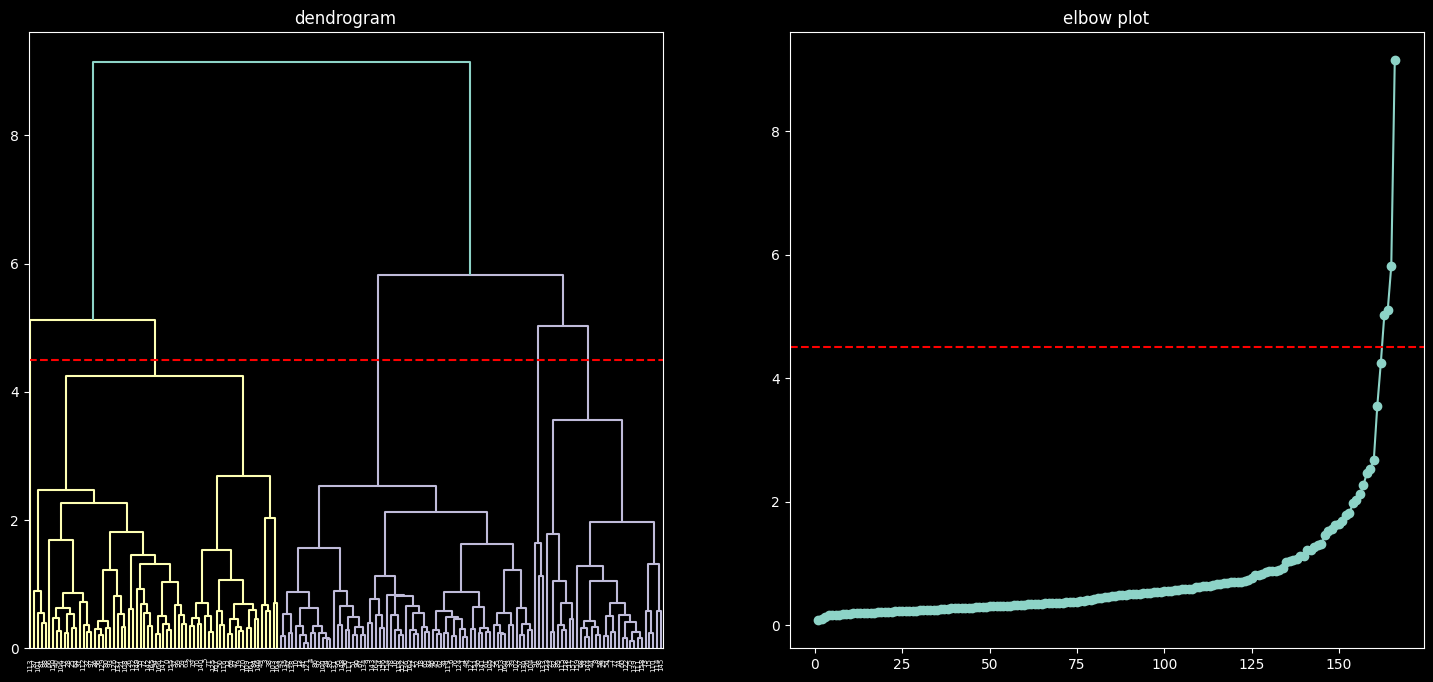

In [ ]:
draw_dn_el(links[3], 4.5)

In [ ]:
df_for_clust['cluster']=fcluster(links[2], 13, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1     3
2    34
3    92
4    37
5     1
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

child_mort     exports    health     imports        income  \
cluster                                                               
1          4.133333  176.000000  6.793333  156.666667  64033.333333   
2          6.229412   46.938235  8.513235   39.414706  44502.941176   
3         27.580435   41.361728  6.103043   47.820282  11531.304348   
4         94.581081   24.614054  7.076757   43.343243   2484.675676   
5        130.000000   25.300000  5.070000   17.400000   5150.000000   

          inflation  life_expec  total_fer          gdpp  child_mort_n_1  ...  \
cluster                                                                   ...   
1          2.468000   81.433333   1.380000  57566.666667        0.102491  ...   
2          4.038235   79.673529   1.899412  40470.588235        0.154465  ...   
3          7.864859   71.660870   2.464457   6186.456522        0.683887  ...   
4          8.845811   58.818919   5.162703   1211.621622        2.345241  ...   
5        104.000000   60.500000   5.840000   2330.000000        3.223492  ...   

         gdpp_n_3  child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
cluster                                                                   
1        4.525681        0.031096     2.117370    0.725125     1.874900   
2        3.181650        0.046866     0.564691    0.908708     0.471693   
3        0.486357        0.207497     0.497603    0.651443     0.572287   
4        0.095253        0.711564     0.296120    0.755378     0.518708   
5        0.183176        0.978032     0.304372    0.541175     0.208234   

         income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  gdpp_n_4  
cluster                                                                      
1          0.918205       0.096159        2.836904       0.279465  1.015036  
2          0.638149       0.157339        2.775598       0.384652  0.713592  
3          0.165353       0.306434        2.496459       0.499080  0.109082  
4          0.035629       0.344654        2.049083       1.045505  0.021364  
5          0.073848       4.052093        2.107647       1.182665  0.041083  

[5 rows x 45 columns]

In [ ]:
df_for_clust[df_for_clust['cluster']==5]

child_mort  exports  health  imports  income  inflation  life_expec  \
country                                                                        
Nigeria       130.0     25.3    5.07     17.4    5150      104.0        60.5   

         total_fer  gdpp  child_mort_n_1  ...  child_mort_n_4  exports_n_4  \
country                                   ...                                
Nigeria       5.84  2330        3.223492  ...        0.978032     0.304372   

         health_n_4  imports_n_4  income_n_4  inflation_n_4  life_expec_n_4  \
country                                                                       
Nigeria    0.541175     0.208234    0.073848       4.052093        2.107647   

         total_fer_n_4  gdpp_n_4  cluster  
country                                    
Nigeria       1.182665  0.041083        5  

[1 rows x 46 columns]

In [ ]:
df_for_clust[df_for_clust.index=='Spain']

child_mort  exports  health  imports  income  inflation  life_expec  \
country                                                                        
Spain           3.8     25.5    9.54     26.8   32500       0.16        81.9   

         total_fer   gdpp  child_mort_n_1  ...  child_mort_n_4  exports_n_4  \
country                                    ...                                
Spain         1.37  30700        0.094225  ...        0.028589     0.306778   

         health_n_4  imports_n_4  income_n_4  inflation_n_4  life_expec_n_4  \
country                                                                       
Spain      1.018306     0.320728    0.466033       0.006234        2.853161   

         total_fer_n_4  gdpp_n_4  cluster  
country                                    
Spain          0.27744  0.541314        2  

[1 rows x 46 columns]

### W_C clustering

In [58]:
links=lkg_w_c(X)

<ipython-input-2-0ead550951f2>:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))


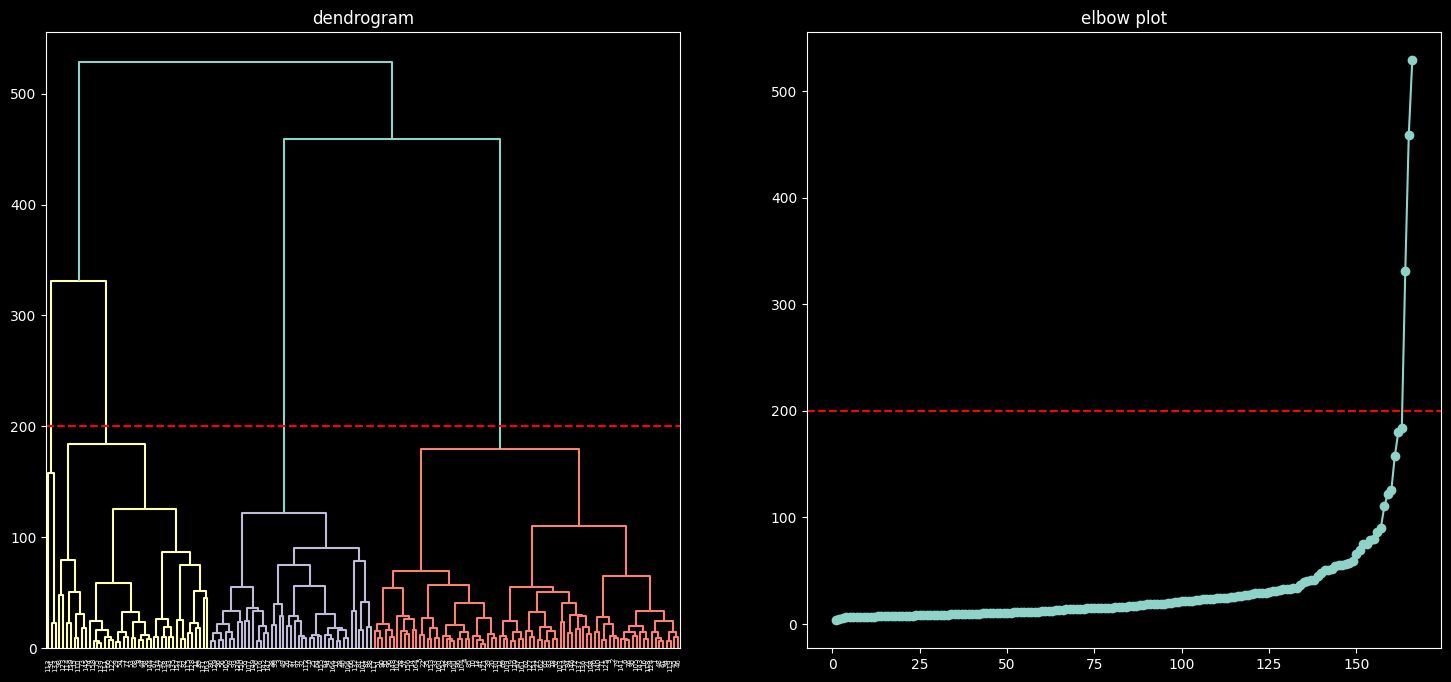

In [59]:
draw_dn_el(links[0], 200)

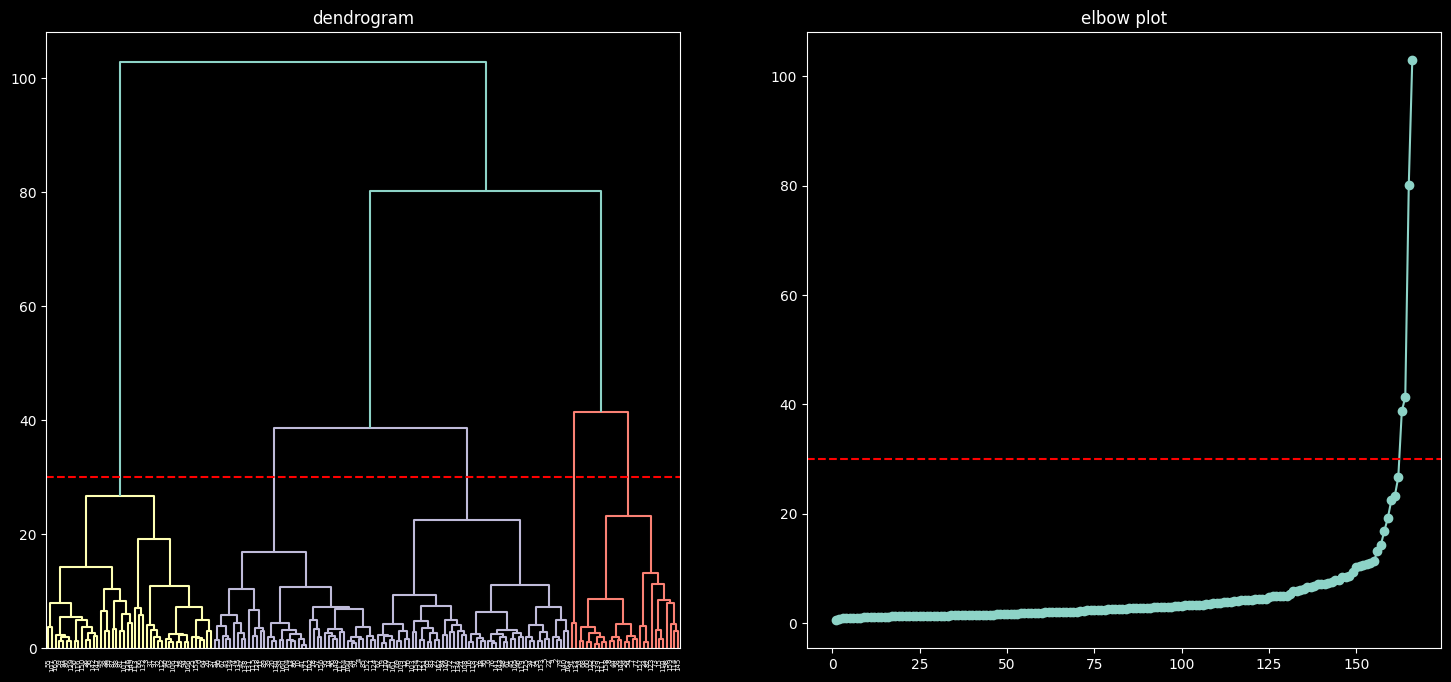

In [ ]:
draw_dn_el(links[1], 30)

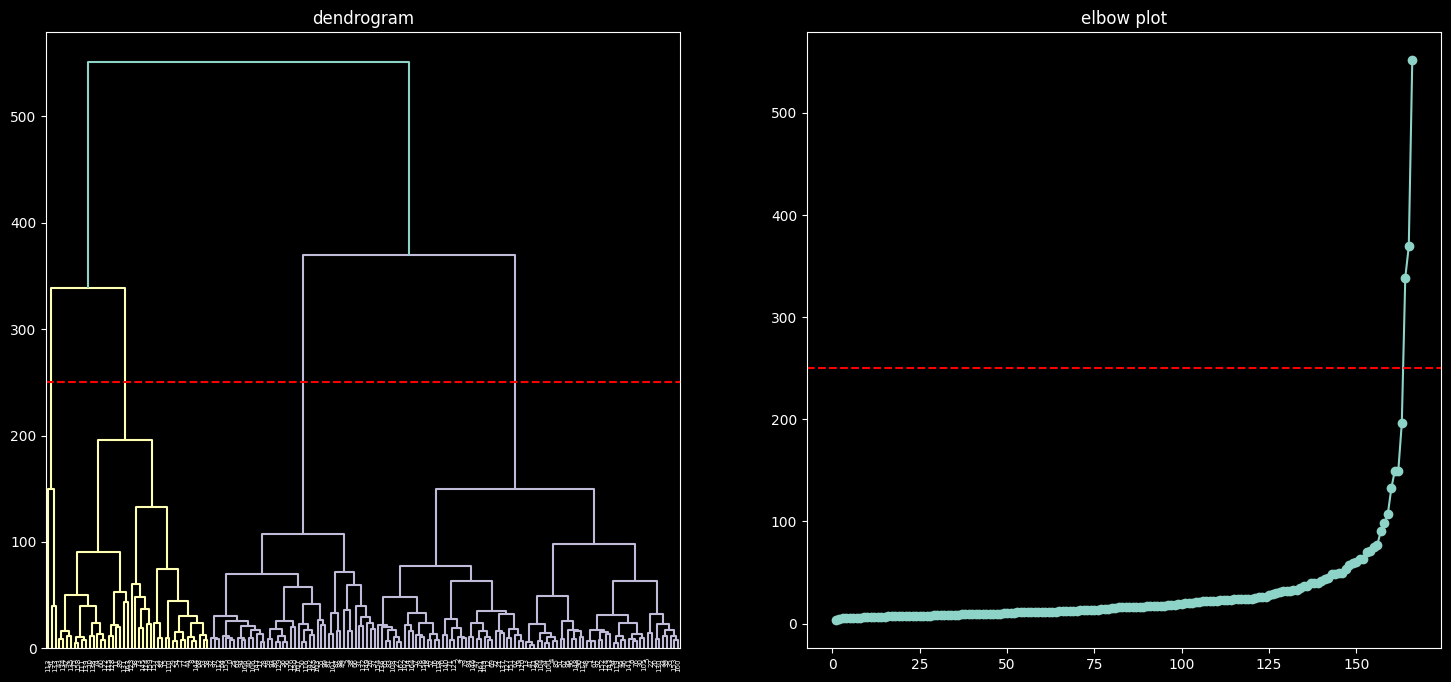

In [ ]:
draw_dn_el(links[2], 250)

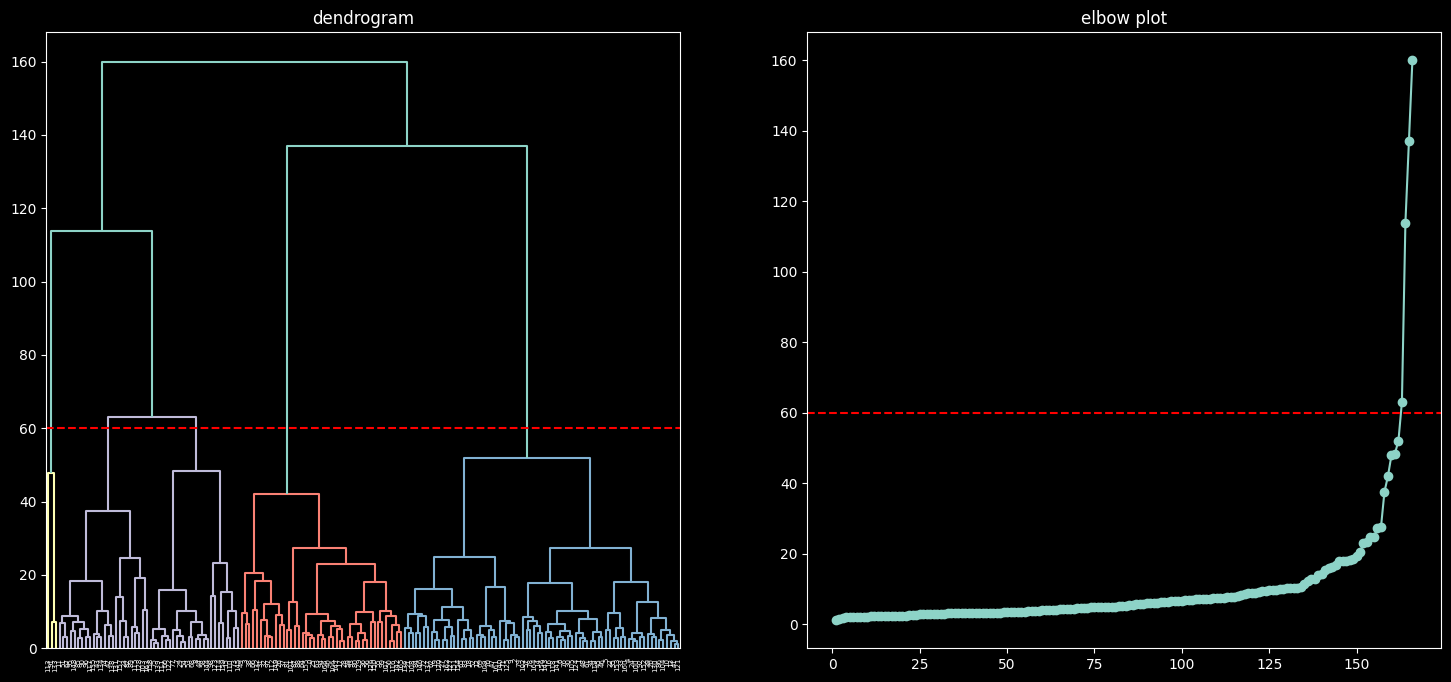

In [ ]:
draw_dn_el(links[3], 60)

In [ ]:
df_for_clust['cluster']=fcluster(links[1], 30, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    44
2    43
3    51
4     2
5    27
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

child_mort     exports    health     imports        income  \
cluster                                                               
1         95.354545   27.248159  6.352955   41.987861   3225.295455   
2         10.718605   52.044186  7.115581   56.179070  19385.348837   
3         31.158824   33.813333  5.631765   41.272549   9032.941176   
4          2.800000  187.500000  5.865000  158.000000  81900.000000   
5          5.181481   49.218519  9.398889   42.466667  46785.185185   

         inflation  life_expec  total_fer         gdpp  child_mort_n_1  ...  \
cluster                                                                 ...   
1        12.071250   59.386364   5.101591   1585.00000        2.364420  ...   
2         4.555884   75.769767   1.850930  11653.72093        0.265780  ...   
3         9.584529   70.137255   2.696078   4477.72549        0.772617  ...   
4         1.787000   82.000000   1.390000  75800.00000        0.069429  ...   
5         2.968259   80.396296   1.776667  44970.37037        0.128481  ...   

         gdpp_n_3  child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
cluster                                                                   
1        0.124607        0.717383     0.327809    0.678119     0.502488   
2        0.916173        0.080640     0.626118    0.759522     0.672320   
3        0.352022        0.234418     0.406792    0.601138     0.493927   
4        5.959119        0.021065     2.255721    0.626034     1.890857   
5        3.535406        0.038982     0.592124    1.003244     0.508218   

         income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  gdpp_n_4  
cluster                                                                      
1          0.046249       0.470325        2.068851       1.033129  0.027947  
2          0.277976       0.177508        2.639602       0.374834  0.205483  
3          0.129528       0.373437        2.443381       0.545986  0.078953  
4          1.174404       0.069626        2.856645       0.281490  1.336533  
5          0.670876       0.115651        2.800777       0.359795  0.792934  

[5 rows x 45 columns]

In [ ]:
df_for_clust[df_for_clust['cluster']==1].head()

child_mort  exports  health  imports  income  inflation  \
country                                                                 
Afghanistan         90.2    10.00    7.58     44.9    1610      9.440   
Angola             119.0    62.30    2.85     42.9    5900     22.400   
Benin              111.0    23.80    4.10     37.2    1820      0.885   
Burkina Faso       116.0    19.20    6.74     29.6    1430      6.810   
Burundi             93.6     8.92   11.60     39.2     764     12.300   

              life_expec  total_fer  gdpp  child_mort_n_1  ...  \
country                                                    ...   
Afghanistan         56.2       5.82   553        2.236608  ...   
Angola              60.1       6.16  3530        2.950735  ...   
Benin               61.8       5.36   758        2.752367  ...   
Burkina Faso        57.9       5.87   575        2.876347  ...   
Burundi             57.7       6.26   231        2.320914  ...   

              child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
country                                                              
Afghanistan         0.678604     0.120305    0.809094     0.537338   
Angola              0.895275     0.749501    0.304211     0.513404   
Benin               0.835089     0.286326    0.437637     0.445189   
Burkina Faso        0.872705     0.230986    0.719432     0.354236   
Burundi             0.704183     0.107312    1.238192     0.469124   

              income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  \
country                                                                  
Afghanistan     0.023087       0.367805        1.957847       1.178615   
Angola          0.084603       0.872758        2.093712       1.247469   
Benin           0.026098       0.034482        2.152935       1.085460   
Burkina Faso    0.020505       0.265334        2.017070       1.188740   
Burundi         0.010955       0.479238        2.010103       1.267720   

              gdpp_n_4  cluster  
country                          
Afghanistan   0.009751        1  
Angola        0.062242        1  
Benin         0.013365        1  
Burkina Faso  0.010139        1  
Burundi       0.004073        1  

[5 rows x 46 columns]

In [ ]:
df_for_clust[df_for_clust.index=='Nigeria']['cluster']

country
Nigeria    1
Name: cluster, dtype: int32

In [ ]:
df_for_clust[df_for_clust['cluster']==4]

child_mort  exports  health  imports  income  inflation  \
country                                                               
Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
Singapore          2.8    200.0    3.96    174.0   72100     -0.046   

            life_expec  total_fer    gdpp  child_mort_n_1  ...  \
country                                                    ...   
Luxembourg        81.3       1.63  105000        0.069429  ...   
Singapore         82.7       1.15   46600        0.069429  ...   

            child_mort_n_4  exports_n_4  health_n_4  imports_n_4  income_n_4  \
country                                                                        
Luxembourg        0.021065     2.105339    0.829375     1.699378    1.314931   
Singapore         0.021065     2.406102    0.422693     2.082336    1.033877   

            inflation_n_4  life_expec_n_4  total_fer_n_4  gdpp_n_4  cluster  
country                                                                      
Luxembourg       0.141044        2.832259       0.330093  1.851398        4  
Singapore       -0.001792        2.881031       0.232888  0.821668        4  

[2 rows x 46 columns]

### S_E clustering

In [60]:
links=lkg(X, 'single', 'euclidean')

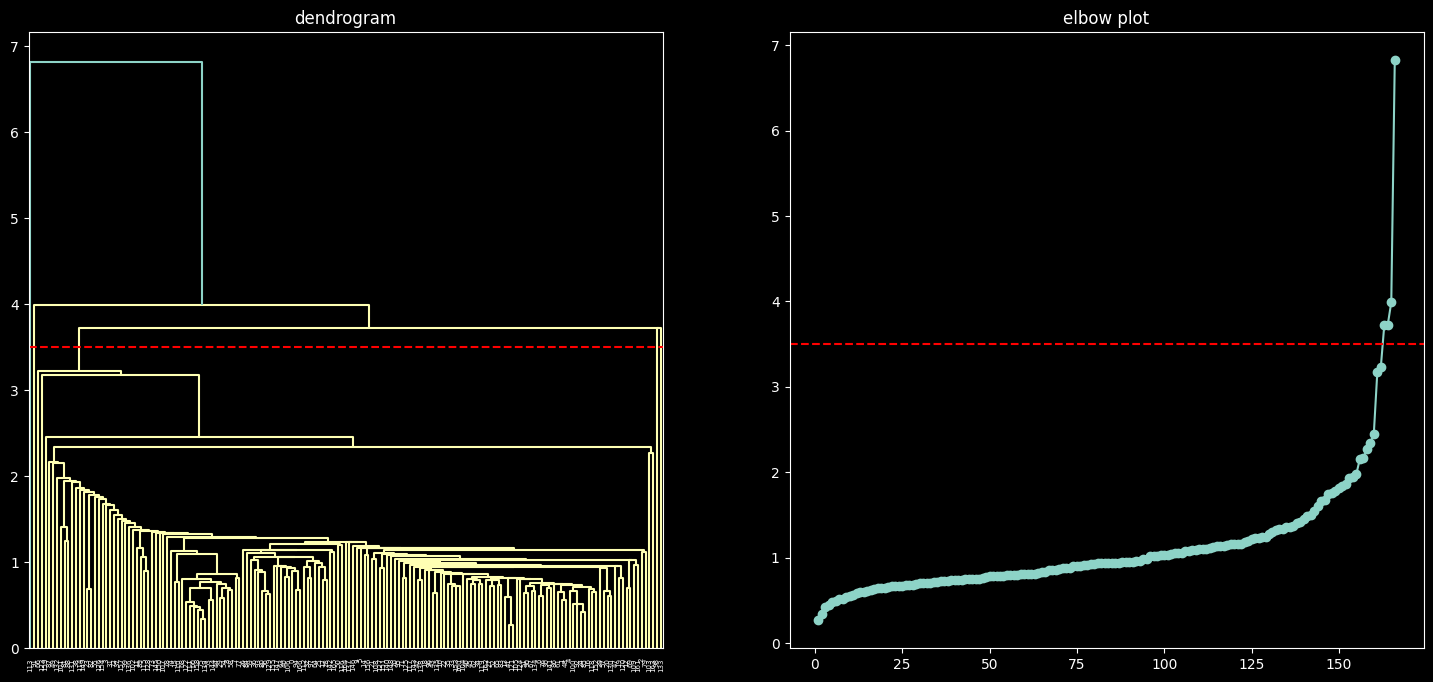

In [61]:
draw_dn_el(links[0], 3.5)

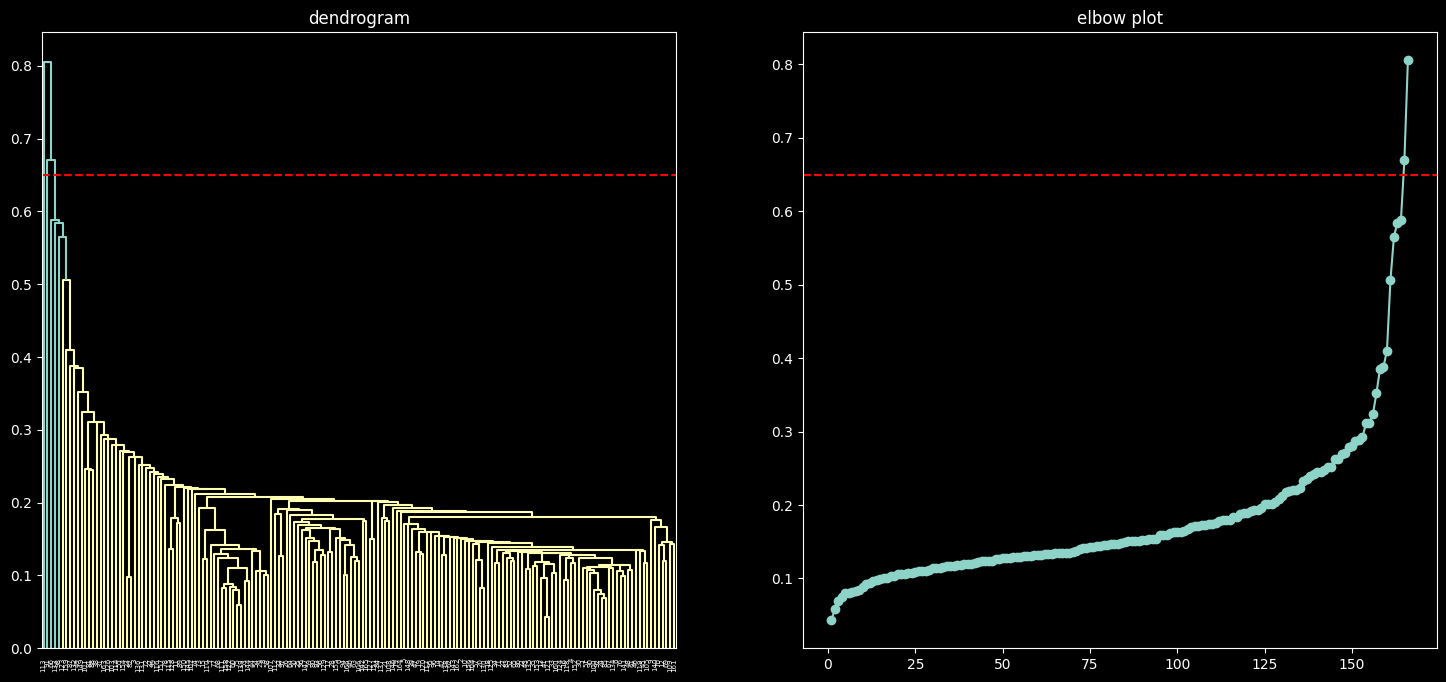

In [ ]:
draw_dn_el(links[1], 0.65)

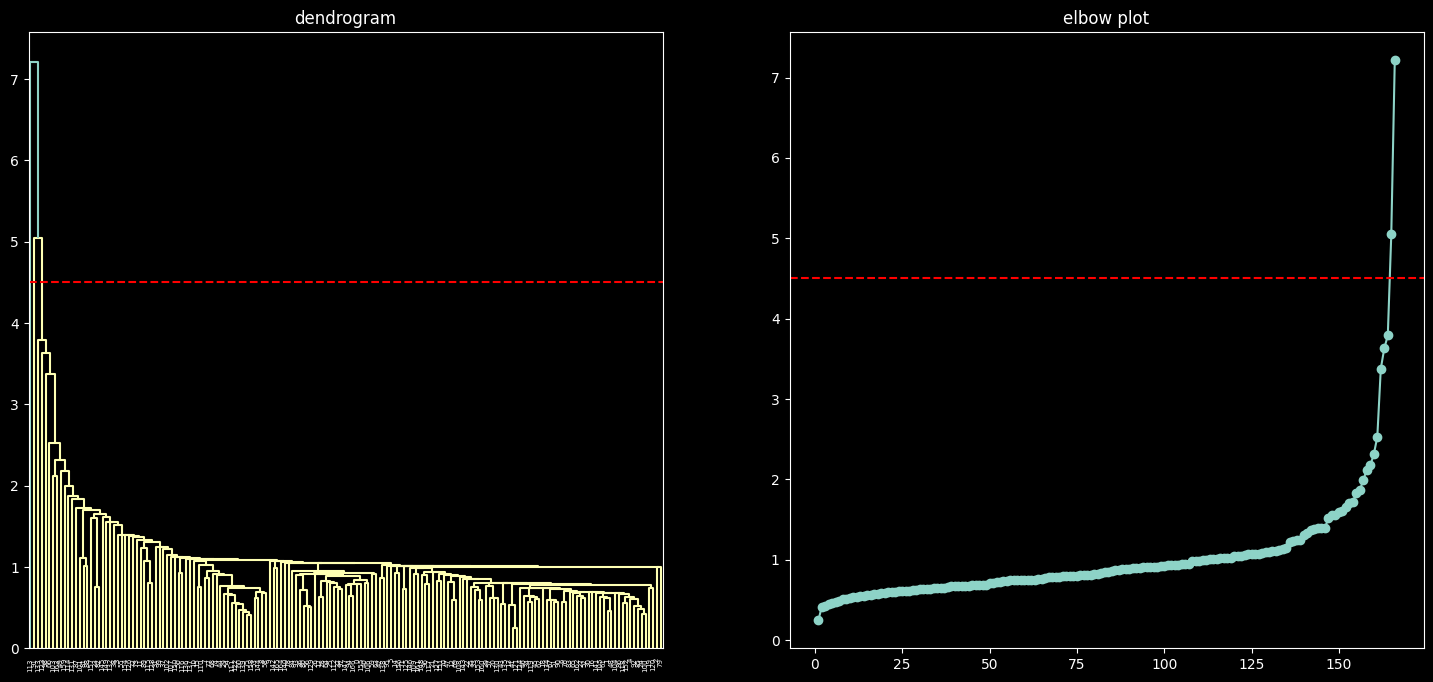

In [ ]:
draw_dn_el(links[2], 4.5)

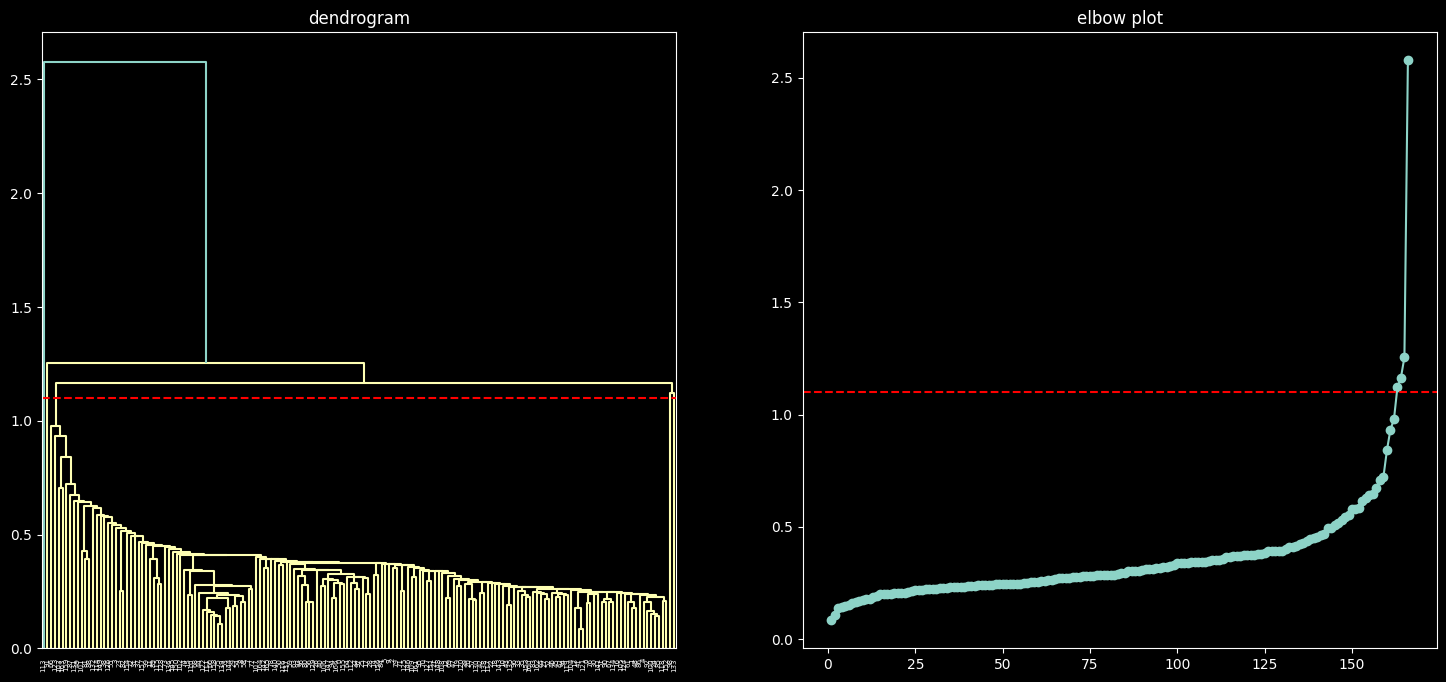

In [ ]:
draw_dn_el(links[3], 1.1)

In [ ]:
df_for_clust['cluster']=fcluster(links[2], 3, criterion='maxclust')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    165
2      1
3      1
dtype: int64

### S_C clustering

In [62]:
links=lkg(X, 'single', 'cityblock')

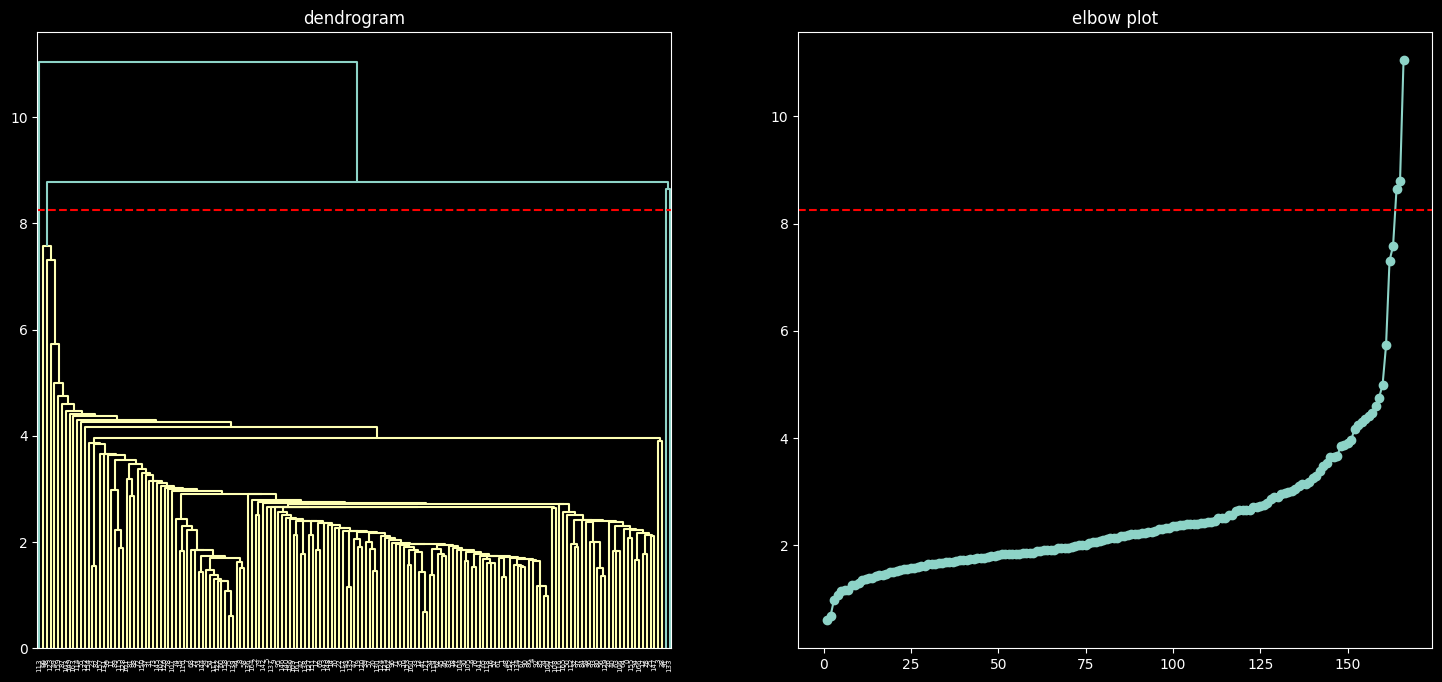

In [63]:
draw_dn_el(links[0], 8.25)

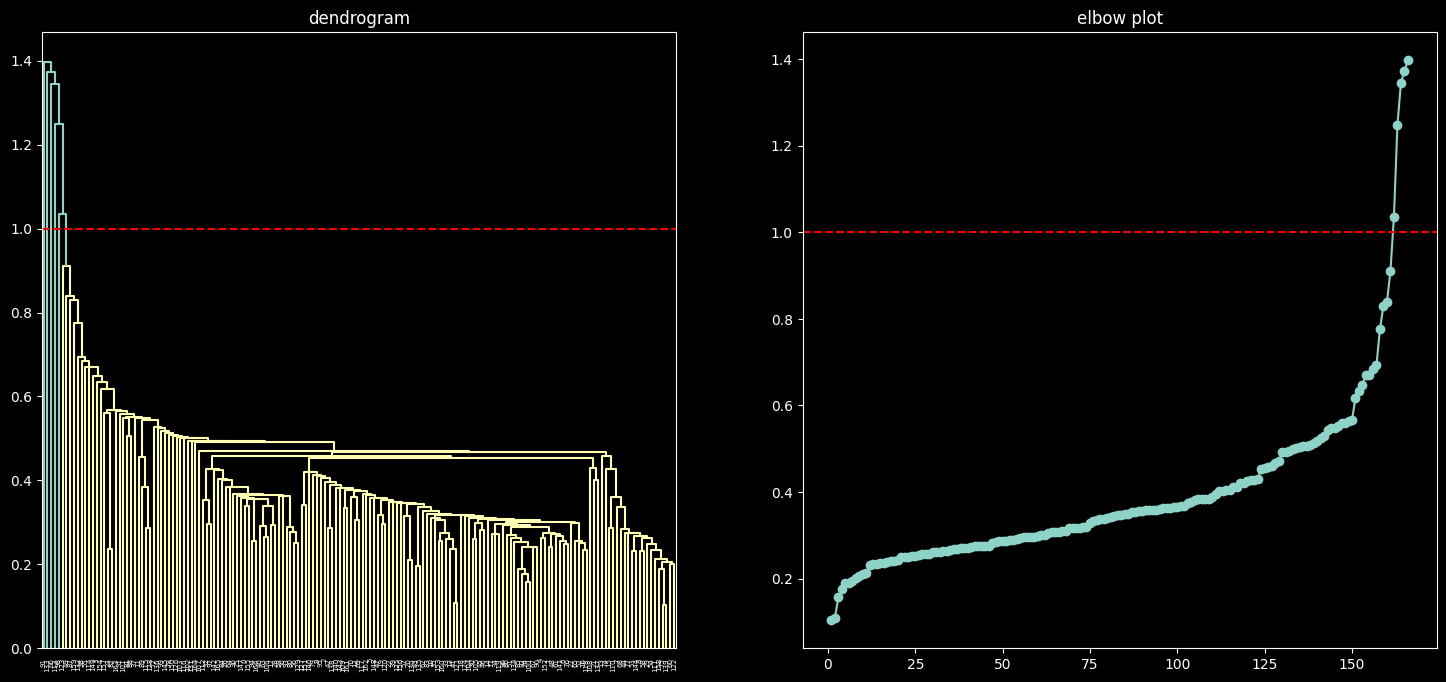

In [ ]:
draw_dn_el(links[1], 1)

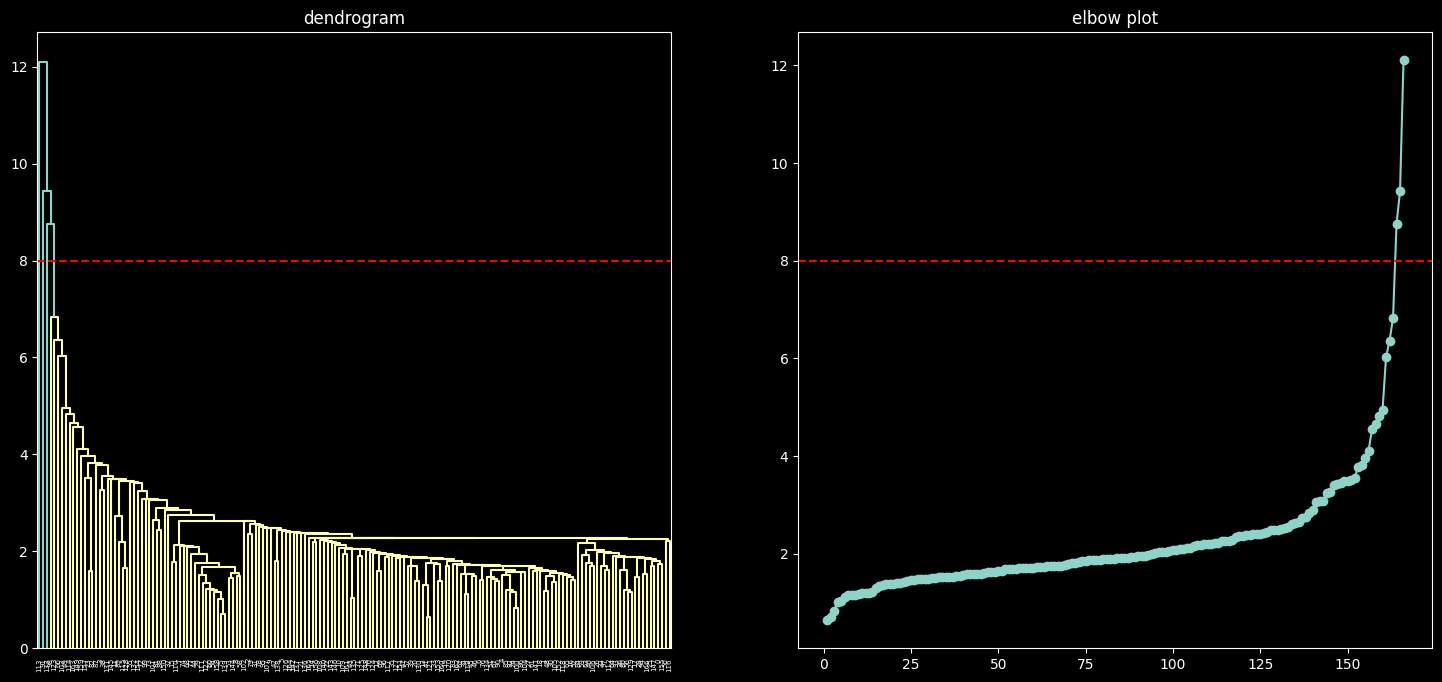

In [ ]:
draw_dn_el(links[2], 8)

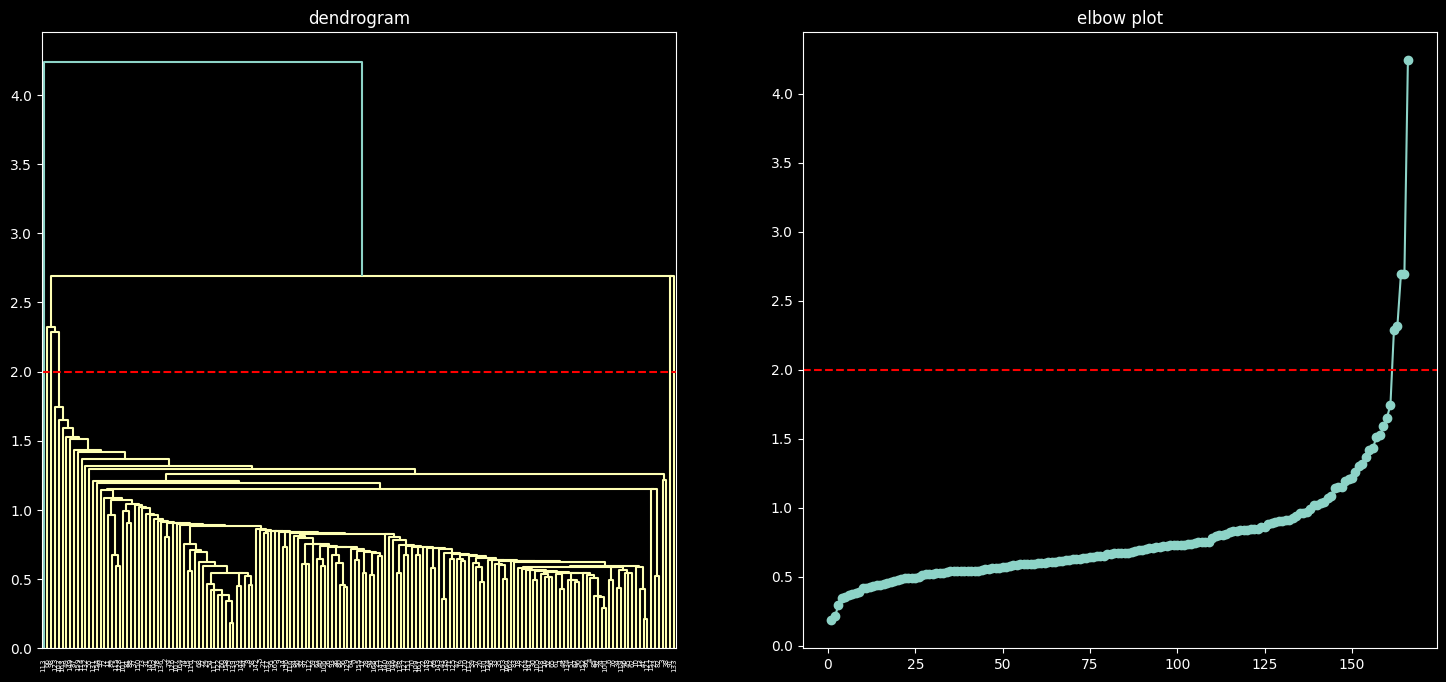

In [ ]:
draw_dn_el(links[3], 2)

### A_E clustering

In [64]:
links=lkg(X, 'average', 'euclidean')

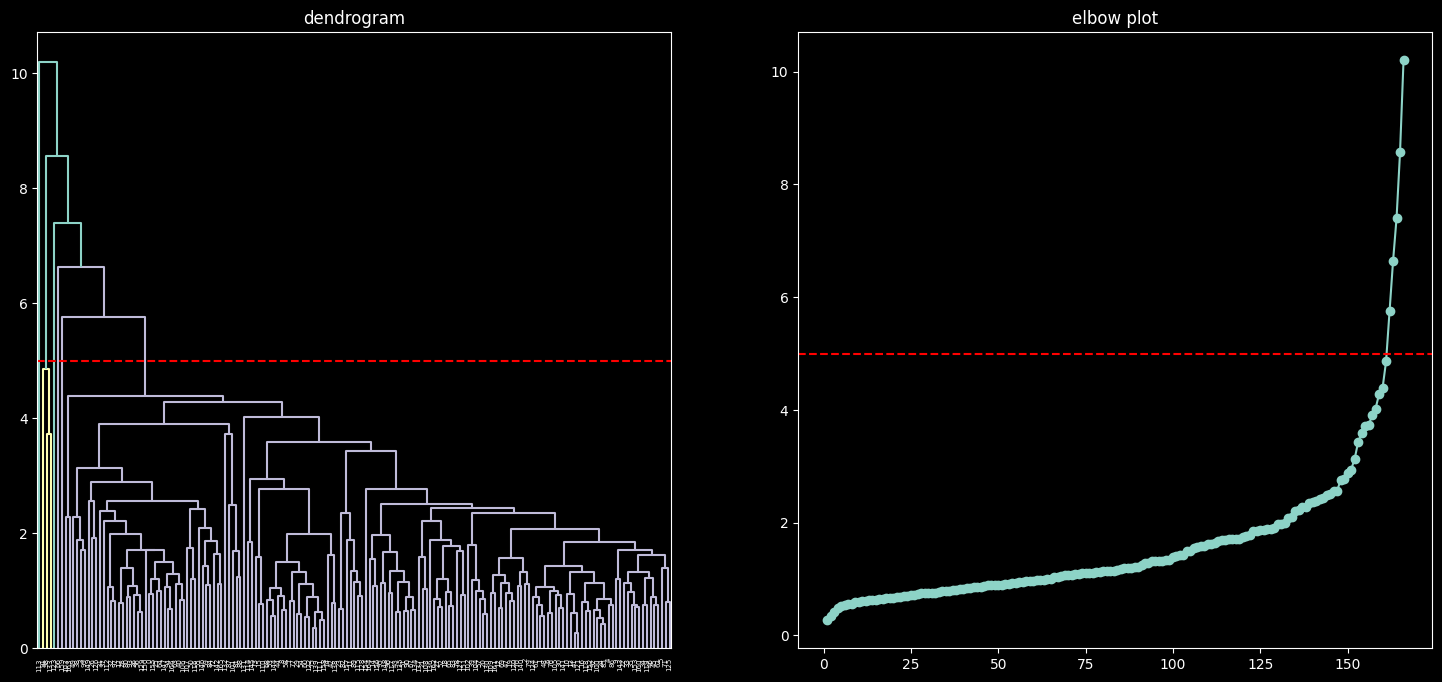

In [65]:
draw_dn_el(links[0], 5)

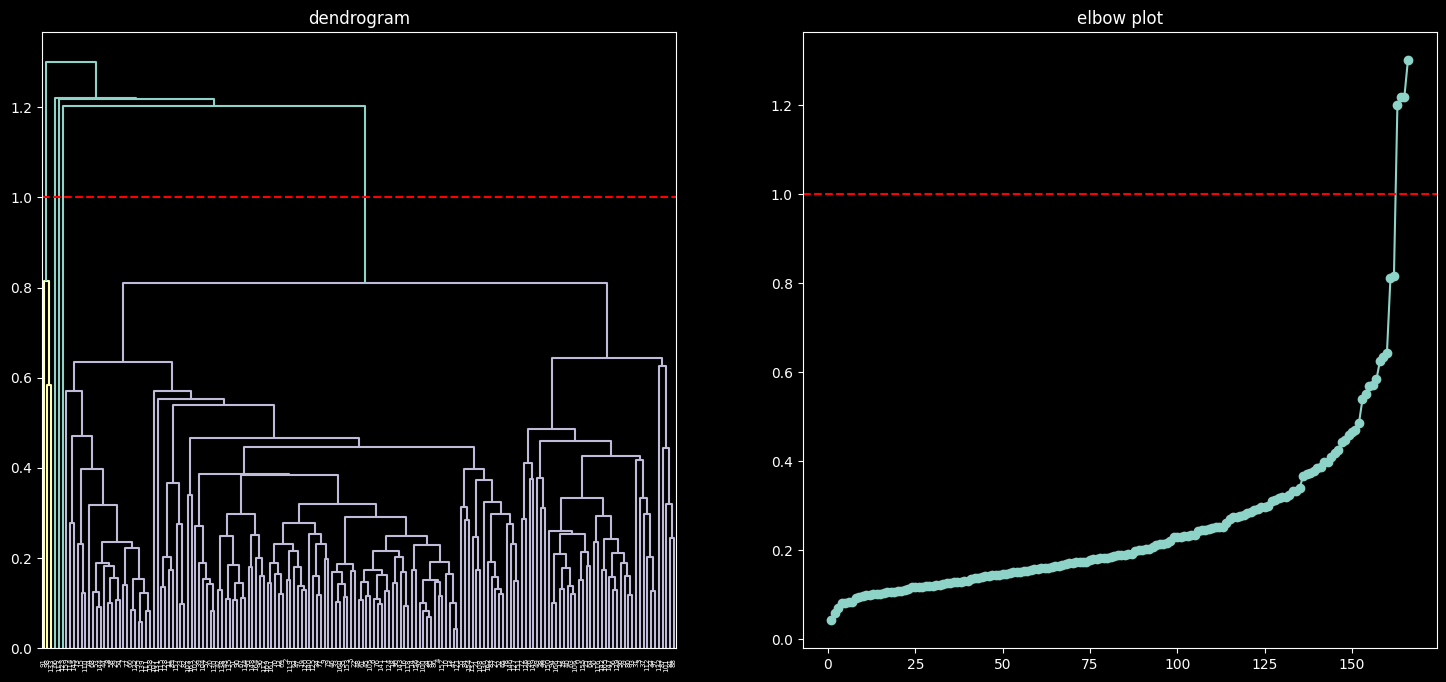

In [ ]:
draw_dn_el(links[1], 1)

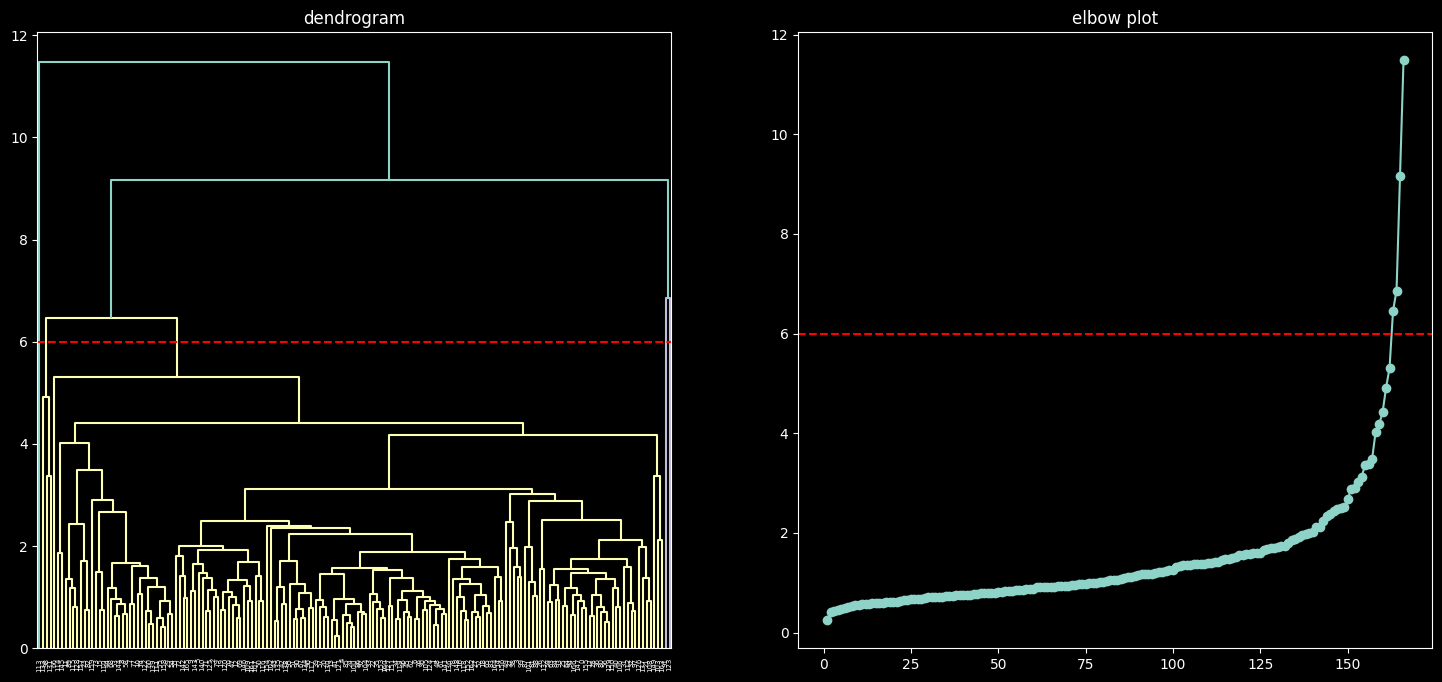

In [ ]:
draw_dn_el(links[2], 6)

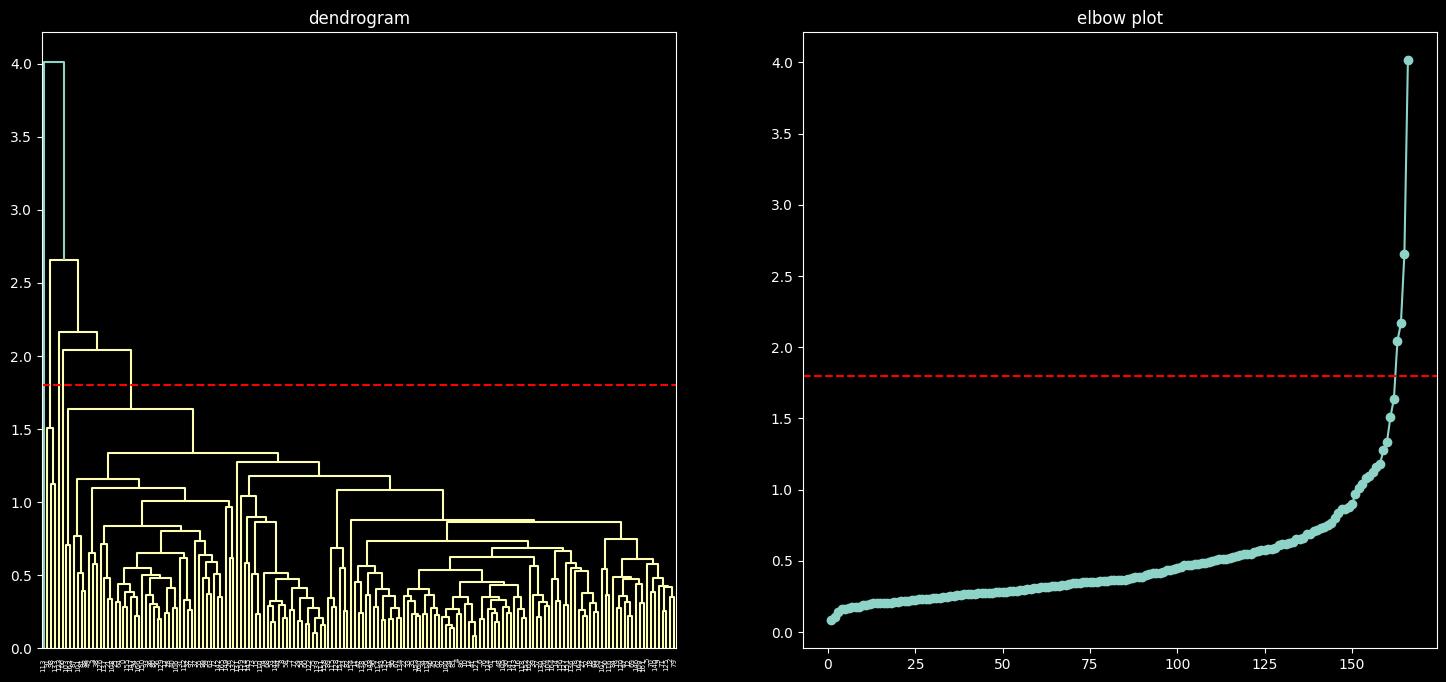

In [ ]:
draw_dn_el(links[3], 1.8)

### A_C clustering

In [66]:
links=lkg(X, 'average', 'cityblock')

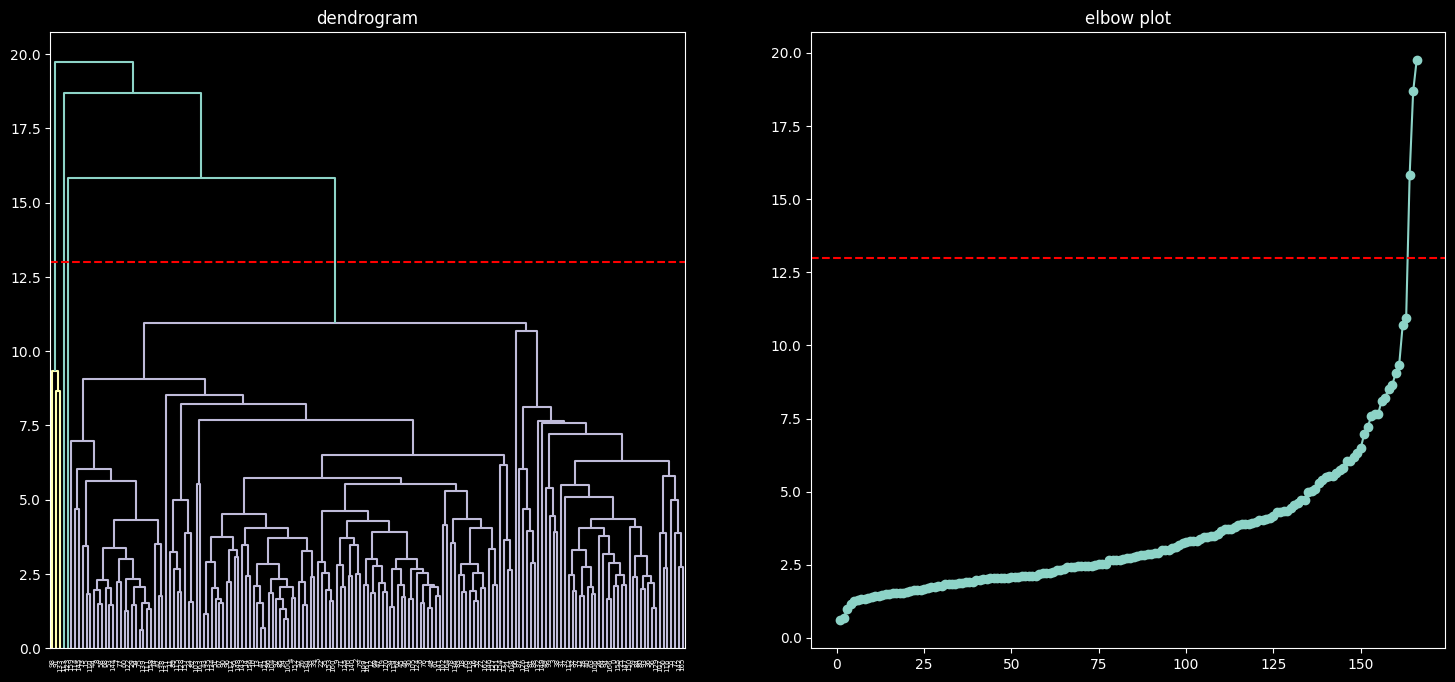

In [67]:
draw_dn_el(links[0], 13)

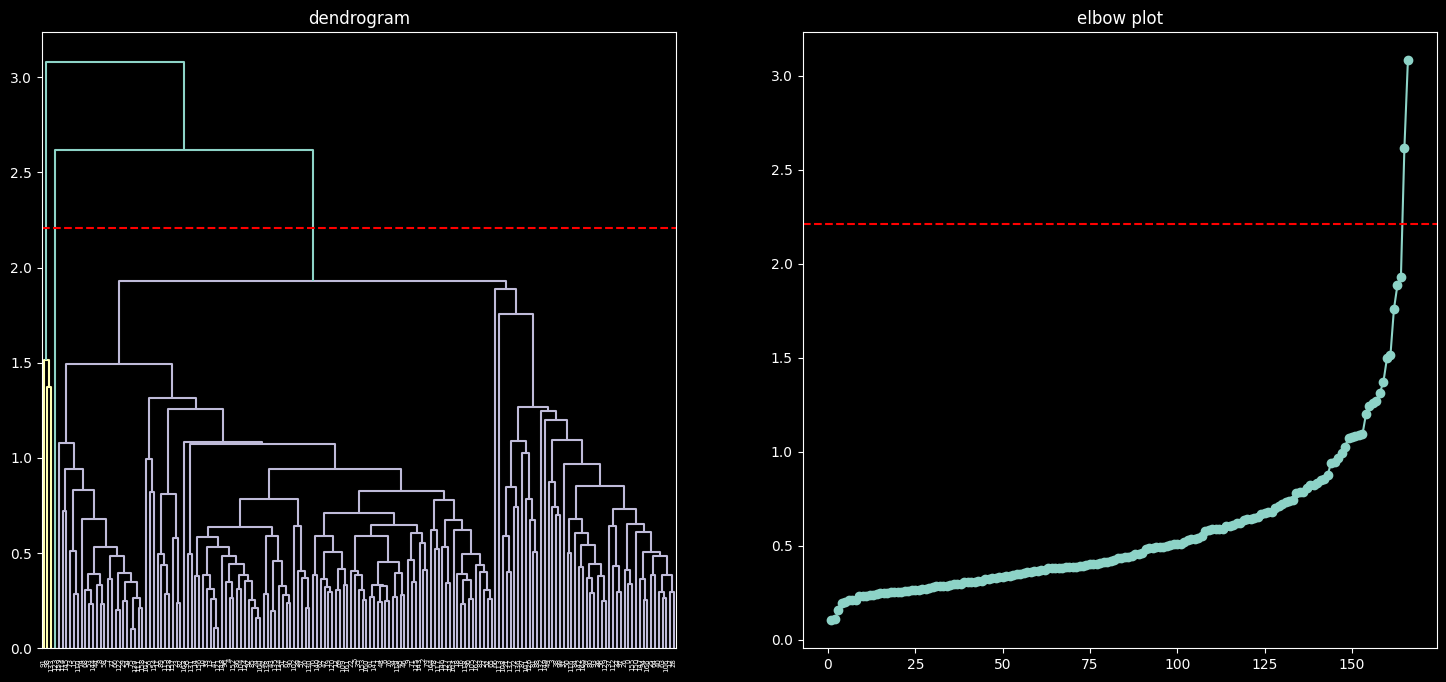

In [ ]:
draw_dn_el(links[1], 2.21)

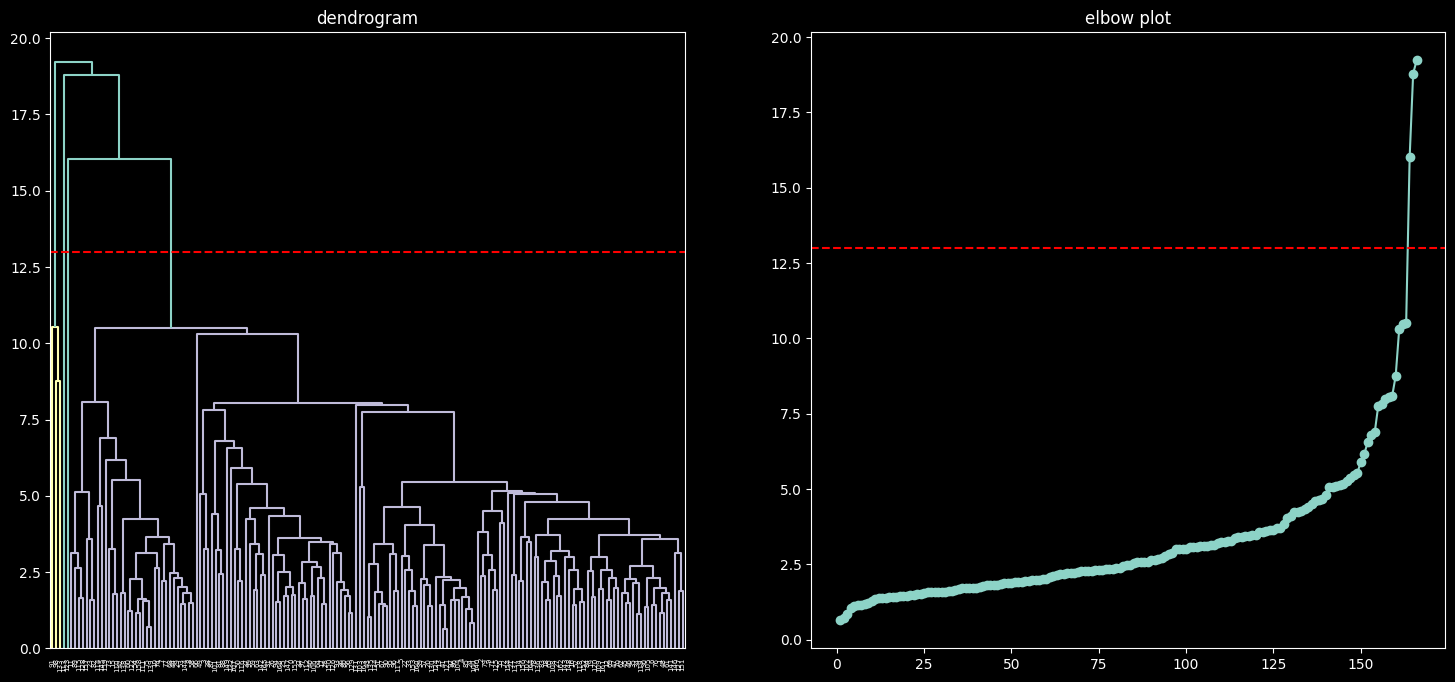

In [ ]:
draw_dn_el(links[2], 13)

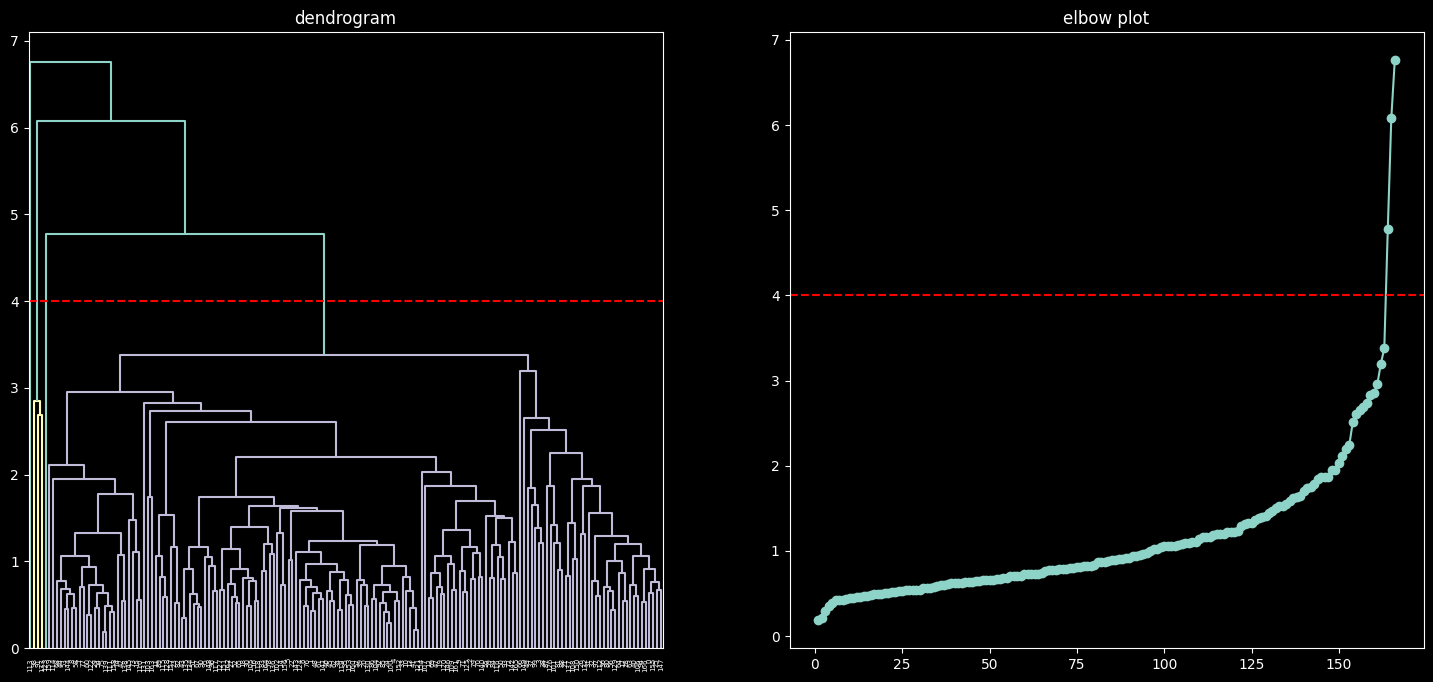

In [ ]:
draw_dn_el(links[3], 4)

### C_E clustering

In [68]:
links=lkg(X, 'complete', 'euclidean')

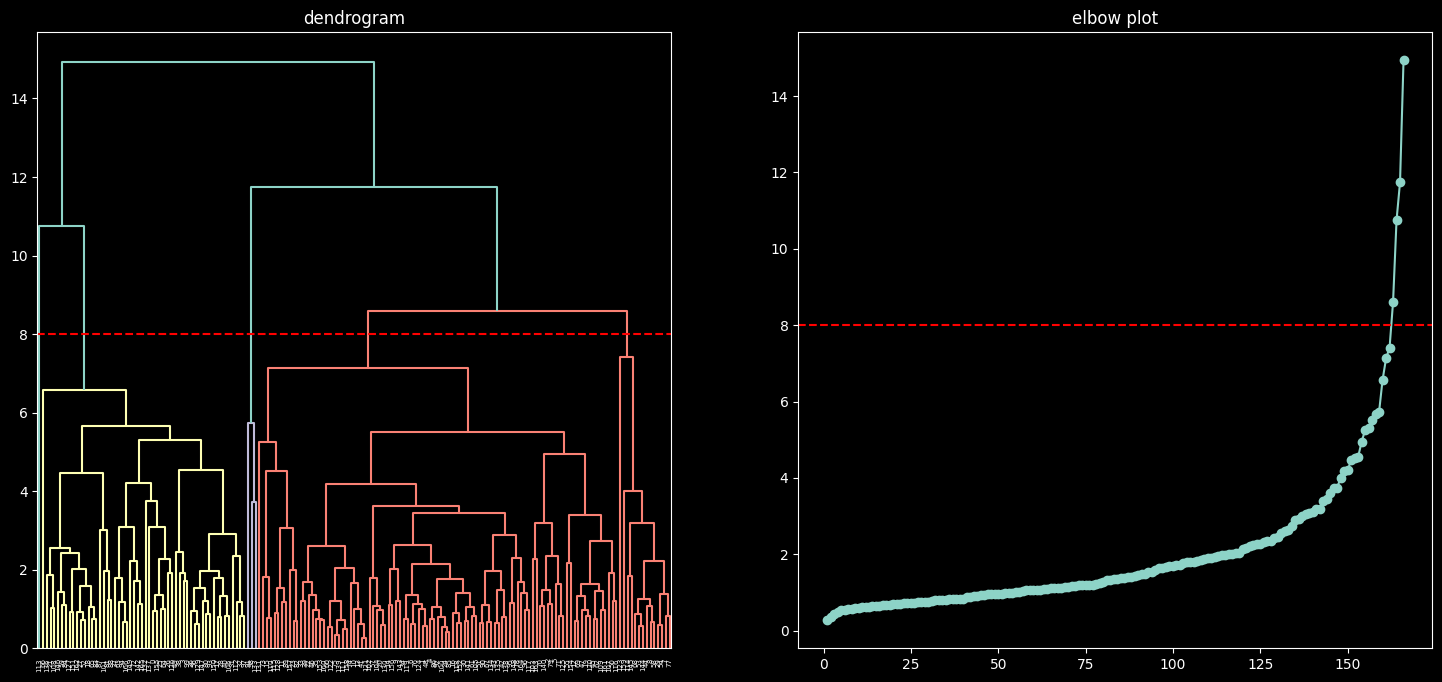

In [69]:
draw_dn_el(links[0], 8)

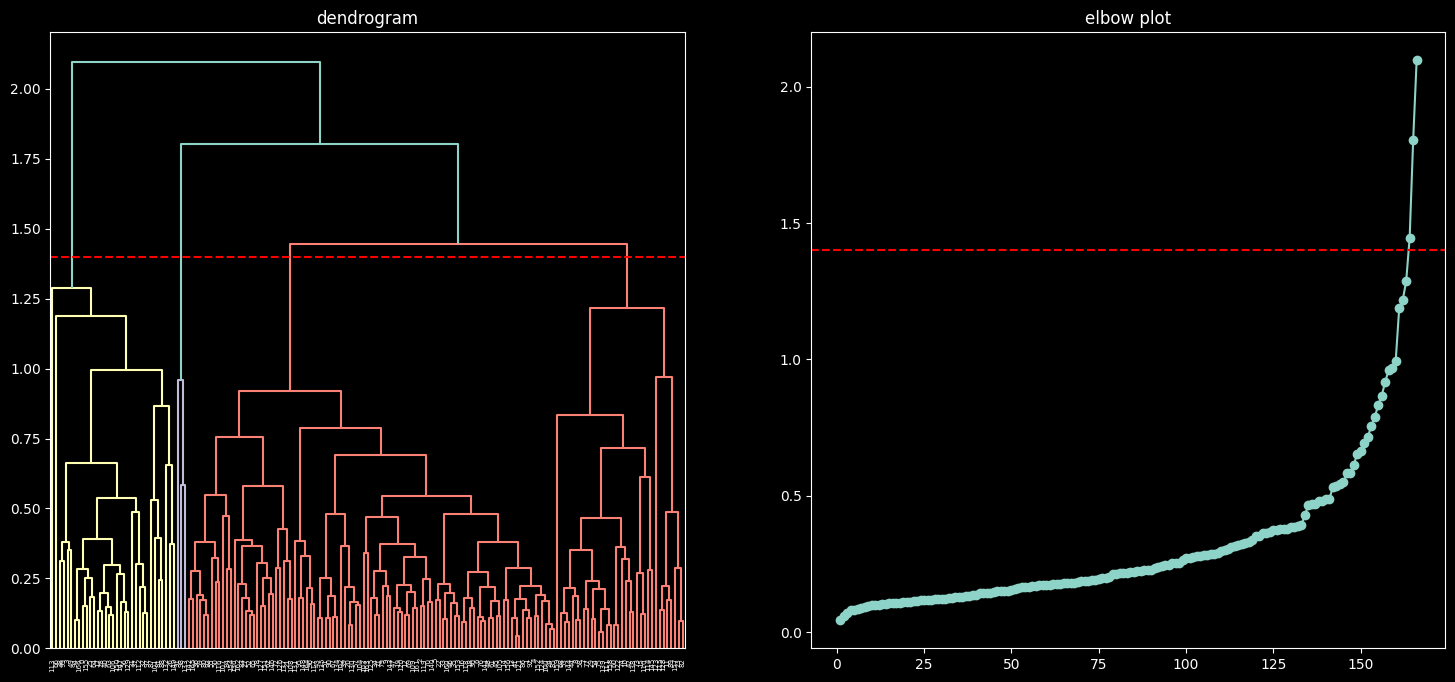

In [ ]:
draw_dn_el(links[1], 1.4)

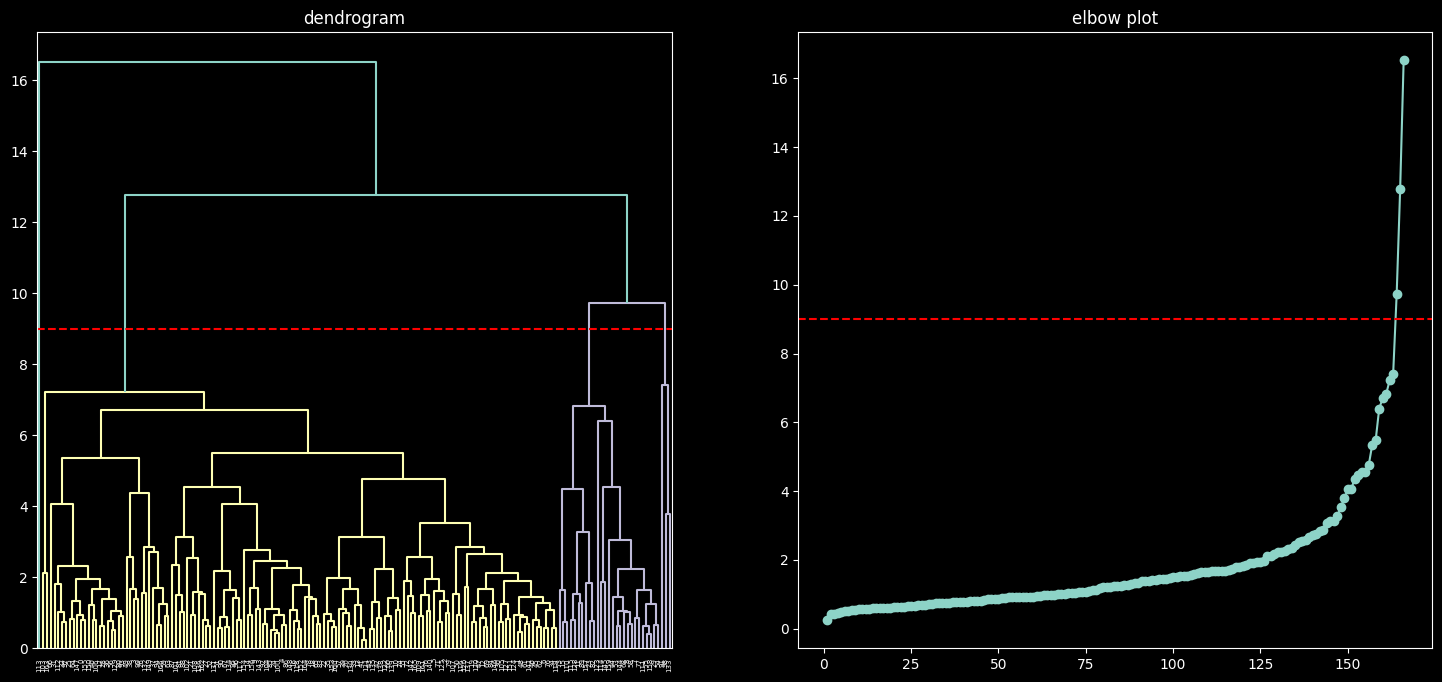

In [ ]:
draw_dn_el(links[2], 9)

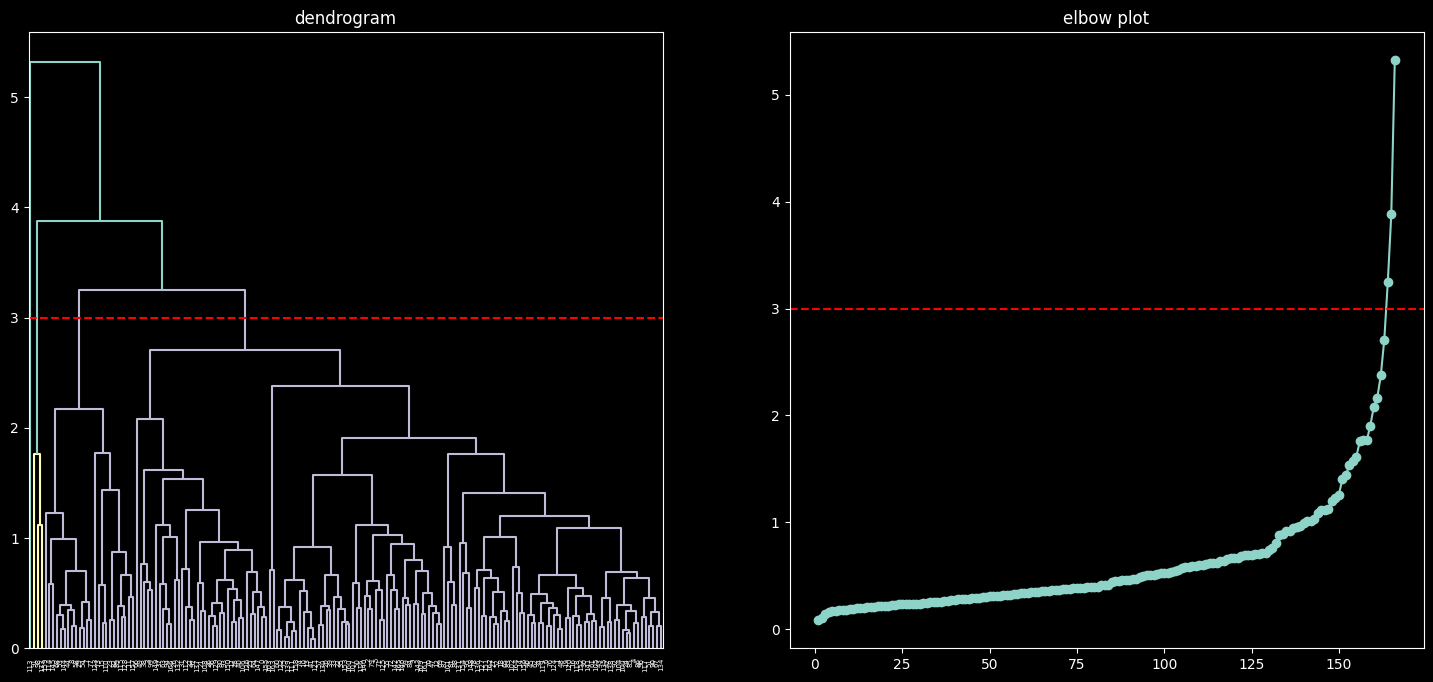

In [ ]:
draw_dn_el(links[3], 3)

In [ ]:
df_for_clust['cluster']=fcluster(links[2], 9, criterion='distance')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    136
2     27
3      3
4      1
dtype: int64

### C_C clustering

In [70]:
links=lkg(X, 'complete', 'cityblock')

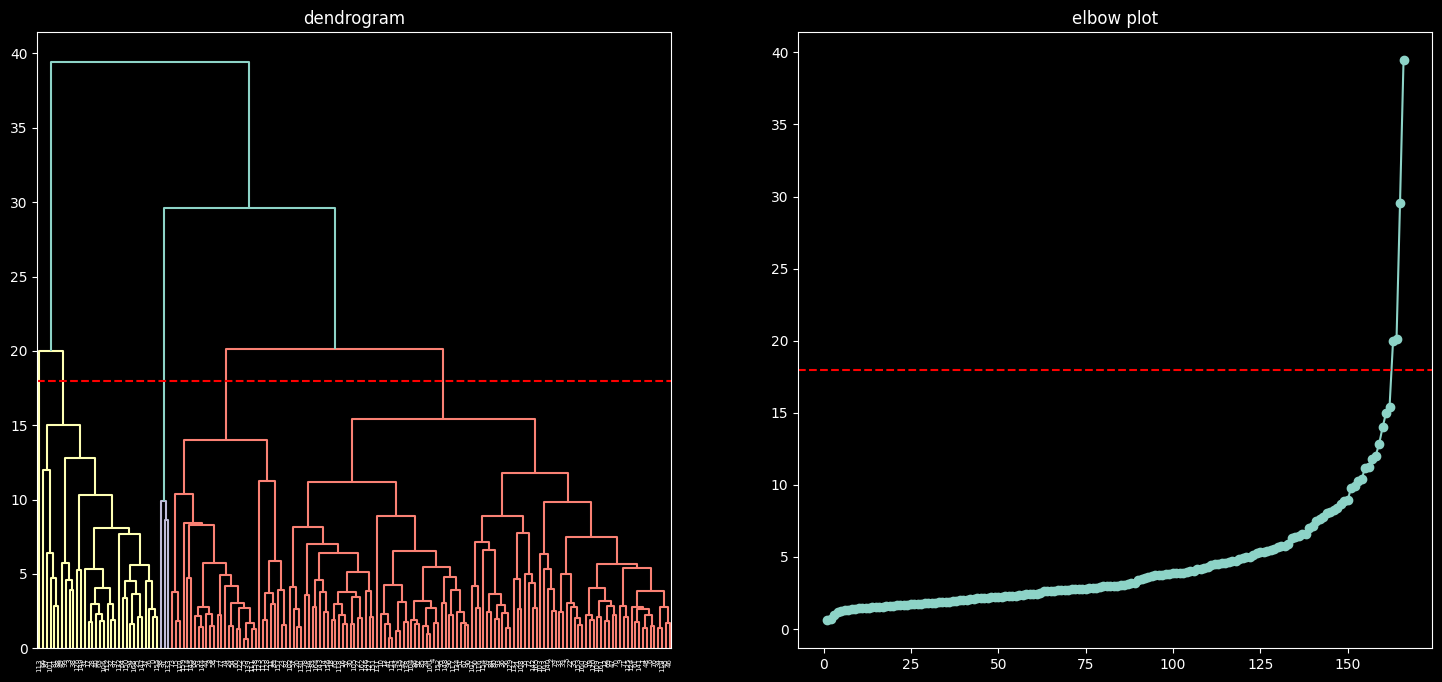

In [71]:
draw_dn_el(links[0], 18)

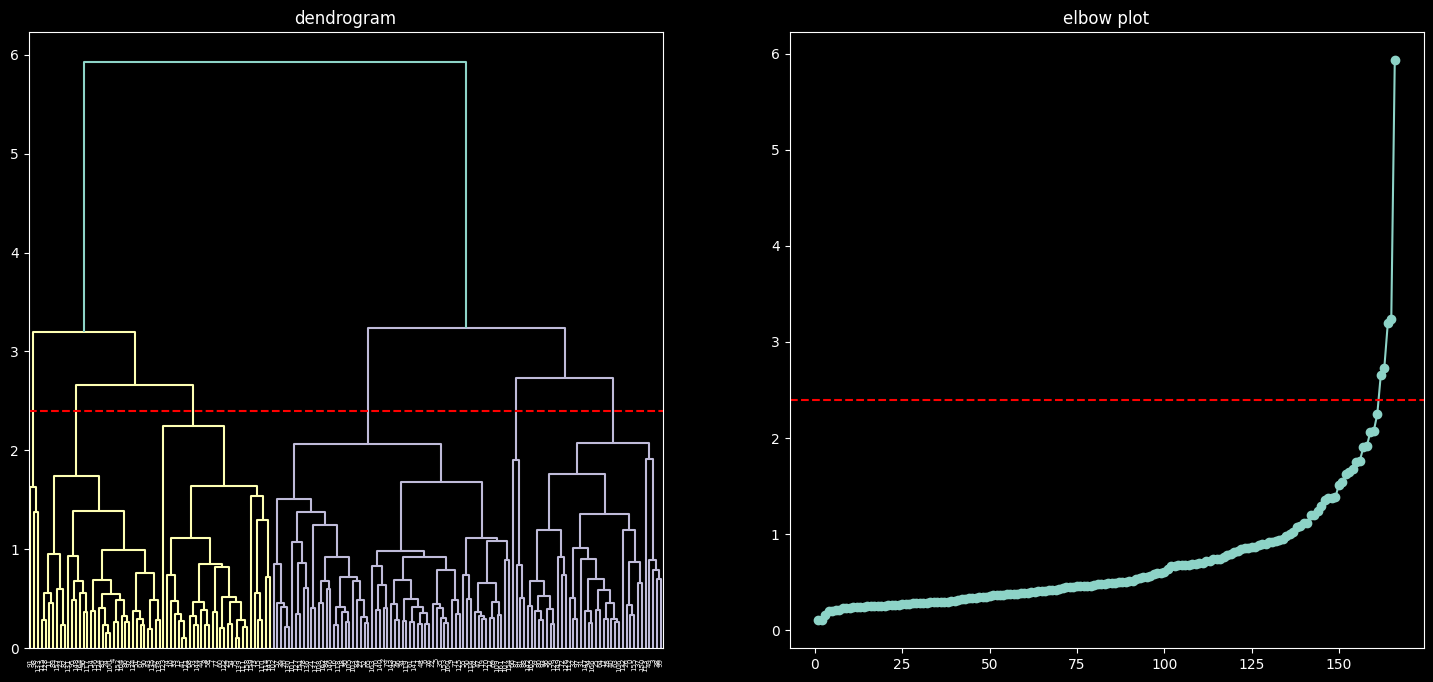

In [ ]:
draw_dn_el(links[1], 2.4)

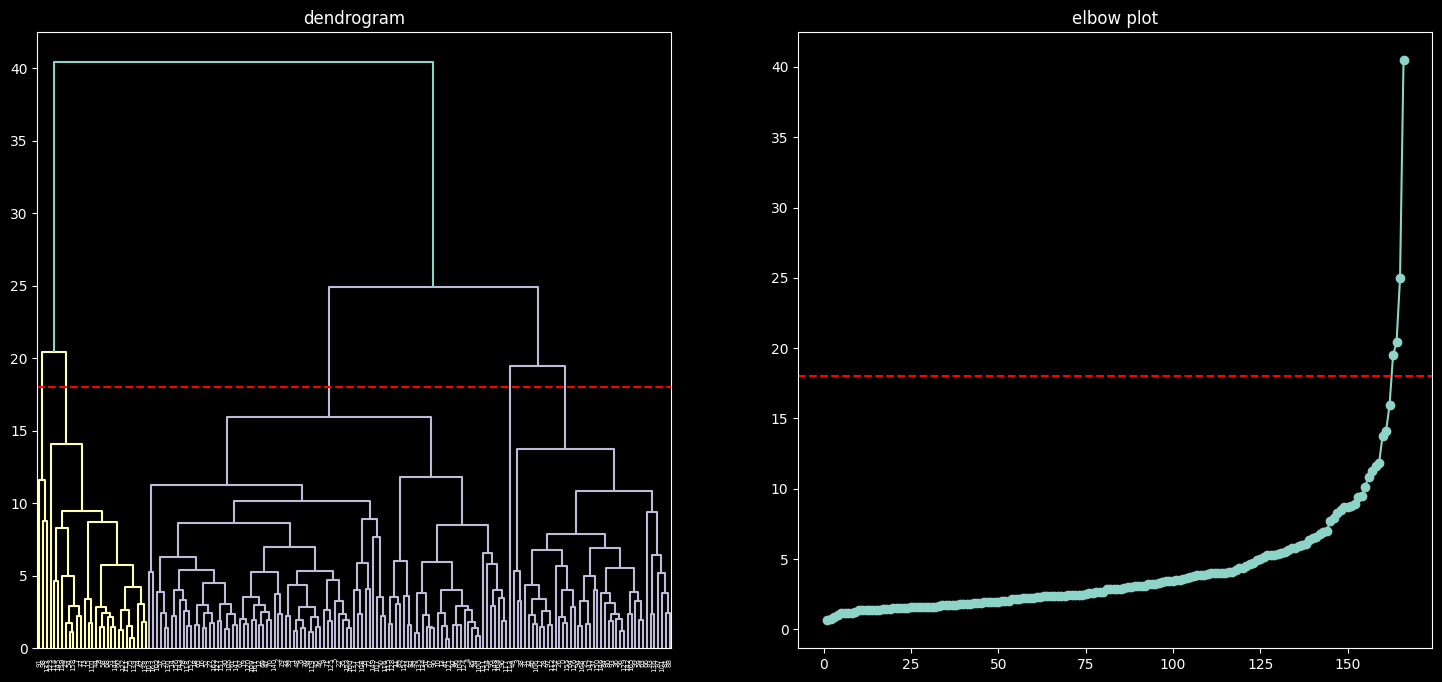

In [ ]:
draw_dn_el(links[2], 18)

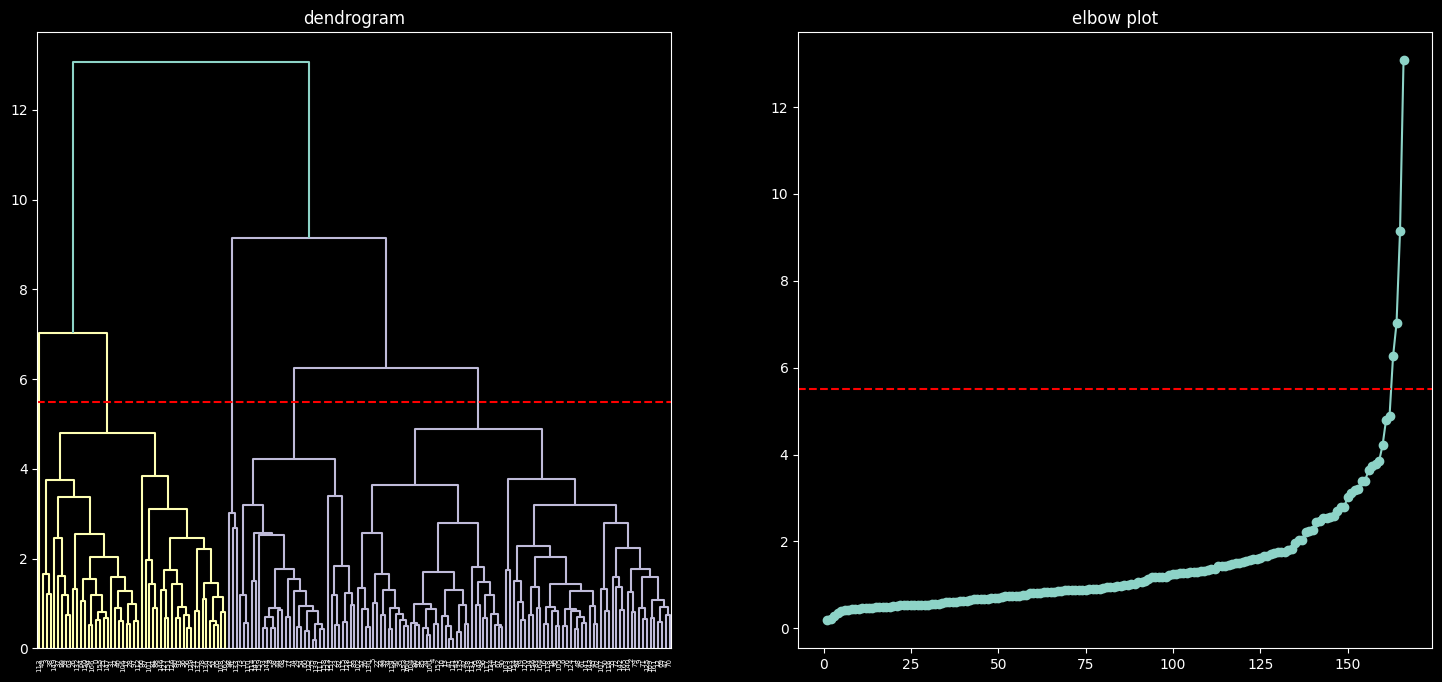

In [ ]:
draw_dn_el(links[3], 5.5)

In [ ]:
df_for_clust['cluster']=fcluster(links[0], 5, criterion='maxclust')

In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1     31
2      1
3      3
4     31
5    101
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

child_mort     exports    health     imports        income  \
cluster                                                               
1        103.961290   29.271613  7.194516   47.083871   2964.935484   
2        130.000000   25.300000  5.070000   17.400000   5150.000000   
3          4.133333  176.000000  6.793333  156.666667  64033.333333   
4          6.138710   47.138710  8.666452   38.474194  45996.774194   
5         28.075248   39.041376  6.149307   46.445207  11367.326733   

          inflation  life_expec  total_fer          gdpp  child_mort_n_1  ...  \
cluster                                                                   ...   
1          9.686935   57.445161   5.334516   1559.322581        2.577834  ...   
2        104.000000   60.500000   5.840000   2330.000000        3.223492  ...   
3          2.468000   81.433333   1.380000  57566.666667        0.102491  ...   
4          4.274935   79.841935   1.937742  41777.419355        0.152216  ...   
5          7.478653   71.505941   2.543465   6401.435644        0.696156  ...   

         gdpp_n_3  child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
cluster                                                                   
1        0.122588        0.782134     0.352152    0.767947     0.563474   
2        0.183176        0.978032     0.304372    0.541175     0.208234   
3        4.525681        0.031096     2.117370    0.725125     1.874900   
4        3.284388        0.046183     0.567103    0.925063     0.460438   
5        0.503258        0.211219     0.469688    0.656381     0.555831   

         income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  gdpp_n_4  
cluster                                                                      
1          0.042516       0.377427        2.001225       1.080299  0.027495  
2          0.073848       4.052093        2.107647       1.182665  0.041083  
3          0.918205       0.096159        2.836904       0.279465  1.015036  
4          0.659570       0.166562        2.781464       0.392414  0.736635  
5          0.163002       0.291387        2.491062       0.515080  0.112872  

[5 rows x 45 columns]

### Conclusion

It seems the best option is w_c clustering

In [ ]:
df_for_clust['cluster']=fcluster(lkg_w_c(X)[1], 30, criterion='distance')

<ipython-input-2-3b3b4c9e741a>:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  l.append(linkage(squareform(pdist(X[j], metric='cityblock')), method='ward'))


In [ ]:
df_for_clust.groupby('cluster').size()

cluster
1    44
2    43
3    51
4     2
5    27
dtype: int64

In [ ]:
df_for_clust.groupby('cluster').mean()

child_mort     exports    health     imports        income  \
cluster                                                               
1         95.354545   27.248159  6.352955   41.987861   3225.295455   
2         10.718605   52.044186  7.115581   56.179070  19385.348837   
3         31.158824   33.813333  5.631765   41.272549   9032.941176   
4          2.800000  187.500000  5.865000  158.000000  81900.000000   
5          5.181481   49.218519  9.398889   42.466667  46785.185185   

         inflation  life_expec  total_fer         gdpp  child_mort_n_1  ...  \
cluster                                                                 ...   
1        12.071250   59.386364   5.101591   1585.00000        2.364420  ...   
2         4.555884   75.769767   1.850930  11653.72093        0.265780  ...   
3         9.584529   70.137255   2.696078   4477.72549        0.772617  ...   
4         1.787000   82.000000   1.390000  75800.00000        0.069429  ...   
5         2.968259   80.396296   1.776667  44970.37037        0.128481  ...   

         gdpp_n_3  child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
cluster                                                                   
1        0.124607        0.717383     0.327809    0.678119     0.502488   
2        0.916173        0.080640     0.626118    0.759522     0.672320   
3        0.352022        0.234418     0.406792    0.601138     0.493927   
4        5.959119        0.021065     2.255721    0.626034     1.890857   
5        3.535406        0.038982     0.592124    1.003244     0.508218   

         income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  gdpp_n_4  
cluster                                                                      
1          0.046249       0.470325        2.068851       1.033129  0.027947  
2          0.277976       0.177508        2.639602       0.374834  0.205483  
3          0.129528       0.373437        2.443381       0.545986  0.078953  
4          1.174404       0.069626        2.856645       0.281490  1.336533  
5          0.670876       0.115651        2.800777       0.359795  0.792934  

[5 rows x 45 columns]

In [ ]:
# The worst cluster is Cluster 1
help_them=df_for_clust[df_for_clust['cluster']==1]

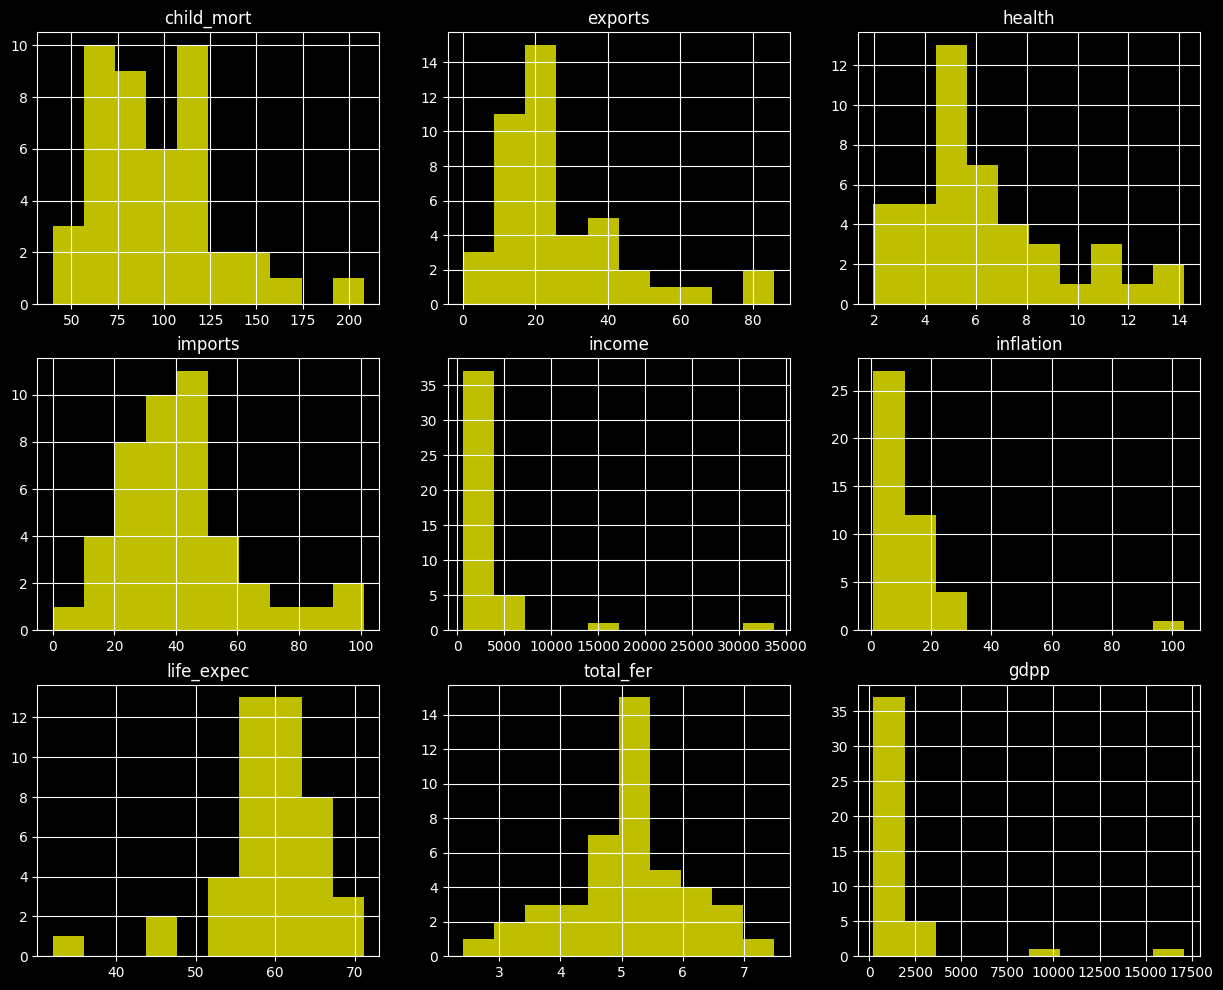

In [ ]:
# Let's build hists of original columns
fig, axs=plt.subplots(3, 3, figsize=(15, 12))
help_them['child_mort'].hist(ax=axs[0,0], color='y')
axs[0,0].set_title('child_mort')
help_them['exports'].hist(ax=axs[0,1], color='y')
axs[0,1].set_title('exports')
help_them['health'].hist(ax=axs[0,2], color='y')
axs[0,2].set_title('health')
help_them['imports'].hist(ax=axs[1,0], color='y')
axs[1,0].set_title('imports')
help_them['income'].hist(ax=axs[1,1], color='y')
axs[1,1].set_title('income')
help_them['inflation'].hist(ax=axs[1,2], color='y')
axs[1,2].set_title('inflation')
help_them['life_expec'].hist(ax=axs[2,0], color='y')
axs[2,0].set_title('life_expec')
help_them['total_fer'].hist(ax=axs[2,1], color='y')
axs[2,1].set_title('total_fer')
help_them['gdpp'].hist(ax=axs[2,2], color='y')
axs[2,2].set_title('gdpp')
plt.show()

In [ ]:
help_them[help_them['income']>10000]

child_mort  exports  health  imports  income  inflation  \
country                                                                      
Equatorial Guinea       111.0     85.8    4.48     58.9   33700       24.9   
Gabon                    63.7     57.7    3.50     18.9   15400       16.6   

                   life_expec  total_fer   gdpp  child_mort_n_1  ...  \
country                                                          ...   
Equatorial Guinea        60.9       5.21  17100        2.752367  ...   
Gabon                    62.9       4.08   8750        1.579511  ...   

                   child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
country                                                                   
Equatorial Guinea        0.835089     1.032218    0.478198     0.704883   
Gabon                    0.479236     0.694160    0.373592     0.226185   

                   income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  \
country                                                                       
Equatorial Guinea    0.483241       0.970165        2.121582       1.055083   
Gabon                0.220828       0.646776        2.191256       0.826245   

                   gdpp_n_4  cluster  
country                               
Equatorial Guinea  0.301513        1  
Gabon              0.154283        1  

[2 rows x 46 columns]

In [ ]:
help_them[help_them['gdpp']>10000]

child_mort  exports  health  imports  income  inflation  \
country                                                                      
Equatorial Guinea       111.0     85.8    4.48     58.9   33700       24.9   

                   life_expec  total_fer   gdpp  child_mort_n_1  ...  \
country                                                          ...   
Equatorial Guinea        60.9       5.21  17100        2.752367  ...   

                   child_mort_n_4  exports_n_4  health_n_4  imports_n_4  \
country                                                                   
Equatorial Guinea        0.835089     1.032218    0.478198     0.704883   

                   income_n_4  inflation_n_4  life_expec_n_4  total_fer_n_4  \
country                                                                       
Equatorial Guinea    0.483241       0.970165        2.121582       1.055083   

                   gdpp_n_4  cluster  
country                               
Equatorial Guinea  0.301513        1  

[1 rows x 46 columns]

Like we can see the states that could look like outliers on hists are not really hists and realy need help

In [ ]:
help_them=help_them[cols]
help_them

child_mort  exports  health   imports  income  \
country                                                                   
Afghanistan                     90.2   10.000    7.58   44.9000    1610   
Angola                         119.0   62.300    2.85   42.9000    5900   
Benin                          111.0   23.800    4.10   37.2000    1820   
Burkina Faso                   116.0   19.200    6.74   29.6000    1430   
Burundi                         93.6    8.920   11.60   39.2000     764   
Cameroon                       108.0   22.200    5.13   27.0000    2660   
Central African Republic       149.0   11.800    3.98   26.5000     888   
Chad                           150.0   36.800    4.53   43.5000    1930   
Comoros                         88.2   16.500    4.51   51.7000    1410   
Congo, Dem. Rep.               116.0   41.100    7.91   49.6000     609   
Congo, Rep.                     63.9   85.100    2.46   54.7000    5190   
Cote d'Ivoire                  111.0   50.600    5.30   43.3000    2690   
Equatorial Guinea              111.0   85.800    4.48   58.9000   33700   
Eritrea                         55.2    4.790    2.66   23.3000    1420   
Gabon                           63.7   57.700    3.50   18.9000   15400   
Gambia                          80.3   23.800    5.69   42.7000    1660   
Ghana                           74.7   29.500    5.22   45.9000    3060   
Guinea                         109.0   30.300    4.93   43.2000    1190   
Guinea-Bissau                  114.0   14.900    8.50   35.2000    1390   
Haiti                          208.0   15.300    6.91   64.7000    1500   
Kenya                           62.2   20.700    4.75   33.6000    2480   
Kiribati                        62.7   13.300   11.30   79.9000    1730   
Lesotho                         99.7   39.400   11.10  101.0000    2380   
Liberia                         89.3   19.100   11.80   92.6000     700   
Madagascar                      62.2   25.000    3.77   43.0000    1390   
Malawi                          90.5   22.800    6.59   34.9000    1030   
Mali                           137.0   22.800    4.98   35.1000    1870   
Mauritania                      97.4   50.700    4.41   61.2000    3320   
Micronesia, Fed. Sts.           40.0   23.500   14.20   81.0000    3340   
Mozambique                     101.0   31.500    5.21   46.2000     918   
Myanmar                         64.4    0.109    1.97    0.0659    3720   
Niger                          123.0   22.200    5.16   49.1000     814   
Nigeria                        130.0   25.300    5.07   17.4000    5150   
Pakistan                        92.1   13.500    2.20   19.4000    4280   
Rwanda                          63.6   12.000   10.50   30.0000    1350   
Senegal                         66.8   24.900    5.66   40.3000    2180   
Sierra Leone                   160.0   16.800   13.10   34.5000    1220   
Sudan                           76.7   19.700    6.32   17.2000    3370   
Tanzania                        71.9   18.700    6.01   29.1000    2090   
Timor-Leste                     62.6    2.200    9.12   27.8000    1850   
Togo                            90.3   40.200    7.65   57.3000    1210   
Uganda                          81.0   17.100    9.01   28.6000    1540   
Yemen                           56.3   30.000    5.18   34.4000    4480   
Zambia                          83.1   37.000    5.89   30.9000    3280   

                          inflation  life_expec  total_fer   gdpp  
country                                                            
Afghanistan                   9.440        56.2       5.82    553  
Angola                       22.400        60.1       6.16   3530  
Benin                         0.885        61.8       5.36    758  
Burkina Faso                  6.810        57.9       5.87    575  
Burundi                      12.300        57.7       6.26    231  
Cameroon                      1.910        57.3       5.11   1310  
Central African Republic      2